In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy

from sklearn.metrics import normalized_mutual_info_score as NMI
from itertools import combinations 
from sklearn.preprocessing import OneHotEncoder

In [2]:
from ZhongShan import *

Import Data

In [3]:
# manip_type = 'RankStandardisedData'
manip_type = 'NormalisedData'

csv_list = os.listdir(f'../data/curated/{manip_type}')
csv_list.sort()

data = pd.DataFrame()
for file in csv_list[1:]:
    if '2022' not in file:
        tmp = pd.read_csv(f'../data/curated/{manip_type}/{file}')
        data = data.append(tmp)

In [4]:
zhongshan = ZhongShan(data)

Pandas DataFrame readin successful
Reset index successful


In [5]:
zhongshan.fill_na('Full')

Filled null values on Full dataset with 0


In [6]:
zhongshan.one_hot_encode_fit_transform('Brownlow Votes', ['1', '2', '3'])

Successfully fitted OHE on 'Brownlow Votes' column
OHE'ed and Dropped 'Brownlow Votes' column on Full Data
Successfully fitted and OHE transformed Full data's 'Brownlow Votes' column


In [7]:
zhongshan.set_columns(['1', '2', '3'], ['Player'], ['HomeAway'])

Successfully set label columns, consisting 3 columns
Successfully set index columns, consisting 1 columns
Successfully set discarded columns, consisting 1 columns
Successfully set feature columns, consisting 71 columns
Successfully set retained columns, consisting 74 columns


In [8]:
zhongshan.view_setted_columns()

label columns: ['1', '2', '3'] 

index columns: ['Player'] 

discarded columns: ['HomeAway'] 

feature columns: ['Kicks BTN', 'Kicks OTN', 'Handballs BTN', 'Handballs OTN', 'Disposals BTN', 'Disposals OTN', 'Marks BTN', 'Marks OTN', 'Goals BTN', 'Goals OTN', 'Behinds BTN', 'Behinds OTN', 'Tackles BTN', 'Tackles OTN', 'Hitouts BTN', 'Hitouts OTN', 'Goal Assists BTN', 'Goal Assists OTN', 'Inside 50s BTN', 'Inside 50s OTN', 'Clearances BTN', 'Clearances OTN', 'Clangers BTN', 'Clangers OTN', 'Rebound 50s BTN', 'Rebound 50s OTN', 'Frees For BTN', 'Frees For OTN', 'Frees Agains BTN', 'Frees Agains OTN', 'Contested Possessions BTN', 'Contested Possessions OTN', 'Uncontested Possessions BTN', 'Uncontested Possessions OTN', 'Effective Disposals BTN', 'Effective Disposals OTN', 'Contested Marks BTN', 'Contested Marks OTN', 'Marks Inside 50 BTN', 'Marks Inside 50 OTN', 'One Percenters BTN', 'One Percenters OTN', 'Bounces BTN', 'Bounces OTN', 'Centre Clearances BTN', 'Centre Clearances OTN', 'Stop

In [9]:
zhongshan.basic_overview('Full', 10)

Player  Kicks BTN  Kicks OTN  Handballs BTN  Handballs OTN  \
0      Richard Douglas   2.774997   2.399581       0.736498       0.904255   
1          Rory Sloane   1.014999   0.661613       1.501991       1.721801   
2  Patrick Dangerfield   1.234999   0.878859       0.991662       1.176771   
3           Rory Laird   1.014999   0.661613       0.991662       1.176771   
4        Taylor Walker   2.554997   2.182335      -1.304818      -1.275867   
5         Brodie Smith   1.014999   0.661613       0.481333       0.631740   
6          Eddie Betts   1.234999   0.878859      -0.028996       0.086709   
7     Nathan Van Berlo   0.135000  -0.207371       0.226169       0.359225   
8         Daniel Talia  -0.524999  -0.859109       0.991662       1.176771   
9        Kyle Hartigan  -0.744999  -1.076355       0.991662       1.176771   

   Disposals BTN  Disposals OTN  Marks BTN  Marks OTN  Goals BTN  ...  \
0       2.565987       2.314064   0.292683  -0.062935  -0.514397  ...   
1       1.738249       1.508535   0.671449   0.283206   0.994501  ...   
2       1.572702       1.347430  -0.843615  -1.101356   0.994501  ...   
3       1.407154       1.186324   1.050215   0.629346   0.240052  ...   
4       1.076059       0.864113   4.080344   3.398471   4.012299  ...   
5       1.076059       0.864113   0.292683  -0.062935   0.240052  ...   
6       0.910512       0.703007   1.428981   0.975487   2.503400  ...   
7       0.248321       0.058584  -0.086083  -0.409075  -0.514397  ...   
8       0.248321       0.058584  -0.086083  -0.409075  -0.514397  ...   
9       0.082774      -0.102522   0.292683  -0.062935  -0.514397  ...   

   Marks Outside 50 OTN  Tackles Outside 50 BTN  Tackles Outside 50 OTN  \
0              0.478989                0.563392                0.501782   
1              0.478989                1.834634                1.973676   
2             -1.862736                1.199013                1.237729   
3              1.064421               -0.072230               -0.234165   
4              1.064421               -1.343472               -1.706059   
5              0.478989                0.563392                0.501782   
6              0.478989                1.199013                1.237729   
7             -0.106442                1.199013                1.237729   
8             -0.106442               -0.072230               -0.234165   
9              0.478989               -1.343472               -1.706059   

   Behind Assists BTN  Behind Assists OTN  Ineffective Disposals BTN  \
0            1.374813            0.881308                   3.238327   
1            2.405922            1.834854                   0.321939   
2            1.374813            0.881308                   2.405074   
3            0.343703           -0.072238                  -0.094688   
4            2.749625            2.152702                   1.155193   
5            0.687406            0.245610                  -0.094688   
6            2.062219            1.517005                   0.738566   
7           -0.343703           -0.707936                  -0.094688   
8           -0.343703           -0.707936                  -0.927942   
9            0.000000           -0.390087                  -0.511315   

   Ineffective Disposals OTN    1    2    3  
0                   2.813897  1.0  0.0  0.0  
1                   0.264837  1.0  0.0  0.0  
2                   2.085594  0.0  0.0  1.0  
3                  -0.099314  1.0  0.0  0.0  
4                   0.993140  0.0  0.0  0.0  
5                  -0.099314  1.0  0.0  0.0  
6                   0.628989  0.0  1.0  0.0  
7                  -0.099314  1.0  0.0  0.0  
8                  -0.827617  1.0  0.0  0.0  
9                  -0.463465  1.0  0.0  0.0  

[10 rows x 76 columns]

Player  Kicks BTN  Kicks OTN  Handballs BTN  Handballs OTN  \
59149        Jake Kelly  -0.400447  -0.275767      -0.464197      -0.562717   
59150     Darcy Fogarty  -0.596221  -0.518441      -0.464197      -0.562717   
59151       Will Hamill  -0.791996  -0.761116      -0.257887      -0.359770   
59152      Jordon Butts  -0.400447  -0.275767      -0.876817      -0.968611   
59153  Riley Thilthorpe  -0.791996  -0.761116      -0.464197      -0.562717   
59154    Reilly O'Brien  -0.987770  -1.003791      -0.464197      -0.562717   
59155      Shane McAdam  -0.596221  -0.518441      -0.876817      -0.968611   
59156         Sam Berry  -1.183544  -1.246466      -0.257887      -0.359770   
59157    Ronin O'Connor  -1.770866  -1.974490      -0.051577      -0.156823   
59158    Billy Frampton  -1.183544  -1.246466      -1.289436      -1.374505   

       Disposals BTN  Disposals OTN  Marks BTN  Marks OTN  Goals BTN  ...  \
59149      -0.558763      -0.499958  -0.265069   0.151156  -0.545405  ...   
59150      -0.688845      -0.627854  -0.265069   0.151156   0.343403  ...   
59151      -0.688845      -0.627854  -1.325344  -1.511561  -0.545405  ...   
59152      -0.818927      -0.755751   0.088356   0.705395  -0.545405  ...   
59153      -0.818927      -0.755751  -0.265069   0.151156   1.232211  ...   
59154      -0.949010      -0.883647  -0.971919  -0.957322  -0.545405  ...   
59155      -0.949010      -0.883647   0.088356   0.705395   2.121018  ...   
59156      -0.949010      -0.883647  -0.618494  -0.403083   1.232211  ...   
59157      -1.209174      -1.139440  -1.678769  -2.065800  -0.545405  ...   
59158      -1.599421      -1.523128  -0.618494  -0.403083  -0.545405  ...   

       Marks Outside 50 OTN  Tackles Outside 50 BTN  Tackles Outside 50 OTN  \
59149              0.471049                0.586168                0.692991   
59150             -0.074376               -1.060091               -1.000988   
59151             -1.165227                0.037415                0.128332   
59152              1.016474               -0.511338               -0.436328   
59153             -0.619801               -1.060091               -1.000988   
59154             -0.619801                1.683674                1.822311   
59155             -0.619801               -1.060091               -1.000988   
59156             -0.619801                0.037415                0.128332   
59157             -1.710652                2.232428                2.386971   
59158             -0.619801               -1.060091               -1.000988   

       Behind Assists BTN  Behind Assists OTN  Ineffective Disposals BTN  \
59149           -1.286544           -1.156687                  -1.095024   
59150            0.942115            1.439957                  -0.401772   
59151           -0.840812           -0.637358                  -0.401772   
59152           -1.286544           -1.156687                  -1.441651   
59153            0.496383            0.920628                   0.291481   
59154           -1.732276           -1.676015                  -0.055145   
59155            0.942115            1.439957                  -0.401772   
59156            0.050651            0.401299                  -1.095024   
59157           -1.286544           -1.156687                  -0.748398   
59158           -1.286544           -1.156687                  -0.748398   

       Ineffective Disposals OTN    1    2    3  
59149                  -0.968451  1.0  0.0  0.0  
59150                  -0.422145  1.0  0.0  0.0  
59151                  -0.422145  1.0  0.0  0.0  
59152                  -1.241603  1.0  0.0  0.0  
59153                   0.124160  1.0  0.0  0.0  
59154                  -0.148992  1.0  0.0  0.0  
59155                  -0.422145  1.0  0.0  0.0  
59156                  -0.968451  1.0  0.0  0.0  
59157                  -0.695298  1.0  0.0  0.0  
59158                  -0.695298  1.0  0.0  0.0  

[10 rows x 76 columns]

Number of Rows (Instances*): 59159
Number of Columns (Features*): 76


In [10]:
zhongshan.get_full_data_analysis()

Got Full Data Analysis


In [11]:
zhongshan.view_column_types()

numeric columns: ['Kicks BTN', 'Kicks OTN', 'Handballs BTN', 'Handballs OTN', 'Disposals BTN', 'Disposals OTN', 'Marks BTN', 'Marks OTN', 'Goals BTN', 'Goals OTN', 'Behinds BTN', 'Behinds OTN', 'Tackles BTN', 'Tackles OTN', 'Hitouts BTN', 'Hitouts OTN', 'Goal Assists BTN', 'Goal Assists OTN', 'Inside 50s BTN', 'Inside 50s OTN', 'Clearances BTN', 'Clearances OTN', 'Clangers BTN', 'Clangers OTN', 'Rebound 50s BTN', 'Rebound 50s OTN', 'Frees For BTN', 'Frees For OTN', 'Frees Agains BTN', 'Frees Agains OTN', 'Contested Possessions BTN', 'Contested Possessions OTN', 'Uncontested Possessions BTN', 'Uncontested Possessions OTN', 'Effective Disposals BTN', 'Effective Disposals OTN', 'Contested Marks BTN', 'Contested Marks OTN', 'Marks Inside 50 BTN', 'Marks Inside 50 OTN', 'One Percenters BTN', 'One Percenters OTN', 'Bounces BTN', 'Bounces OTN', 'Centre Clearances BTN', 'Centre Clearances OTN', 'Stoppage Clearances BTN', 'Stoppage Clearances OTN', 'Score Involvements BTN', 'Score Involvements 

In [12]:
zhongshan.view_full_data_analysis()

Number of Missing          mean       std  \
Kicks BTN                                  0 -2.368366e-18  0.988618   
Kicks OTN                                  0  1.092226e-18  0.977095   
Handballs BTN                              0 -1.298660e-18  0.988618   
Handballs OTN                              0  6.981236e-19  0.977095   
Disposals BTN                              0  5.956571e-18  0.988618   
...                                      ...           ...       ...   
Ineffective Disposals BTN                  0  1.388741e-19  0.988618   
Ineffective Disposals OTN                  0 -2.822521e-18  0.977095   
1                                          0  9.320475e-01  0.251666   
2                                          0  2.265082e-02  0.148789   
3                                          0  2.265082e-02  0.148789   

                                min        q1        q2        q3       max  \
Kicks BTN                 -2.649346 -0.725501 -0.106318  0.628929  4.598948   
Kicks OTN                 -3.091252 -0.723287 -0.104746  0.637108  3.734150   
Handballs BTN             -2.493099 -0.727587 -0.185248  0.555684  4.811443   
Handballs OTN             -2.722408 -0.725778 -0.178645  0.570647  4.019696   
Disposals BTN             -2.779711 -0.726796 -0.130845  0.628501  4.476618   
...                             ...       ...       ...       ...       ...   
Ineffective Disposals BTN -2.421067 -0.740436 -0.151446  0.583772  4.603859   
Ineffective Disposals OTN -2.508488 -0.732926 -0.151402  0.602391  3.903063   
1                          0.000000  1.000000  1.000000  1.000000  1.000000   
2                          0.000000  0.000000  0.000000  0.000000  1.000000   
3                          0.000000  0.000000  0.000000  0.000000  1.000000   

                                IQR  1.5 upper bound  1.5 lower bound  \
Kicks BTN                  1.354430         2.660574        -2.757147   
Kicks OTN                  1.360395         2.677701        -2.763880   
Handballs BTN              1.283271         2.480592        -2.652494   
Handballs OTN              1.296425         2.515283        -2.670415   
Disposals BTN              1.355296         2.661445        -2.759740   
...                             ...              ...              ...   
Ineffective Disposals BTN  1.324208         2.570083        -2.726748   
Ineffective Disposals OTN  1.335318         2.605368        -2.735903   
1                          0.000000         1.000000         1.000000   
2                          0.000000         0.000000         0.000000   
3                          0.000000         0.000000         0.000000   

                           3 upper bound  3 lower bound  \
Kicks BTN                       4.692220      -4.788792   
Kicks OTN                       4.718294      -4.804473   
Handballs BTN                   4.405499      -4.577401   
Handballs OTN                   4.459920      -4.615052   
Disposals BTN                   4.694390      -4.792685   
...                                  ...            ...   
Ineffective Disposals BTN       4.556395      -4.713060   
Ineffective Disposals OTN       4.608344      -4.738879   
1                               1.000000       1.000000   
2                               0.000000       0.000000   
3                               0.000000       0.000000   

                           number of 1.5 outliers  number of 3 outliers  
Kicks BTN                                     517                     0  
Kicks OTN                                     351                     0  
Handballs BTN                                1255                    12  
Handballs OTN                                1000                     0  
Disposals BTN                                 425                     0  
...                                           ...                   ...  
Ineffective Disposals BTN                     869                     1  
Ineffective Disposals OTN          

Full Data IDE on column 'Kicks BTN'


Kicks BTN
Number of Missing       0.000000e+00
mean                   -2.368366e-18
std                     9.886181e-01
min                    -2.649346e+00
q1                     -7.255014e-01
q2                     -1.063184e-01
q3                      6.289288e-01
max                     4.598948e+00
IQR                     1.354430e+00
1.5 upper bound         2.660574e+00
1.5 lower bound        -2.757147e+00
3 upper bound           4.692220e+00
3 lower bound          -4.788792e+00
number of 1.5 outliers  5.170000e+02
number of 3 outliers    0.000000e+00

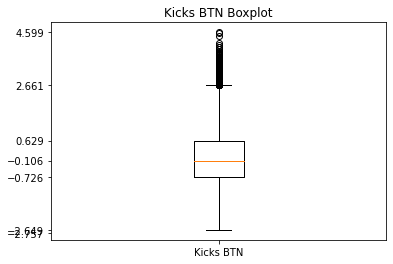

Full Data IDE on column 'Kicks OTN'


Kicks OTN
Number of Missing       0.000000e+00
mean                    1.092226e-18
std                     9.770949e-01
min                    -3.091252e+00
q1                     -7.232871e-01
q2                     -1.047463e-01
q3                      6.371083e-01
max                     3.734150e+00
IQR                     1.360395e+00
1.5 upper bound         2.677701e+00
1.5 lower bound        -2.763880e+00
3 upper bound           4.718294e+00
3 lower bound          -4.804473e+00
number of 1.5 outliers  3.510000e+02
number of 3 outliers    0.000000e+00

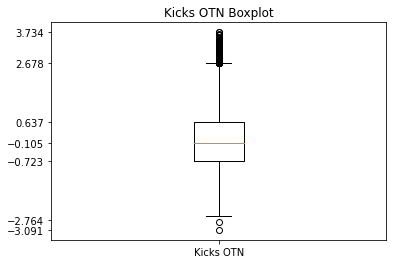

Full Data IDE on column 'Handballs BTN'


Handballs BTN
Number of Missing        0.000000e+00
mean                    -1.298660e-18
std                      9.886181e-01
min                     -2.493099e+00
q1                      -7.275870e-01
q2                      -1.852479e-01
q3                       5.556844e-01
max                      4.811443e+00
IQR                      1.283271e+00
1.5 upper bound          2.480592e+00
1.5 lower bound         -2.652494e+00
3 upper bound            4.405499e+00
3 lower bound           -4.577401e+00
number of 1.5 outliers   1.255000e+03
number of 3 outliers     1.200000e+01

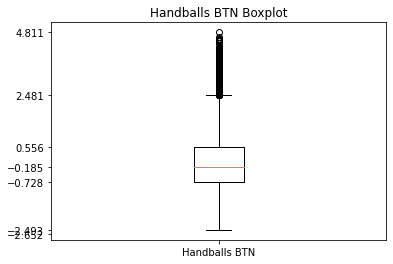

Full Data IDE on column 'Handballs OTN'


Handballs OTN
Number of Missing        0.000000e+00
mean                     6.981236e-19
std                      9.770949e-01
min                     -2.722408e+00
q1                      -7.257780e-01
q2                      -1.786447e-01
q3                       5.706465e-01
max                      4.019696e+00
IQR                      1.296425e+00
1.5 upper bound          2.515283e+00
1.5 lower bound         -2.670415e+00
3 upper bound            4.459920e+00
3 lower bound           -4.615052e+00
number of 1.5 outliers   1.000000e+03
number of 3 outliers     0.000000e+00

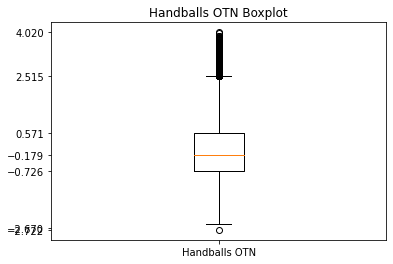

Full Data IDE on column 'Disposals BTN'


Disposals BTN
Number of Missing        0.000000e+00
mean                     5.956571e-18
std                      9.886181e-01
min                     -2.779711e+00
q1                      -7.267957e-01
q2                      -1.308452e-01
q3                       6.285007e-01
max                      4.476618e+00
IQR                      1.355296e+00
1.5 upper bound          2.661445e+00
1.5 lower bound         -2.759740e+00
3 upper bound            4.694390e+00
3 lower bound           -4.792685e+00
number of 1.5 outliers   4.250000e+02
number of 3 outliers     0.000000e+00

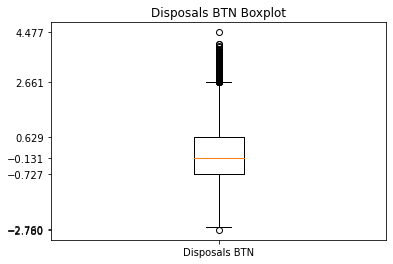

Full Data IDE on column 'Disposals OTN'


Disposals OTN
Number of Missing        0.000000e+00
mean                     3.149063e-18
std                      9.770949e-01
min                     -2.745635e+00
q1                      -7.251013e-01
q2                      -1.293873e-01
q3                       6.390796e-01
max                      3.787728e+00
IQR                      1.364181e+00
1.5 upper bound          2.685351e+00
1.5 lower bound         -2.771373e+00
3 upper bound            4.731622e+00
3 lower bound           -4.817644e+00
number of 1.5 outliers   2.790000e+02
number of 3 outliers     0.000000e+00

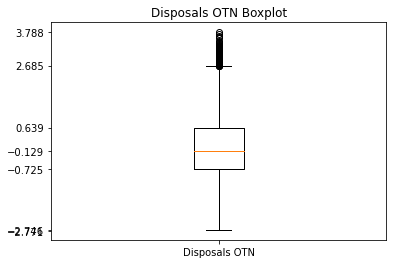

Full Data IDE on column 'Marks BTN'


Marks BTN
Number of Missing       0.000000e+00
mean                    6.801075e-18
std                     9.886181e-01
min                    -2.330562e+00
q1                     -7.393309e-01
q2                     -1.234837e-01
q3                      6.144109e-01
max                     4.879845e+00
IQR                     1.353742e+00
1.5 upper bound         2.645024e+00
1.5 lower bound        -2.769944e+00
3 upper bound           4.675636e+00
3 lower bound          -4.800556e+00
number of 1.5 outliers  6.610000e+02
number of 3 outliers    1.000000e+00

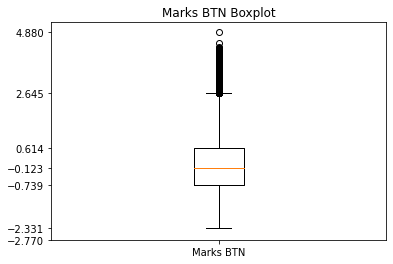

Full Data IDE on column 'Marks OTN'


Marks OTN
Number of Missing       0.000000e+00
mean                   -3.234452e-18
std                     9.770949e-01
min                    -2.768061e+00
q1                     -7.299589e-01
q2                     -1.054899e-01
q3                      6.257862e-01
max                     3.741905e+00
IQR                     1.355745e+00
1.5 upper bound         2.659404e+00
1.5 lower bound        -2.763577e+00
3 upper bound           4.693022e+00
3 lower bound          -4.797194e+00
number of 1.5 outliers  4.020000e+02
number of 3 outliers    0.000000e+00

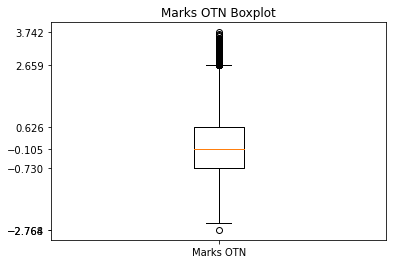

Full Data IDE on column 'Goals BTN'


Goals BTN
Number of Missing       0.000000e+00
mean                    6.042898e-19
std                     9.886181e-01
min                    -9.500046e-01
q1                     -6.011710e-01
q2                     -5.201374e-01
q3                      4.660169e-01
max                     5.762629e+00
IQR                     1.067188e+00
1.5 upper bound         2.066799e+00
1.5 lower bound        -2.201953e+00
3 upper bound           3.667580e+00
3 lower bound          -3.802734e+00
number of 1.5 outliers  3.089000e+03
number of 3 outliers    5.420000e+02

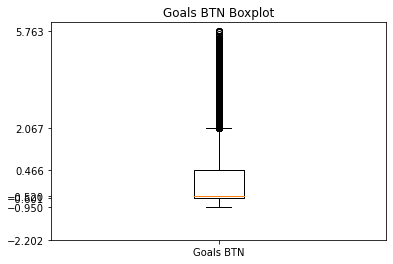

Full Data IDE on column 'Goals OTN'


Goals OTN
Number of Missing       0.000000e+00
mean                    3.697053e-18
std                     9.770949e-01
min                    -1.231277e+00
q1                     -6.154575e-01
q2                     -4.954337e-01
q3                      4.722548e-01
max                     4.477215e+00
IQR                     1.087712e+00
1.5 upper bound         2.103823e+00
1.5 lower bound        -2.247026e+00
3 upper bound           3.735392e+00
3 lower bound          -3.878594e+00
number of 1.5 outliers  3.082000e+03
number of 3 outliers    2.090000e+02

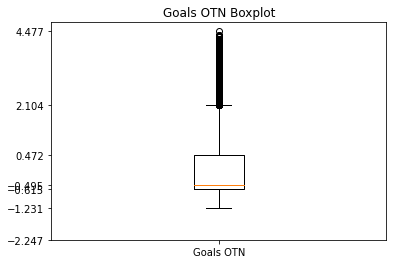

Full Data IDE on column 'Behinds BTN'


Behinds BTN
Number of Missing       0.000000e+00
mean                    8.232980e-18
std                     9.886181e-01
min                    -8.687786e-01
q1                     -5.813877e-01
q2                     -4.981508e-01
q3                      6.166416e-01
max                     5.955349e+00
IQR                     1.198029e+00
1.5 upper bound         2.413686e+00
1.5 lower bound        -2.378432e+00
3 upper bound           4.210730e+00
3 lower bound          -4.175476e+00
number of 1.5 outliers  2.322000e+03
number of 3 outliers    1.960000e+02

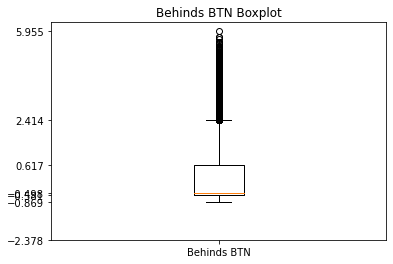

Full Data IDE on column 'Behinds OTN'


Behinds OTN
Number of Missing       0.000000e+00
mean                    5.438608e-18
std                     9.767316e-01
min                    -1.231277e+00
q1                     -5.961584e-01
q2                     -4.726566e-01
q3                      5.417363e-01
max                     4.587317e+00
IQR                     1.137895e+00
1.5 upper bound         2.248578e+00
1.5 lower bound        -2.303001e+00
3 upper bound           3.955421e+00
3 lower bound          -4.009843e+00
number of 1.5 outliers  2.772000e+03
number of 3 outliers    1.010000e+02

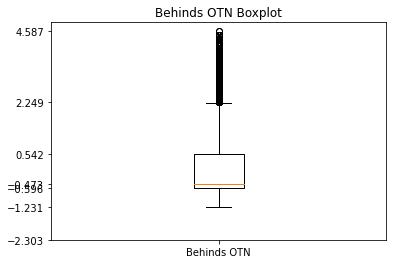

Full Data IDE on column 'Tackles BTN'


Tackles BTN
Number of Missing       0.000000e+00
mean                    1.088472e-18
std                     9.886181e-01
min                    -2.128903e+00
q1                     -7.400911e-01
q2                     -1.890101e-01
q3                      5.460321e-01
max                     5.206636e+00
IQR                     1.286123e+00
1.5 upper bound         2.475217e+00
1.5 lower bound        -2.669276e+00
3 upper bound           4.404402e+00
3 lower bound          -4.598461e+00
number of 1.5 outliers  1.323000e+03
number of 3 outliers    2.200000e+01

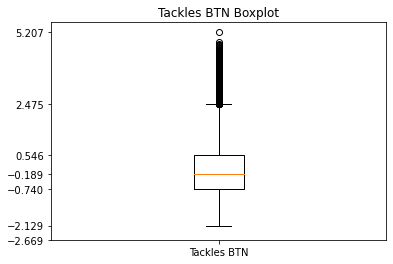

Full Data IDE on column 'Tackles OTN'


Tackles OTN
Number of Missing       0.000000e+00
mean                   -2.833781e-19
std                     9.770949e-01
min                    -2.298684e+00
q1                     -7.315443e-01
q2                     -1.865911e-01
q3                      5.526794e-01
max                     4.080197e+00
IQR                     1.284224e+00
1.5 upper bound         2.479015e+00
1.5 lower bound        -2.657880e+00
3 upper bound           4.405351e+00
3 lower bound          -4.584215e+00
number of 1.5 outliers  1.197000e+03
number of 3 outliers    0.000000e+00

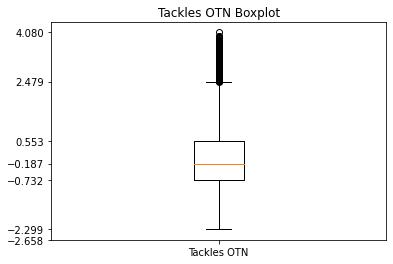

Full Data IDE on column 'Hitouts BTN'


Hitouts BTN
Number of Missing       0.000000e+00
mean                    2.727749e-17
std                     9.886181e-01
min                    -4.163757e-01
q1                     -2.782880e-01
q2                     -2.549510e-01
q3                     -2.326152e-01
max                     6.444614e+00
IQR                     4.567287e-02
1.5 upper bound        -1.641059e-01
1.5 lower bound        -3.467973e-01
3 upper bound          -9.559655e-02
3 lower bound          -4.153067e-01
number of 1.5 outliers  8.526000e+03
number of 3 outliers    6.717000e+03

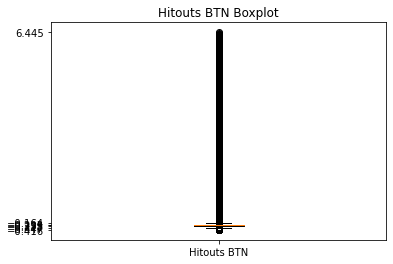

Full Data IDE on column 'Hitouts OTN'


Hitouts OTN
Number of Missing       0.000000e+00
mean                    2.606328e-17
std                     9.770949e-01
min                    -5.864827e-01
q1                     -2.924199e-01
q2                     -2.569781e-01
q3                     -2.305156e-01
max                     4.587317e+00
IQR                     6.190433e-02
1.5 upper bound        -1.376591e-01
1.5 lower bound        -3.852764e-01
3 upper bound          -4.480258e-02
3 lower bound          -4.781329e-01
number of 1.5 outliers  8.228000e+03
number of 3 outliers    6.425000e+03

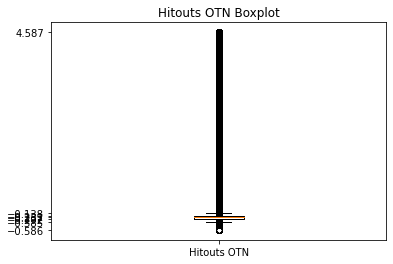

Full Data IDE on column 'Goal Assists BTN'


Goal Assists BTN
Number of Missing           0.000000e+00
mean                        7.818234e-18
std                         9.886181e-01
min                        -8.908708e-01
q1                         -5.927723e-01
q2                         -5.012970e-01
q3                          6.836602e-01
max                         5.783593e+00
IQR                         1.276432e+00
1.5 upper bound             2.598309e+00
1.5 lower bound            -2.507421e+00
3 upper bound               4.512958e+00
3 lower bound              -4.422070e+00
number of 1.5 outliers      1.775000e+03
number of 3 outliers        6.400000e+01

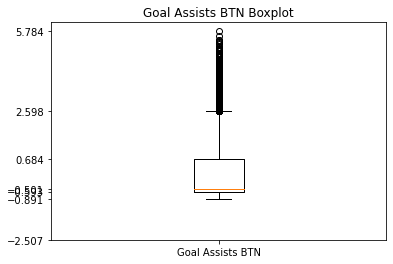

Full Data IDE on column 'Goal Assists OTN'


Goal Assists OTN
Number of Missing           0.000000e+00
mean                        4.890619e-18
std                         9.761776e-01
min                        -1.095126e+00
q1                         -6.038540e-01
q2                         -4.722548e-01
q3                          5.572385e-01
max                         4.587317e+00
IQR                         1.161092e+00
1.5 upper bound             2.298877e+00
1.5 lower bound            -2.345493e+00
3 upper bound               4.040516e+00
3 lower bound              -4.087131e+00
number of 1.5 outliers      2.478000e+03
number of 3 outliers        5.200000e+01

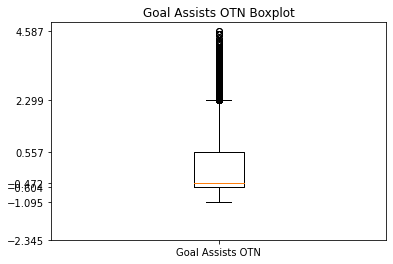

Full Data IDE on column 'Inside 50s BTN'


Inside 50s BTN
Number of Missing         0.000000e+00
mean                     -2.357106e-18
std                       9.886181e-01
min                      -1.684689e+00
q1                       -7.250698e-01
q2                       -1.745789e-01
q3                        5.525954e-01
max                       5.115916e+00
IQR                       1.277665e+00
1.5 upper bound           2.469093e+00
1.5 lower bound          -2.641568e+00
3 upper bound             4.385591e+00
3 lower bound            -4.558065e+00
number of 1.5 outliers    1.222000e+03
number of 3 outliers      1.500000e+01

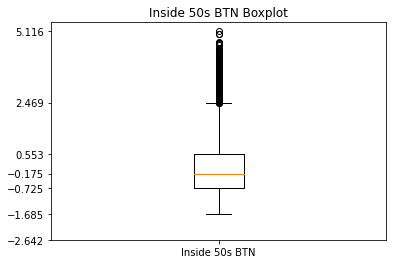

Full Data IDE on column 'Inside 50s OTN'


Inside 50s OTN
Number of Missing         0.000000e+00
mean                      5.547456e-18
std                       9.770949e-01
min                      -2.057305e+00
q1                       -7.387611e-01
q2                       -1.688169e-01
q3                        5.982930e-01
max                       4.080950e+00
IQR                       1.337054e+00
1.5 upper bound           2.603874e+00
1.5 lower bound          -2.744342e+00
3 upper bound             4.609455e+00
3 lower bound            -4.749923e+00
number of 1.5 outliers    7.970000e+02
number of 3 outliers      0.000000e+00

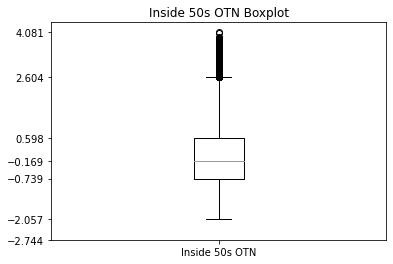

Full Data IDE on column 'Clearances BTN'


Clearances BTN
Number of Missing         0.000000e+00
mean                      3.182843e-18
std                       9.886181e-01
min                      -1.105357e+00
q1                       -7.141578e-01
q2                       -3.238690e-01
q3                        3.428010e-01
max                       5.535668e+00
IQR                       1.056959e+00
1.5 upper bound           1.928239e+00
1.5 lower bound          -2.299596e+00
3 upper bound             3.513678e+00
3 lower bound            -3.885034e+00
number of 1.5 outliers    3.841000e+03
number of 3 outliers      4.190000e+02

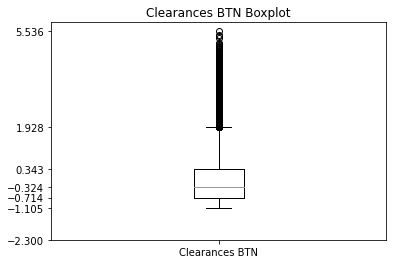

Full Data IDE on column 'Clearances OTN'


Clearances OTN
Number of Missing         0.000000e+00
mean                      6.144239e-18
std                       9.770949e-01
min                      -1.282499e+00
q1                       -7.054511e-01
q2                       -3.341658e-01
q3                        3.777733e-01
max                       4.214857e+00
IQR                       1.083224e+00
1.5 upper bound           2.002610e+00
1.5 lower bound          -2.330288e+00
3 upper bound             3.627447e+00
3 lower bound            -3.955125e+00
number of 1.5 outliers    3.636000e+03
number of 3 outliers      1.450000e+02

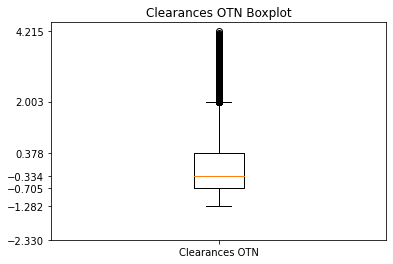

Full Data IDE on column 'Clangers BTN'


Clangers BTN
Number of Missing       0.000000e+00
mean                    2.092494e-18
std                     9.886181e-01
min                    -4.979199e+00
q1                     -5.996902e-01
q2                      1.436705e-01
q3                      7.507882e-01
max                     2.148175e+00
IQR                     1.350478e+00
1.5 upper bound         2.776506e+00
1.5 lower bound        -2.625408e+00
3 upper bound           4.802223e+00
3 lower bound          -4.651126e+00
number of 1.5 outliers  7.700000e+02
number of 3 outliers    2.000000e+00

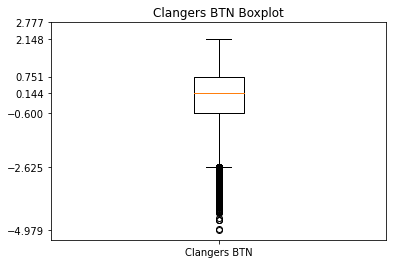

Full Data IDE on column 'Clangers OTN'


Clangers OTN
Number of Missing       0.000000e+00
mean                   -2.824398e-18
std                     9.770949e-01
min                    -3.923521e+00
q1                     -6.070509e-01
q2                      1.346094e-01
q3                      7.385489e-01
max                     2.408582e+00
IQR                     1.345600e+00
1.5 upper bound         2.756949e+00
1.5 lower bound        -2.625451e+00
3 upper bound           4.775349e+00
3 lower bound          -4.643851e+00
number of 1.5 outliers  5.970000e+02
number of 3 outliers    0.000000e+00

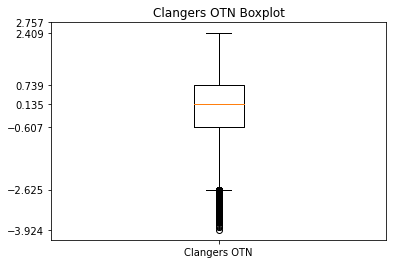

Full Data IDE on column 'Rebound 50s BTN'


Rebound 50s BTN
Number of Missing          0.000000e+00
mean                       3.586329e-18
std                        9.886181e-01
min                       -1.262291e+00
q1                        -8.140320e-01
q2                        -3.133806e-01
q3                         4.786638e-01
max                        5.712293e+00
IQR                        1.292696e+00
1.5 upper bound            2.417708e+00
1.5 lower bound           -2.753076e+00
3 upper bound              4.356751e+00
3 lower bound             -4.692119e+00
number of 1.5 outliers     1.808000e+03
number of 3 outliers       6.500000e+01

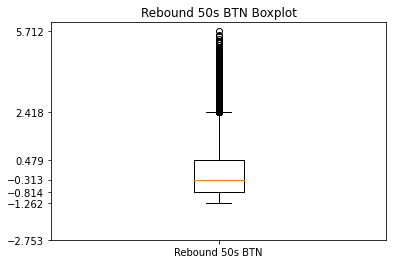

Full Data IDE on column 'Rebound 50s OTN'


Rebound 50s OTN
Number of Missing          0.000000e+00
mean                       6.743837e-18
std                        9.770949e-01
min                       -1.548466e+00
q1                        -7.970601e-01
q2                        -2.916479e-01
q3                         5.139497e-01
max                        4.210524e+00
IQR                        1.311010e+00
1.5 upper bound            2.480464e+00
1.5 lower bound           -2.763575e+00
3 upper bound              4.446979e+00
3 lower bound             -4.730090e+00
number of 1.5 outliers     1.549000e+03
number of 3 outliers       0.000000e+00

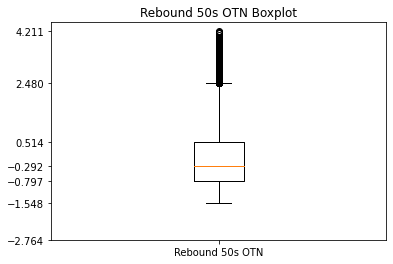

Full Data IDE on column 'Frees For BTN'


Frees For BTN
Number of Missing        0.000000e+00
mean                    -4.545310e-18
std                      9.886181e-01
min                     -1.360763e+00
q1                      -8.351813e-01
q2                      -2.677688e-02
q3                       4.128124e-01
max                      5.302691e+00
IQR                      1.247994e+00
1.5 upper bound          2.284803e+00
1.5 lower bound         -2.707172e+00
3 upper bound            4.156794e+00
3 lower bound           -4.579163e+00
number of 1.5 outliers   1.888000e+03
number of 3 outliers     6.000000e+01

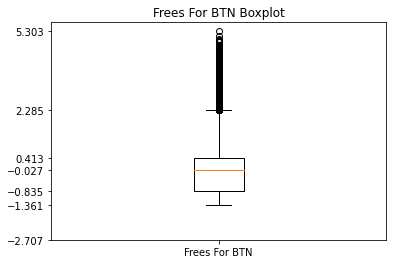

Full Data IDE on column 'Frees For OTN'


Frees For OTN
Number of Missing        0.000000e+00
mean                    -5.600003e-18
std                      9.770949e-01
min                     -1.790739e+00
q1                      -8.129201e-01
q2                      -8.198873e-02
q3                       5.003724e-01
max                      4.185470e+00
IQR                      1.313293e+00
1.5 upper bound          2.470311e+00
1.5 lower bound         -2.782859e+00
3 upper bound            4.440250e+00
3 lower bound           -4.752798e+00
number of 1.5 outliers   1.272000e+03
number of 3 outliers     0.000000e+00

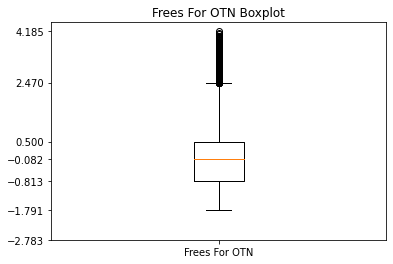

Full Data IDE on column 'Frees Agains BTN'


Frees Agains BTN
Number of Missing           0.000000e+00
mean                        3.051476e-18
std                         9.886181e-01
min                        -5.592202e+00
q1                         -4.211884e-01
q2                          2.869343e-02
q3                          8.336363e-01
max                         1.325344e+00
IQR                         1.254825e+00
1.5 upper bound             2.715873e+00
1.5 lower bound            -2.303425e+00
3 upper bound               4.598110e+00
3 lower bound              -4.185663e+00
number of 1.5 outliers      1.795000e+03
number of 3 outliers        4.900000e+01

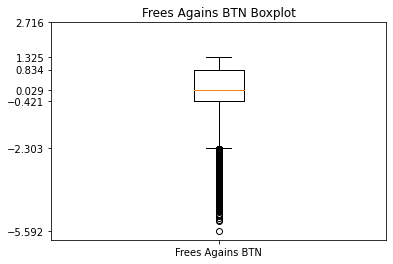

Full Data IDE on column 'Frees Agains OTN'


Frees Agains OTN
Number of Missing           0.000000e+00
mean                        5.930298e-18
std                         9.770949e-01
min                        -4.233703e+00
q1                         -5.003724e-01
q2                          7.898645e-02
q3                          8.129201e-01
max                         1.658715e+00
IQR                         1.313293e+00
1.5 upper bound             2.782859e+00
1.5 lower bound            -2.470311e+00
3 upper bound               4.752798e+00
3 lower bound              -4.440250e+00
number of 1.5 outliers      1.232000e+03
number of 3 outliers        0.000000e+00

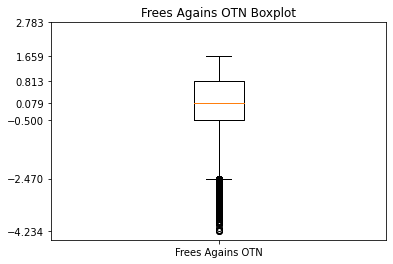

Full Data IDE on column 'Contested Possessions BTN'


Contested Possessions BTN
Number of Missing                    0.000000e+00
mean                                 2.676141e-18
std                                  9.886181e-01
min                                 -2.359819e+00
q1                                  -7.043344e-01
q2                                  -1.740708e-01
q3                                   5.261501e-01
max                                  4.957003e+00
IQR                                  1.230484e+00
1.5 upper bound                      2.371877e+00
1.5 lower bound                     -2.550061e+00
3 upper bound                        4.217603e+00
3 lower bound                       -4.395788e+00
number of 1.5 outliers               1.608000e+03
number of 3 outliers                 3.000000e+01

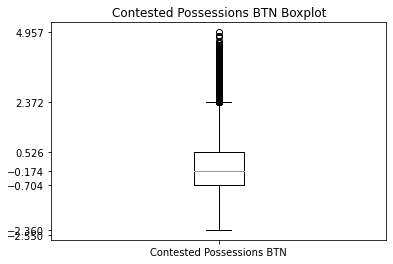

Full Data IDE on column 'Contested Possessions OTN'


Contested Possessions OTN
Number of Missing                    0.000000e+00
mean                                 1.171046e-18
std                                  9.770949e-01
min                                 -2.650082e+00
q1                                  -7.029058e-01
q2                                  -1.767057e-01
q3                                   5.336093e-01
max                                  4.028886e+00
IQR                                  1.236515e+00
1.5 upper bound                      2.388382e+00
1.5 lower bound                     -2.557678e+00
3 upper bound                        4.243155e+00
3 lower bound                       -4.412451e+00
number of 1.5 outliers               1.428000e+03
number of 3 outliers                 0.000000e+00

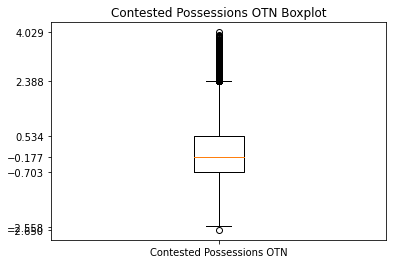

Full Data IDE on column 'Uncontested Possessions BTN'


Uncontested Possessions BTN
Number of Missing                      0.000000e+00
mean                                   1.024665e-18
std                                    9.886181e-01
min                                   -2.595396e+00
q1                                    -7.442478e-01
q2                                    -1.153391e-01
q3                                     6.377618e-01
max                                    4.215006e+00
IQR                                    1.382010e+00
1.5 upper bound                        2.710776e+00
1.5 lower bound                       -2.817262e+00
3 upper bound                          4.783791e+00
3 lower bound                         -4.890277e+00
number of 1.5 outliers                 4.240000e+02
number of 3 outliers                   0.000000e+00

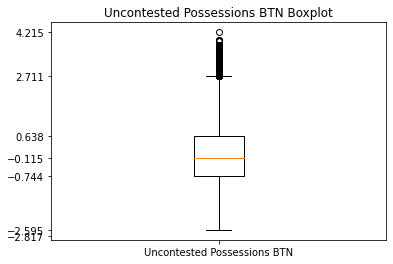

Full Data IDE on column 'Uncontested Possessions OTN'


Uncontested Possessions OTN
Number of Missing                      0.000000e+00
mean                                   6.005365e-20
std                                    9.770949e-01
min                                   -2.812743e+00
q1                                    -7.410554e-01
q2                                    -1.110905e-01
q3                                     6.587819e-01
max                                    3.780432e+00
IQR                                    1.399837e+00
1.5 upper bound                        2.758538e+00
1.5 lower bound                       -2.840811e+00
3 upper bound                          4.858294e+00
3 lower bound                         -4.940567e+00
number of 1.5 outliers                 2.310000e+02
number of 3 outliers                   0.000000e+00

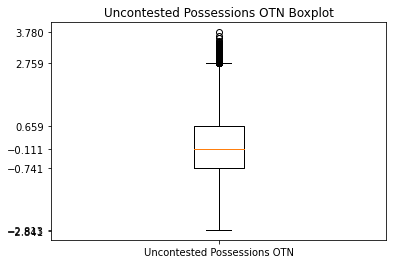

Full Data IDE on column 'Effective Disposals BTN'


Effective Disposals BTN
Number of Missing                  0.000000e+00
mean                              -1.122253e-18
std                                9.886181e-01
min                               -2.573956e+00
q1                                -7.429016e-01
q2                                -1.168902e-01
q3                                 6.387248e-01
max                                4.366565e+00
IQR                                1.381626e+00
1.5 upper bound                    2.711164e+00
1.5 lower bound                   -2.815341e+00
3 upper bound                      4.783604e+00
3 lower bound                     -4.887781e+00
number of 1.5 outliers             3.760000e+02
number of 3 outliers               0.000000e+00

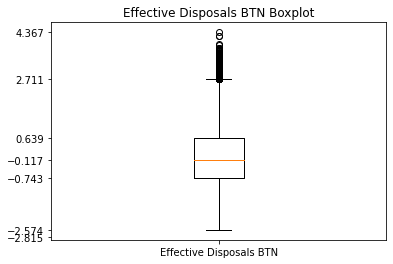

Full Data IDE on column 'Effective Disposals OTN'


Effective Disposals OTN
Number of Missing                  0.000000e+00
mean                              -1.520108e-18
std                                9.770949e-01
min                               -2.869048e+00
q1                                -7.407338e-01
q2                                -1.151193e-01
q3                                 6.540268e-01
max                                3.709055e+00
IQR                                1.394761e+00
1.5 upper bound                    2.746168e+00
1.5 lower bound                   -2.832875e+00
3 upper bound                      4.838308e+00
3 lower bound                     -4.925015e+00
number of 1.5 outliers             2.180000e+02
number of 3 outliers               0.000000e+00

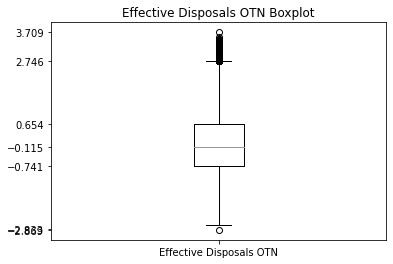

Full Data IDE on column 'Contested Marks BTN'


Contested Marks BTN
Number of Missing              0.000000e+00
mean                           3.400538e-18
std                            9.886181e-01
min                           -9.288796e-01
q1                            -6.053737e-01
q2                            -5.202773e-01
q3                             5.044781e-01
max                            5.875823e+00
IQR                            1.109852e+00
1.5 upper bound                2.169256e+00
1.5 lower bound               -2.270151e+00
3 upper bound                  3.834033e+00
3 lower bound                 -3.934929e+00
number of 1.5 outliers         2.846000e+03
number of 3 outliers           4.000000e+02

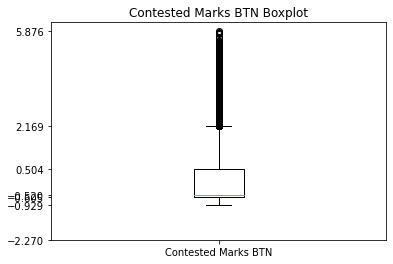

Full Data IDE on column 'Contested Marks OTN'


Contested Marks OTN
Number of Missing              0.000000e+00
mean                           6.527081e-18
std                            9.769133e-01
min                           -1.207749e+00
q1                            -6.154575e-01
q2                            -4.954337e-01
q3                             4.954337e-01
max                            4.477215e+00
IQR                            1.110891e+00
1.5 upper bound                2.161770e+00
1.5 lower bound               -2.281794e+00
3 upper bound                  3.828107e+00
3 lower bound                 -3.948131e+00
number of 1.5 outliers         3.065000e+03
number of 3 outliers           1.440000e+02

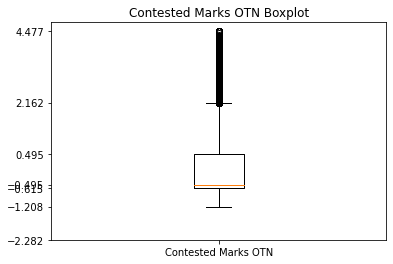

Full Data IDE on column 'Marks Inside 50 BTN'


Marks Inside 50 BTN
Number of Missing              0.000000e+00
mean                           2.687401e-18
std                            9.886181e-01
min                           -8.995889e-01
q1                            -5.669083e-01
q2                            -4.846581e-01
q3                             4.197494e-01
max                            6.154153e+00
IQR                            9.866576e-01
1.5 upper bound                1.899736e+00
1.5 lower bound               -2.046895e+00
3 upper bound                  3.379722e+00
3 lower bound                 -3.526881e+00
number of 1.5 outliers         3.658000e+03
number of 3 outliers           9.430000e+02

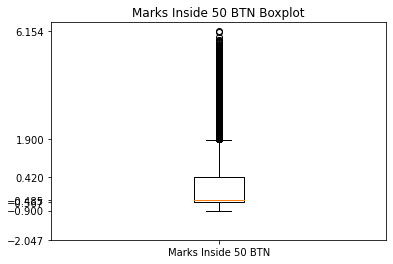

Full Data IDE on column 'Marks Inside 50 OTN'


Marks Inside 50 OTN
Number of Missing              0.000000e+00
mean                           7.268368e-18
std                            9.769133e-01
min                           -1.131149e+00
q1                            -5.819877e-01
q2                            -4.691262e-01
q3                             3.813850e-01
max                            4.587317e+00
IQR                            9.633727e-01
1.5 upper bound                1.826444e+00
1.5 lower bound               -2.027047e+00
3 upper bound                  3.271503e+00
3 lower bound                 -3.472106e+00
number of 1.5 outliers         4.203000e+03
number of 3 outliers           8.580000e+02

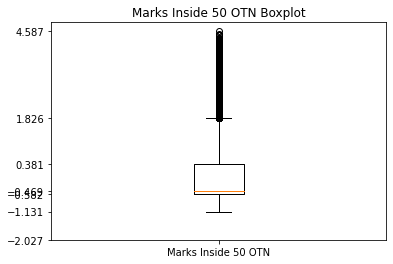

Full Data IDE on column 'One Percenters BTN'


One Percenters BTN
Number of Missing             0.000000e+00
mean                          2.007105e-18
std                           9.886181e-01
min                          -1.568142e+00
q1                           -6.881561e-01
q2                           -3.004968e-01
q3                            3.900243e-01
max                           5.640964e+00
IQR                           1.078180e+00
1.5 upper bound               2.007295e+00
1.5 lower bound              -2.305427e+00
3 upper bound                 3.624565e+00
3 lower bound                -3.922697e+00
number of 1.5 outliers        3.193000e+03
number of 3 outliers          4.480000e+02

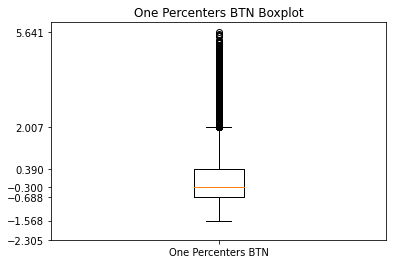

Full Data IDE on column 'One Percenters OTN'


One Percenters OTN
Number of Missing             0.000000e+00
mean                          6.104359e-18
std                           9.770949e-01
min                          -2.049390e+00
q1                           -6.834796e-01
q2                           -2.892596e-01
q3                            4.012994e-01
max                           4.286938e+00
IQR                           1.084779e+00
1.5 upper bound               2.028468e+00
1.5 lower bound              -2.310648e+00
3 upper bound                 3.655637e+00
3 lower bound                -3.937817e+00
number of 1.5 outliers        3.235000e+03
number of 3 outliers          1.610000e+02

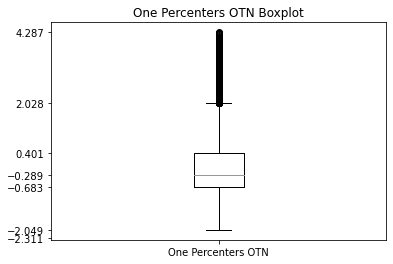

Full Data IDE on column 'Bounces BTN'


Bounces BTN
Number of Missing       0.000000e+00
mean                    2.650242e-17
std                     9.863928e-01
min                    -7.009480e-01
q1                     -4.208203e-01
q2                     -3.454113e-01
q3                     -2.510973e-01
max                     6.634888e+00
IQR                     1.697230e-01
1.5 upper bound         3.487139e-03
1.5 lower bound        -6.754047e-01
3 upper bound           2.580716e-01
3 lower bound          -9.299891e-01
number of 1.5 outliers  9.918000e+03
number of 3 outliers    9.654000e+03

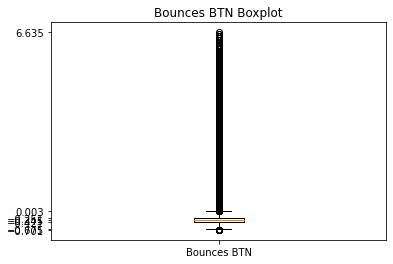

Full Data IDE on column 'Bounces OTN'


Bounces OTN
Number of Missing       0.000000e+00
mean                    1.916368e-17
std                     9.547382e-01
min                    -8.386592e-01
q1                     -4.321561e-01
q2                     -3.316183e-01
q3                     -2.132007e-01
max                     4.587317e+00
IQR                     2.189554e-01
1.5 upper bound         1.152324e-01
1.5 lower bound        -7.605892e-01
3 upper bound           4.436654e-01
3 lower bound          -1.089022e+00
number of 1.5 outliers  9.786000e+03
number of 3 outliers    8.936000e+03

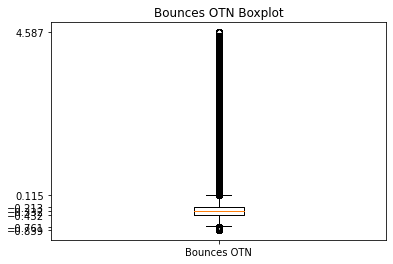

Full Data IDE on column 'Centre Clearances BTN'


Centre Clearances BTN
Number of Missing                0.000000e+00
mean                             8.341827e-18
std                              9.886181e-01
min                             -8.796923e-01
q1                              -5.422849e-01
q2                              -4.773989e-01
q3                               3.348162e-01
max                              6.034949e+00
IQR                              8.771012e-01
1.5 upper bound                  1.650468e+00
1.5 lower bound                 -1.857937e+00
3 upper bound                    2.966120e+00
3 lower bound                   -3.173588e+00
number of 1.5 outliers           4.901000e+03
number of 3 outliers             1.545000e+03

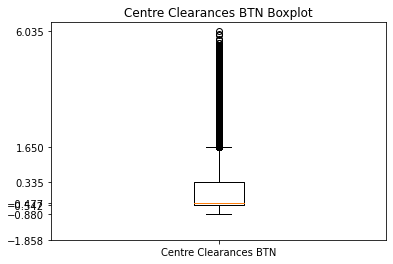

Full Data IDE on column 'Centre Clearances OTN'


Centre Clearances OTN
Number of Missing                0.000000e+00
mean                             2.735256e-18
std                              9.770949e-01
min                             -9.021505e-01
q1                              -5.526794e-01
q2                              -4.664199e-01
q3                               3.199177e-01
max                              4.415477e+00
IQR                              8.725971e-01
1.5 upper bound                  1.628813e+00
1.5 lower bound                 -1.861575e+00
3 upper bound                    2.937709e+00
3 lower bound                   -3.170471e+00
number of 1.5 outliers           5.319000e+03
number of 3 outliers             1.544000e+03

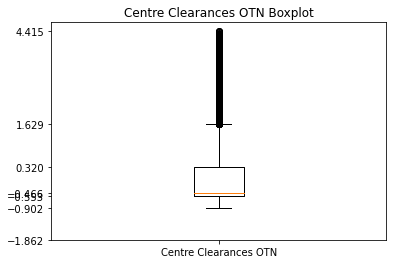

Full Data IDE on column 'Stoppage Clearances BTN'


Stoppage Clearances BTN
Number of Missing                  0.000000e+00
mean                               5.149600e-18
std                                9.886181e-01
min                               -1.098363e+00
q1                                -7.184292e-01
q2                                -3.100511e-01
q3                                 4.222270e-01
max                                5.422644e+00
IQR                                1.140656e+00
1.5 upper bound                    2.133211e+00
1.5 lower bound                   -2.429413e+00
3 upper bound                      3.844195e+00
3 lower bound                     -4.140398e+00
number of 1.5 outliers             2.953000e+03
number of 3 outliers               2.350000e+02

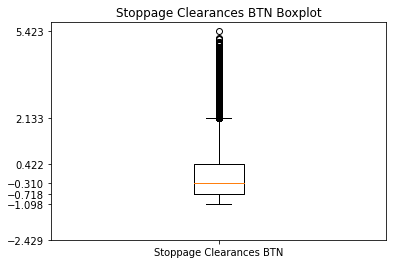

Full Data IDE on column 'Stoppage Clearances OTN'


Stoppage Clearances OTN
Number of Missing                  0.000000e+00
mean                               4.804292e-19
std                                9.770949e-01
min                               -1.215333e+00
q1                                -7.145424e-01
q2                                -3.515899e-01
q3                                 4.197902e-01
max                                4.253850e+00
IQR                                1.134333e+00
1.5 upper bound                    2.121289e+00
1.5 lower bound                   -2.416041e+00
3 upper bound                      3.822788e+00
3 lower bound                     -4.117540e+00
number of 1.5 outliers             3.010000e+03
number of 3 outliers               5.400000e+01

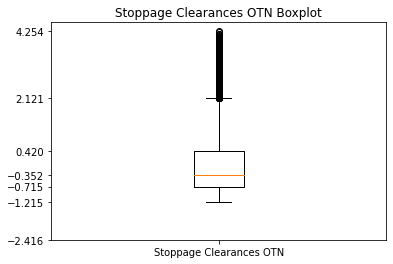

Full Data IDE on column 'Score Involvements BTN'


Score Involvements BTN
Number of Missing                 0.000000e+00
mean                             -3.302951e-19
std                               9.886181e-01
min                              -2.654306e+00
q1                               -7.477187e-01
q2                               -1.164307e-01
q3                                6.425356e-01
max                               4.974896e+00
IQR                               1.390254e+00
1.5 upper bound                   2.727917e+00
1.5 lower bound                  -2.833100e+00
3 upper bound                     4.813299e+00
3 lower bound                    -4.918482e+00
number of 1.5 outliers            4.110000e+02
number of 3 outliers              1.000000e+00

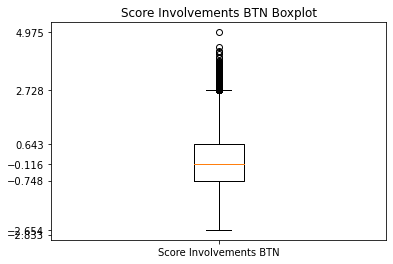

Full Data IDE on column 'Score Involvements OTN'


Score Involvements OTN
Number of Missing                 0.000000e+00
mean                             -8.707779e-19
std                               9.770949e-01
min                              -2.592296e+00
q1                               -7.486240e-01
q2                               -8.623498e-02
q3                                6.674238e-01
max                               4.049520e+00
IQR                               1.416048e+00
1.5 upper bound                   2.791496e+00
1.5 lower bound                  -2.872696e+00
3 upper bound                     4.915567e+00
3 lower bound                    -4.996767e+00
number of 1.5 outliers            1.480000e+02
number of 3 outliers              0.000000e+00

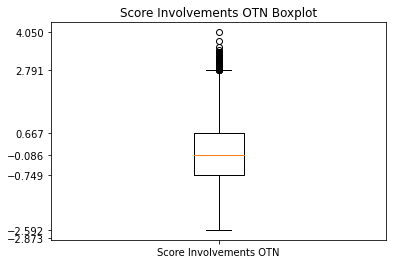

Full Data IDE on column 'Metres Gained BTN'


Metres Gained BTN
Number of Missing            0.000000e+00
mean                         1.082842e-18
std                          9.882504e-01
min                         -2.561124e+00
q1                          -7.328318e-01
q2                          -1.378337e-01
q3                           6.012894e-01
max                          4.404619e+00
IQR                          1.334121e+00
1.5 upper bound              2.602471e+00
1.5 lower bound             -2.734014e+00
3 upper bound                4.603653e+00
3 lower bound               -4.735195e+00
number of 1.5 outliers       7.440000e+02
number of 3 outliers         0.000000e+00

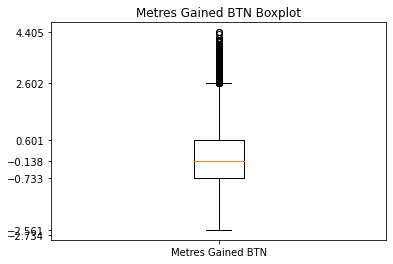

Full Data IDE on column 'Metres Gained OTN'


Metres Gained OTN
Number of Missing            0.000000e+00
mean                         6.455767e-19
std                          9.767316e-01
min                         -2.673759e+00
q1                          -7.283487e-01
q2                          -1.374436e-01
q3                           6.072649e-01
max                          3.847231e+00
IQR                          1.335614e+00
1.5 upper bound              2.610685e+00
1.5 lower bound             -2.731769e+00
3 upper bound                4.614106e+00
3 lower bound               -4.735189e+00
number of 1.5 outliers       5.730000e+02
number of 3 outliers         0.000000e+00

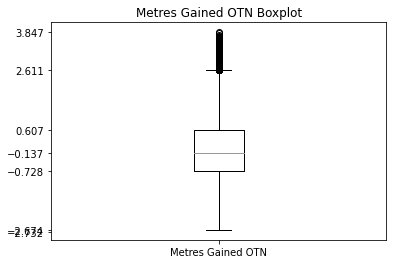

Full Data IDE on column 'Turnovers BTN'


Turnovers BTN
Number of Missing        0.000000e+00
mean                    -1.854156e-18
std                      9.882504e-01
min                     -4.890497e+00
q1                      -6.094108e-01
q2                       1.202004e-01
q3                       7.361579e-01
max                      2.497606e+00
IQR                      1.345569e+00
1.5 upper bound          2.754511e+00
1.5 lower bound         -2.627764e+00
3 upper bound            4.772864e+00
3 lower bound           -4.646117e+00
number of 1.5 outliers   7.050000e+02
number of 3 outliers     2.000000e+00

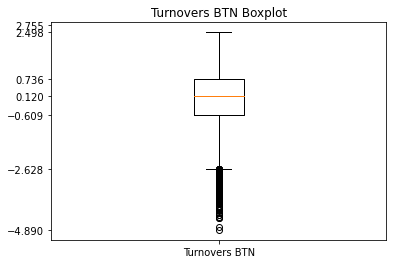

Full Data IDE on column 'Turnovers OTN'


Turnovers OTN
Number of Missing        0.000000e+00
mean                     3.152816e-18
std                      9.767316e-01
min                     -4.062393e+00
q1                      -6.151256e-01
q2                       1.195749e-01
q3                       7.346328e-01
max                      2.558409e+00
IQR                      1.349758e+00
1.5 upper bound          2.759270e+00
1.5 lower bound         -2.639763e+00
3 upper bound            4.783908e+00
3 lower bound           -4.664401e+00
number of 1.5 outliers   4.890000e+02
number of 3 outliers     0.000000e+00

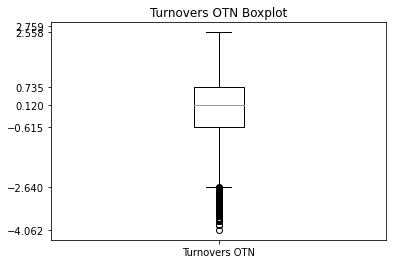

Full Data IDE on column 'Intercepts BTN'


Intercepts BTN
Number of Missing         0.000000e+00
mean                      2.182575e-18
std                       9.886181e-01
min                      -1.651785e+00
q1                       -7.636956e-01
q2                       -2.282056e-01
q3                        5.603083e-01
max                       4.830561e+00
IQR                       1.324004e+00
1.5 upper bound           2.546314e+00
1.5 lower bound          -2.749701e+00
3 upper bound             4.532320e+00
3 lower bound            -4.735707e+00
number of 1.5 outliers    1.161000e+03
number of 3 outliers      5.000000e+00

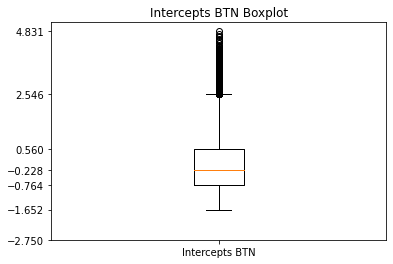

Full Data IDE on column 'Intercepts OTN'


Intercepts OTN
Number of Missing         0.000000e+00
mean                     -1.351207e-19
std                       9.770949e-01
min                      -2.199977e+00
q1                       -7.532361e-01
q2                       -2.284879e-01
q3                        5.627669e-01
max                       3.962936e+00
IQR                       1.316003e+00
1.5 upper bound           2.536771e+00
1.5 lower bound          -2.727241e+00
3 upper bound             4.510776e+00
3 lower bound            -4.701245e+00
number of 1.5 outliers    1.036000e+03
number of 3 outliers      0.000000e+00

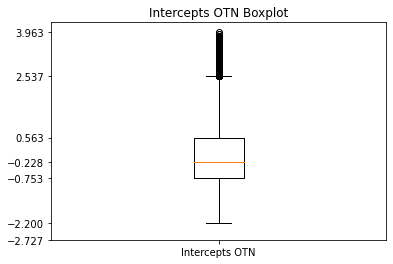

Full Data IDE on column 'Tackles Inside 50 BTN'


Tackles Inside 50 BTN
Number of Missing                0.000000e+00
mean                             1.569840e-18
std                              9.886181e-01
min                             -9.810135e-01
q1                              -6.140505e-01
q2                              -5.193265e-01
q3                               5.276831e-01
max                              5.647594e+00
IQR                              1.141734e+00
1.5 upper bound                  2.240283e+00
1.5 lower bound                 -2.326651e+00
3 upper bound                    3.952884e+00
3 lower bound                   -4.039251e+00
number of 1.5 outliers           2.687000e+03
number of 3 outliers             2.820000e+02

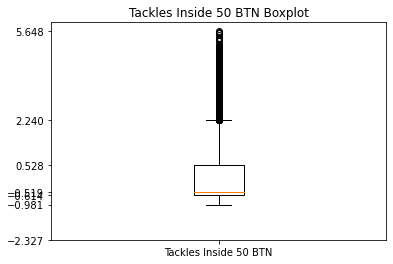

Full Data IDE on column 'Tackles Inside 50 OTN'


Tackles Inside 50 OTN
Number of Missing                0.000000e+00
mean                             6.010995e-18
std                              9.756406e-01
min                             -1.231277e+00
q1                              -6.236096e-01
q2                              -4.922862e-01
q3                               5.003724e-01
max                              4.587317e+00
IQR                              1.123982e+00
1.5 upper bound                  2.186345e+00
1.5 lower bound                 -2.309583e+00
3 upper bound                    3.872318e+00
3 lower bound                   -3.995556e+00
number of 1.5 outliers           2.787000e+03
number of 3 outliers             9.600000e+01

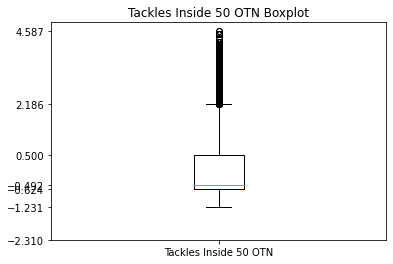

Full Data IDE on column 'Time On Ground % BTN'


Time On Ground % BTN
Number of Missing               0.000000e+00
mean                            1.162451e-16
std                             9.882504e-01
min                            -5.714709e+00
q1                             -3.863136e-01
q2                              1.488167e-01
q3                              5.761835e-01
max                             2.904657e+00
IQR                             9.624971e-01
1.5 upper bound                 2.019929e+00
1.5 lower bound                -1.830059e+00
3 upper bound                   3.463675e+00
3 lower bound                  -3.273805e+00
number of 1.5 outliers          2.944000e+03
number of 3 outliers            9.760000e+02

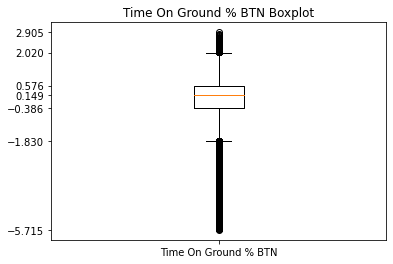

Full Data IDE on column 'Time On Ground % OTN'


Time On Ground % OTN
Number of Missing               0.000000e+00
mean                            3.161233e-16
std                             9.767316e-01
min                            -4.378398e+00
q1                             -4.125281e-01
q2                              1.507483e-01
q3                              5.813573e-01
max                             3.065052e+00
IQR                             9.938854e-01
1.5 upper bound                 2.072185e+00
1.5 lower bound                -1.903356e+00
3 upper bound                   3.563014e+00
3 lower bound                  -3.394184e+00
number of 1.5 outliers          2.951000e+03
number of 3 outliers            7.790000e+02

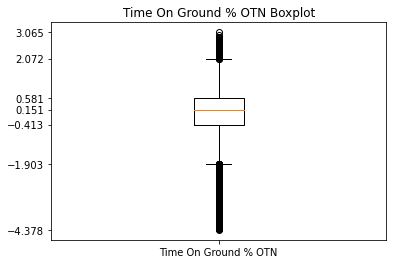

Full Data IDE on column 'Winloss'


Winloss
Number of Missing       0.000000
mean                    0.499865
std                     0.488880
min                     0.000000
q1                      0.000000
q2                      0.500000
q3                      1.000000
max                     1.000000
IQR                     1.000000
1.5 upper bound         2.500000
1.5 lower bound        -1.500000
3 upper bound           4.000000
3 lower bound          -3.000000
number of 1.5 outliers  0.000000
number of 3 outliers    0.000000

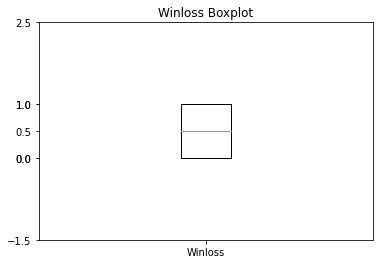

Full Data IDE on column 'Uncontested Marks BTN'


Uncontested Marks BTN
Number of Missing                0.000000e+00
mean                             2.935122e-18
std                              9.886181e-01
min                             -2.293207e+00
q1                              -7.371069e-01
q2                              -1.320597e-01
q3                               6.082617e-01
max                              4.532590e+00
IQR                              1.345369e+00
1.5 upper bound                  2.626314e+00
1.5 lower bound                 -2.755160e+00
3 upper bound                    4.644367e+00
3 lower bound                   -4.773212e+00
number of 1.5 outliers           7.690000e+02
number of 3 outliers             0.000000e+00

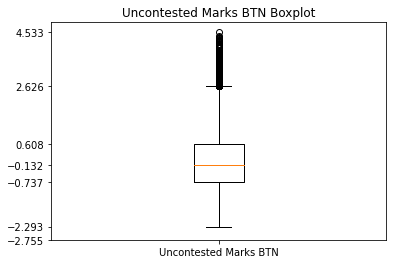

Full Data IDE on column 'Uncontested Marks OTN'


Uncontested Marks OTN
Number of Missing                0.000000e+00
mean                            -2.484720e-18
std                              9.770949e-01
min                             -2.509237e+00
q1                              -7.284116e-01
q2                              -1.086310e-01
q3                               6.285874e-01
max                              3.902632e+00
IQR                              1.356999e+00
1.5 upper bound                  2.664086e+00
1.5 lower bound                 -2.763910e+00
3 upper bound                    4.699584e+00
3 lower bound                   -4.799409e+00
number of 1.5 outliers           4.310000e+02
number of 3 outliers             0.000000e+00

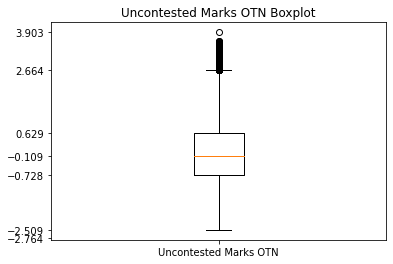

Full Data IDE on column 'Marks Outside 50 BTN'


Marks Outside 50 BTN
Number of Missing               0.000000e+00
mean                           -3.186597e-18
std                             9.886181e-01
min                            -2.241793e+00
q1                             -7.412523e-01
q2                             -1.492058e-01
q3                              5.932813e-01
max                             4.806633e+00
IQR                             1.334534e+00
1.5 upper bound                 2.595082e+00
1.5 lower bound                -2.743053e+00
3 upper bound                   4.596882e+00
3 lower bound                  -4.744853e+00
number of 1.5 outliers          8.400000e+02
number of 3 outliers            1.000000e+00

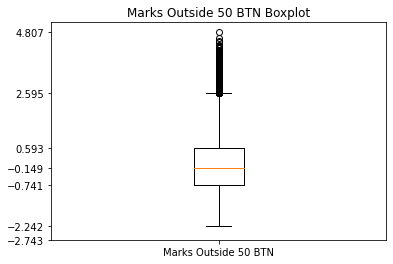

Full Data IDE on column 'Marks Outside 50 OTN'


Marks Outside 50 OTN
Number of Missing               0.000000e+00
mean                           -2.407776e-18
std                             9.770949e-01
min                            -2.354931e+00
q1                             -7.385489e-01
q2                             -1.255984e-01
q3                              6.136373e-01
max                             3.786088e+00
IQR                             1.352186e+00
1.5 upper bound                 2.641917e+00
1.5 lower bound                -2.766828e+00
3 upper bound                   4.670196e+00
3 lower bound                  -4.795108e+00
number of 1.5 outliers          5.110000e+02
number of 3 outliers            0.000000e+00

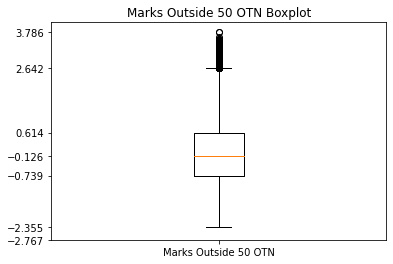

Full Data IDE on column 'Tackles Outside 50 BTN'


Tackles Outside 50 BTN
Number of Missing                 0.000000e+00
mean                             -7.394105e-19
std                               9.886181e-01
min                              -2.003599e+00
q1                               -7.203689e-01
q2                               -1.913032e-01
q3                                5.404627e-01
max                               5.333848e+00
IQR                               1.260832e+00
1.5 upper bound                   2.431710e+00
1.5 lower bound                  -2.611616e+00
3 upper bound                     4.322958e+00
3 lower bound                    -4.502864e+00
number of 1.5 outliers            1.505000e+03
number of 3 outliers              2.600000e+01

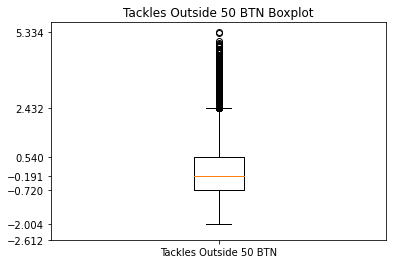

Full Data IDE on column 'Tackles Outside 50 OTN'


Tackles Outside 50 OTN
Number of Missing                 0.000000e+00
mean                              6.508314e-18
std                               9.770949e-01
min                              -2.269621e+00
q1                               -7.250405e-01
q2                               -1.920178e-01
q3                                5.526794e-01
max                               4.087165e+00
IQR                               1.277720e+00
1.5 upper bound                   2.469259e+00
1.5 lower bound                  -2.641620e+00
3 upper bound                     4.385839e+00
3 lower bound                    -4.558200e+00
number of 1.5 outliers            1.263000e+03
number of 3 outliers              0.000000e+00

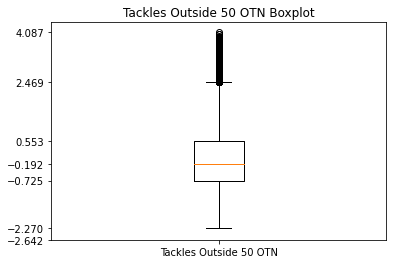

Full Data IDE on column 'Behind Assists BTN'


Behind Assists BTN
Number of Missing             0.000000e+00
mean                         -1.313674e-18
std                           9.886181e-01
min                          -2.739008e+00
q1                           -7.434569e-01
q2                           -1.162355e-01
q3                            6.377320e-01
max                           4.616793e+00
IQR                           1.381189e+00
1.5 upper bound               2.709515e+00
1.5 lower bound              -2.815240e+00
3 upper bound                 4.781299e+00
3 lower bound                -4.887024e+00
number of 1.5 outliers        4.720000e+02
number of 3 outliers          0.000000e+00

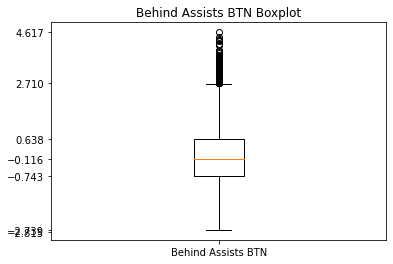

Full Data IDE on column 'Behind Assists OTN'


Behind Assists OTN
Number of Missing             0.000000e+00
mean                         -5.705096e-19
std                           9.770949e-01
min                          -2.587827e+00
q1                           -7.420067e-01
q2                           -9.022811e-02
q3                            6.602992e-01
max                           3.833675e+00
IQR                           1.402306e+00
1.5 upper bound               2.763758e+00
1.5 lower bound              -2.845466e+00
3 upper bound                 4.867217e+00
3 lower bound                -4.948925e+00
number of 1.5 outliers        2.010000e+02
number of 3 outliers          0.000000e+00

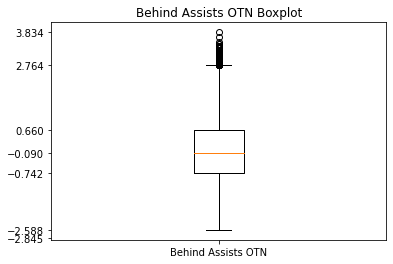

Full Data IDE on column 'Ineffective Disposals BTN'


Ineffective Disposals BTN
Number of Missing                    0.000000e+00
mean                                 1.388741e-19
std                                  9.886181e-01
min                                 -2.421067e+00
q1                                  -7.404363e-01
q2                                  -1.514460e-01
q3                                   5.837716e-01
max                                  4.603859e+00
IQR                                  1.324208e+00
1.5 upper bound                      2.570083e+00
1.5 lower bound                     -2.726748e+00
3 upper bound                        4.556395e+00
3 lower bound                       -4.713060e+00
number of 1.5 outliers               8.690000e+02
number of 3 outliers                 1.000000e+00

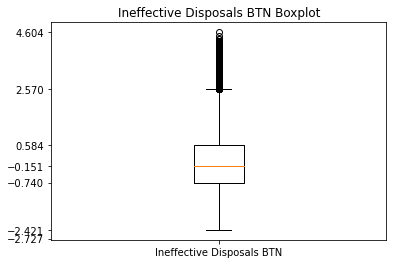

Full Data IDE on column 'Ineffective Disposals OTN'


Ineffective Disposals OTN
Number of Missing                    0.000000e+00
mean                                -2.822521e-18
std                                  9.770949e-01
min                                 -2.508488e+00
q1                                  -7.329264e-01
q2                                  -1.514024e-01
q3                                   6.023912e-01
max                                  3.903063e+00
IQR                                  1.335318e+00
1.5 upper bound                      2.605368e+00
1.5 lower bound                     -2.735903e+00
3 upper bound                        4.608344e+00
3 lower bound                       -4.738879e+00
number of 1.5 outliers               6.620000e+02
number of 3 outliers                 0.000000e+00

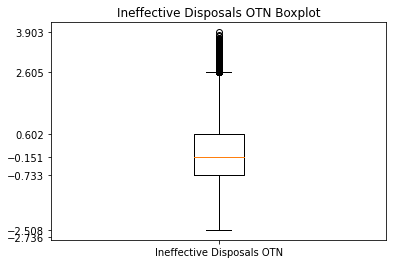

Full Data IDE on column '1'


1
Number of Missing          0.000000
mean                       0.932048
std                        0.251666
min                        0.000000
q1                         1.000000
q2                         1.000000
q3                         1.000000
max                        1.000000
IQR                        0.000000
1.5 upper bound            1.000000
1.5 lower bound            1.000000
3 upper bound              1.000000
3 lower bound              1.000000
number of 1.5 outliers  4020.000000
number of 3 outliers    4020.000000

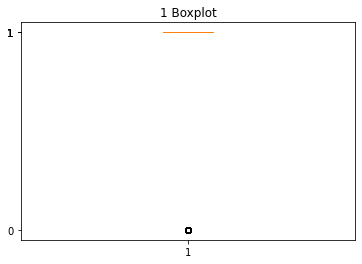

Full Data IDE on column '2'


2
Number of Missing          0.000000
mean                       0.022651
std                        0.148789
min                        0.000000
q1                         0.000000
q2                         0.000000
q3                         0.000000
max                        1.000000
IQR                        0.000000
1.5 upper bound            0.000000
1.5 lower bound            0.000000
3 upper bound              0.000000
3 lower bound              0.000000
number of 1.5 outliers  1340.000000
number of 3 outliers    1340.000000

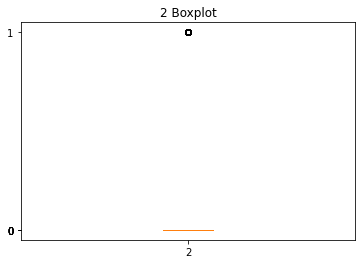

Full Data IDE on column '3'


3
Number of Missing          0.000000
mean                       0.022651
std                        0.148789
min                        0.000000
q1                         0.000000
q2                         0.000000
q3                         0.000000
max                        1.000000
IQR                        0.000000
1.5 upper bound            0.000000
1.5 lower bound            0.000000
3 upper bound              0.000000
3 lower bound              0.000000
number of 1.5 outliers  1340.000000
number of 3 outliers    1340.000000

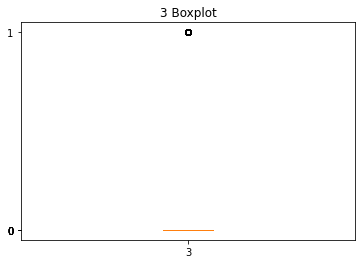

In [42]:
zhongshan.view_all_full_data_col_analysis()

Train Validate Test Split

In [14]:
from sklearn.model_selection import train_test_split

train_test_split_game_list = [game for game in csv_list[1:] if '2022' not in game]

train_games, val_test_games = train_test_split(train_test_split_game_list, train_size = 0.7, test_size = 0.3, random_state = 18661112)
val_games, test_games = train_test_split(val_test_games, train_size = 0.5, test_size = 0.5, random_state = 18661112)

train_data = pd.DataFrame()
for file in train_games:
    tmp = pd.read_csv(f'../data/curated/{manip_type}/{file}')
    train_data = train_data.append(tmp)

val_data = pd.DataFrame()
for file in val_games:
    tmp = pd.read_csv(f'../data/curated/{manip_type}/{file}')
    val_data = val_data.append(tmp)

test_data = pd.DataFrame()
for file in test_games:
    tmp = pd.read_csv(f'../data/curated/{manip_type}/{file}')
    test_data = test_data.append(tmp)

In [15]:
zhongshan.read_in_train_test_split(train_data, val_data, test_data)

Train Data read in successfully
Validation Data read in successfully
Test Data read in successfully


In [16]:
zhongshan.fill_na('Train')
zhongshan.fill_na('Validate')
zhongshan.fill_na('Test')

Filled null values on Train dataset with 0
Filled null values on Validate dataset with 0
Filled null values on Test dataset with 0


In [17]:
zhongshan.one_hot_encode_transform('Train', 'Brownlow Votes')
zhongshan.one_hot_encode_transform('Validate', 'Brownlow Votes')
zhongshan.one_hot_encode_transform('Test', 'Brownlow Votes')

OHE'ed and Dropped 'Brownlow Votes' column on Train Data
OHE'ed and Dropped 'Brownlow Votes' column on Validate Data
OHE'ed and Dropped 'Brownlow Votes' column on Test Data


In [18]:
zhongshan.pca_fit()

PCA successfully fitted on training data


In [19]:
zhongshan.view_pca_explained_variance_ratio()

PCA Explained Variance


explained_variance_ratio
0                  0.251089
1                  0.134204
2                  0.097615
3                  0.056044
4                  0.048535
5                  0.041690
6                  0.034289
7                  0.028872
8                  0.028338
9                  0.025977

In [20]:
zhongshan.pca_set_final_ncomponents(2)

Using first 2 PCA components


In [21]:
zhongshan.pca_transform_all()

PCA transformed Full Data, PLEASE REMEMBER TO USE .pca_update_features() to update feature_columns
PCA transformed Train Data, PLEASE REMEMBER TO USE .pca_update_features() to update feature_columns
PCA transformed Validate Data, PLEASE REMEMBER TO USE .pca_update_features() to update feature_columns
PCA transformed Test Data, PLEASE REMEMBER TO USE .pca_update_features() to update feature_columns


In [22]:
zhongshan.pca_update_features()

Updated feature columns and retained columns


In [23]:
zhongshan.get_abs_corr()

Calculated correlation and absolute correlation matrix on Train data


In [24]:
zhongshan.view_corr_matrix()

Kicks BTN  Kicks OTN  Handballs BTN  Handballs OTN  \
Kicks BTN                   1.000000   0.977817       0.294972       0.290304   
Kicks OTN                   0.977817   1.000000       0.290569       0.295903   
Handballs BTN               0.294972   0.290569       1.000000       0.972468   
Handballs OTN               0.290304   0.295903       0.972468       1.000000   
Disposals BTN               0.813699   0.796911       0.788933       0.769371   
...                              ...        ...            ...            ...   
Ineffective Disposals BTN   0.586532   0.589550       0.501888       0.502046   
Ineffective Disposals OTN   0.582135   0.591919       0.495330       0.504541   
1                          -0.336118  -0.313099      -0.298583      -0.280126   
2                           0.164212   0.153891       0.133456       0.125212   
3                           0.183376   0.170784       0.165926       0.155143   

                           Disposals BTN  Disposals OTN  Marks BTN  Marks OTN  \
Kicks BTN                       0.813699       0.798574   0.532985   0.505890   
Kicks OTN                       0.796911       0.813472   0.498682   0.511626   
Handballs BTN                   0.788933       0.767243   0.057736   0.050537   
Handballs OTN                   0.769371       0.783369   0.049691   0.052153   
Disposals BTN                   1.000000       0.976961   0.373611   0.352186   
...                                  ...            ...        ...        ...   
Ineffective Disposals BTN       0.678425       0.678993   0.122449   0.126759   
Ineffective Disposals OTN       0.671530       0.683090   0.121937   0.126984   
1                              -0.396278      -0.371130  -0.174072  -0.149247   
2                               0.185983       0.174287   0.088506   0.076678   
3                               0.218210       0.204496   0.096399   0.083976   

                           Goals BTN  Goals OTN  ...  Marks Outside 50 OTN  \
Kicks BTN                   0.079420   0.057946  ...              0.511966   
Kicks OTN                   0.061832   0.058436  ...              0.517976   
Handballs BTN              -0.103517  -0.112287  ...              0.117714   
Handballs OTN              -0.116160  -0.116358  ...              0.120851   
Disposals BTN              -0.013570  -0.032380  ...              0.397174   
...                              ...        ...  ...                   ...   
Ineffective Disposals BTN   0.054191   0.054323  ...              0.094257   
Ineffective Disposals OTN   0.053644   0.053859  ...              0.094245   
1                          -0.252214  -0.203207  ...             -0.096354   
2                           0.111594   0.091782  ...              0.055540   
3                           0.135655   0.108862  ...              0.055972   

                           Tackles Outside 50 BTN  Tackles Outside 50 OTN  \
Kicks BTN                                0.174881                0.175178   
Kicks OTN                                0.176489                0.178274   
Handballs BTN                            0.346686                0.354834   
Handballs OTN                            0.356510                0.361177   
Disposals BTN                            0.321322                0.326489   
...                                           ...                     ...   
Ineffective Disposals BTN                0.269083                0.278227   
Ineffective Disposals OTN                0.275281                0.279128   
1                                       -0.151912               -0.149387   
2                                        0.074792                0.072612   
3                                        0.088872                0.089207   

                           Behind Assists BTN  Behind Assists OTN  \
Kicks BTN                            0.402991            0.384473   
Kicks OTN                            0.369401            0.389690   
Handballs BT

In [25]:
zhongshan.view_abs_corr_matrix()

Kicks BTN  Kicks OTN  Handballs BTN  Handballs OTN  \
Kicks BTN                   1.000000   0.977817       0.294972       0.290304   
Kicks OTN                   0.977817   1.000000       0.290569       0.295903   
Handballs BTN               0.294972   0.290569       1.000000       0.972468   
Handballs OTN               0.290304   0.295903       0.972468       1.000000   
Disposals BTN               0.813699   0.796911       0.788933       0.769371   
...                              ...        ...            ...            ...   
Ineffective Disposals BTN   0.586532   0.589550       0.501888       0.502046   
Ineffective Disposals OTN   0.582135   0.591919       0.495330       0.504541   
1                           0.336118   0.313099       0.298583       0.280126   
2                           0.164212   0.153891       0.133456       0.125212   
3                           0.183376   0.170784       0.165926       0.155143   

                           Disposals BTN  Disposals OTN  Marks BTN  Marks OTN  \
Kicks BTN                       0.813699       0.798574   0.532985   0.505890   
Kicks OTN                       0.796911       0.813472   0.498682   0.511626   
Handballs BTN                   0.788933       0.767243   0.057736   0.050537   
Handballs OTN                   0.769371       0.783369   0.049691   0.052153   
Disposals BTN                   1.000000       0.976961   0.373611   0.352186   
...                                  ...            ...        ...        ...   
Ineffective Disposals BTN       0.678425       0.678993   0.122449   0.126759   
Ineffective Disposals OTN       0.671530       0.683090   0.121937   0.126984   
1                               0.396278       0.371130   0.174072   0.149247   
2                               0.185983       0.174287   0.088506   0.076678   
3                               0.218210       0.204496   0.096399   0.083976   

                           Goals BTN  Goals OTN  ...  Marks Outside 50 OTN  \
Kicks BTN                   0.079420   0.057946  ...              0.511966   
Kicks OTN                   0.061832   0.058436  ...              0.517976   
Handballs BTN               0.103517   0.112287  ...              0.117714   
Handballs OTN               0.116160   0.116358  ...              0.120851   
Disposals BTN               0.013570   0.032380  ...              0.397174   
...                              ...        ...  ...                   ...   
Ineffective Disposals BTN   0.054191   0.054323  ...              0.094257   
Ineffective Disposals OTN   0.053644   0.053859  ...              0.094245   
1                           0.252214   0.203207  ...              0.096354   
2                           0.111594   0.091782  ...              0.055540   
3                           0.135655   0.108862  ...              0.055972   

                           Tackles Outside 50 BTN  Tackles Outside 50 OTN  \
Kicks BTN                                0.174881                0.175178   
Kicks OTN                                0.176489                0.178274   
Handballs BTN                            0.346686                0.354834   
Handballs OTN                            0.356510                0.361177   
Disposals BTN                            0.321322                0.326489   
...                                           ...                     ...   
Ineffective Disposals BTN                0.269083                0.278227   
Ineffective Disposals OTN                0.275281                0.279128   
1                                        0.151912                0.149387   
2                                        0.074792                0.072612   
3                                        0.088872                0.089207   

                           Behind Assists BTN  Behind Assists OTN  \
Kicks BTN                            0.402991            0.384473   
Kicks OTN                            0.369401            0.389690   
Handballs BT

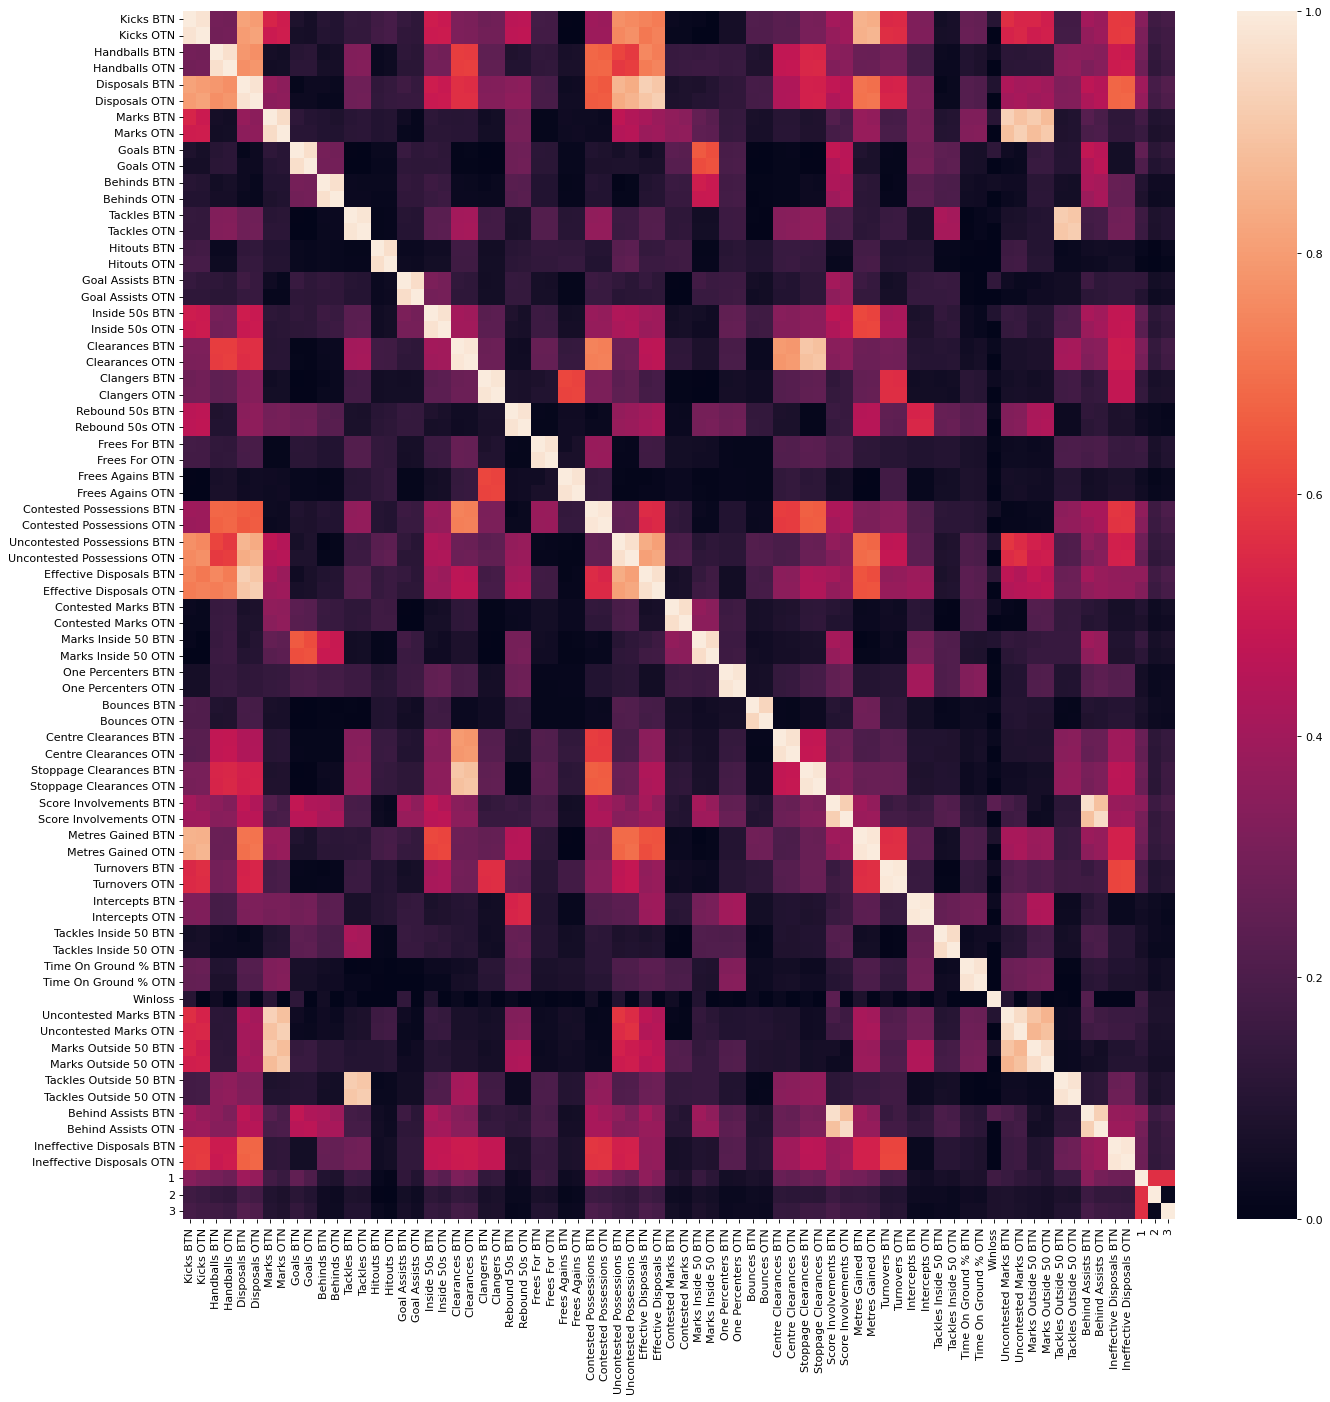

In [26]:
zhongshan.get_corr_heatmap()

In [27]:
zhongshan.view_top_corr()

Correlation between features and 1


index         1
0                             1  1.000000
1                             2  0.563813
2                             3  0.563813
3                 Disposals BTN  0.396278
4                 Disposals OTN  0.371130
5     Contested Possessions BTN  0.362935
6       Effective Disposals BTN  0.360013
7        Score Involvements BTN  0.353299
8            Behind Assists BTN  0.347265
9     Contested Possessions OTN  0.341696
10                    Kicks BTN  0.336118
11      Effective Disposals OTN  0.330845
12               Clearances BTN  0.319443
13                    Kicks OTN  0.313099
14               Clearances OTN  0.302409
15       Score Involvements OTN  0.301764
16           Behind Assists OTN  0.299725
17                Handballs BTN  0.298583
18            Metres Gained BTN  0.293260
19    Ineffective Disposals BTN  0.283581
20  Uncontested Possessions BTN  0.283543
21                Handballs OTN  0.280126
22      Stoppage Clearances BTN  0.279158
23    Ineffective Disposals OTN  0.278857
24            Metres Gained OTN  0.273119
25        Centre Clearances BTN  0.268289
26      Stoppage Clearances OTN  0.266166
27  Uncontested Possessions OTN  0.258477
28               Inside 50s BTN  0.258402
29        Centre Clearances OTN  0.256951
30                    Goals BTN  0.252214
31               Inside 50s OTN  0.232772
32                    Goals OTN  0.203207
33                Turnovers OTN  0.189050
34                Turnovers BTN  0.180341
35                    Marks BTN  0.174072
36                      Winloss  0.164893
37                  Tackles BTN  0.162299
38                Frees For BTN  0.157334
39                  Tackles OTN  0.154734
40       Tackles Outside 50 BTN  0.151912
41                Frees For OTN  0.151322
42       Tackles Outside 50 OTN  0.149387
43                    Marks OTN  0.149247
44        Uncontested Marks BTN  0.149231
45          Marks Inside 50 BTN  0.146358
46                 Clangers OTN  0.139020
47                 Clangers BTN  0.131087
48        Uncontested Marks OTN  0.127242
49             Goal Assists BTN  0.126154
50          Marks Inside 50 OTN  0.116207
51         Marks Outside 50 BTN  0.114504
52         Marks Outside 50 OTN  0.096354
53          Contested Marks BTN  0.092642
54                  Behinds BTN  0.092490
55             Goal Assists OTN  0.089960
56                  Behinds OTN  0.080089
57         Time On Ground % BTN  0.078563
58         Time On Ground % OTN  0.077630
59          Contested Marks OTN  0.075570

Correlation between features and 2


index         2
0                             2  1.000000
1                             1  0.563813
2                 Disposals BTN  0.185983
3                 Disposals OTN  0.174287
4       Effective Disposals BTN  0.169276
5                     Kicks BTN  0.164212
6     Contested Possessions BTN  0.160699
7        Score Involvements BTN  0.158034
8            Behind Assists BTN  0.156812
9       Effective Disposals OTN  0.154960
10                    Kicks OTN  0.153891
11    Contested Possessions OTN  0.152977
12  Uncontested Possessions BTN  0.139648
13            Metres Gained BTN  0.138617
14               Clearances BTN  0.137110
15           Behind Assists OTN  0.135500
16       Score Involvements OTN  0.135357
17    Ineffective Disposals BTN  0.133625
18                Handballs BTN  0.133456
19    Ineffective Disposals OTN  0.132735
20               Clearances OTN  0.130491
21            Metres Gained OTN  0.130037
22  Uncontested Possessions OTN  0.125834
23                Handballs OTN  0.125212
24               Inside 50s BTN  0.118234
25        Centre Clearances BTN  0.117574
26      Stoppage Clearances BTN  0.117109
27        Centre Clearances OTN  0.113819
28      Stoppage Clearances OTN  0.111972
29                    Goals BTN  0.111594
30               Inside 50s OTN  0.106669
31                Turnovers OTN  0.092168
32                    Goals OTN  0.091782
33                    Marks BTN  0.088506
34                Turnovers BTN  0.087586
35                  Tackles BTN  0.080127
36        Uncontested Marks BTN  0.080008
37                    Marks OTN  0.076678
38                      Winloss  0.076559
39                  Tackles OTN  0.075553
40       Tackles Outside 50 BTN  0.074792
41       Tackles Outside 50 OTN  0.072612
42                 Clangers OTN  0.070941
43        Uncontested Marks OTN  0.069087
44                Frees For BTN  0.068427
45                 Clangers BTN  0.066300
46                Frees For OTN  0.065820
47         Marks Outside 50 BTN  0.064232
48          Marks Inside 50 BTN  0.062296
49         Marks Outside 50 OTN  0.055540
50             Goal Assists BTN  0.051486
51          Marks Inside 50 OTN  0.051110
52                  Behinds BTN  0.040504
53         Time On Ground % BTN  0.040002
54         Time On Ground % OTN  0.038650
55                  Bounces BTN  0.038586
56          Contested Marks BTN  0.038051
57             Goal Assists OTN  0.036658
58               Intercepts BTN  0.035982
59                  Bounces OTN  0.035131

Correlation between features and 3


index         3
0                             3  1.000000
1                             1  0.563813
2                 Disposals BTN  0.218210
3                 Disposals OTN  0.204496
4       Effective Disposals BTN  0.199533
5     Contested Possessions BTN  0.199359
6        Score Involvements BTN  0.189634
7     Contested Possessions OTN  0.187358
8            Behind Assists BTN  0.186402
9       Effective Disposals OTN  0.184529
10                    Kicks BTN  0.183376
11               Clearances BTN  0.178801
12               Clearances OTN  0.171490
13                    Kicks OTN  0.170784
14                Handballs BTN  0.165926
15       Score Involvements OTN  0.163856
16           Behind Assists OTN  0.163182
17            Metres Gained BTN  0.163052
18      Stoppage Clearances BTN  0.162991
19      Stoppage Clearances OTN  0.157661
20  Uncontested Possessions BTN  0.155914
21    Ineffective Disposals BTN  0.155460
22                Handballs OTN  0.155143
23    Ineffective Disposals OTN  0.151649
24            Metres Gained OTN  0.151565
25  Uncontested Possessions OTN  0.143621
26               Inside 50s BTN  0.143081
27        Centre Clearances BTN  0.141528
28        Centre Clearances OTN  0.137701
29                    Goals BTN  0.135655
30               Inside 50s OTN  0.130023
31                    Goals OTN  0.108862
32                Turnovers OTN  0.103165
33                Turnovers BTN  0.099998
34                    Marks BTN  0.096399
35                  Tackles BTN  0.092419
36                Frees For BTN  0.091134
37                  Tackles OTN  0.090373
38       Tackles Outside 50 OTN  0.089207
39       Tackles Outside 50 BTN  0.088872
40                Frees For OTN  0.088026
41                    Marks OTN  0.083976
42        Uncontested Marks BTN  0.081818
43          Marks Inside 50 BTN  0.076482
44                      Winloss  0.075894
45                 Clangers OTN  0.074671
46        Uncontested Marks OTN  0.071820
47                 Clangers BTN  0.070960
48             Goal Assists BTN  0.065574
49         Marks Outside 50 BTN  0.065167
50          Marks Inside 50 OTN  0.060954
51         Marks Outside 50 OTN  0.055972
52          Contested Marks BTN  0.052222
53         Time On Ground % BTN  0.049100
54         Time On Ground % OTN  0.048887
55             Goal Assists OTN  0.044598
56                  Behinds BTN  0.042699
57          Contested Marks OTN  0.039710
58                  Behinds OTN  0.037937
59           One Percenters OTN  0.031822

In [28]:
zhongshan.get_nmi()

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for t

In [29]:
zhongshan.view_nmi_matrix()

Kicks BTN  Kicks OTN  Handballs BTN  Handballs OTN  \
Kicks BTN                   1.000000   0.969259       0.882787       0.897951   
Kicks OTN                   0.969259   1.000000       0.897089       0.918925   
Handballs BTN               0.882787   0.897089       1.000000       0.968345   
Handballs OTN               0.897951   0.918925       0.968345       1.000000   
Disposals BTN               0.907180   0.920718       0.901679       0.916213   
...                              ...        ...            ...            ...   
Ineffective Disposals BTN   0.872139   0.882415       0.868574       0.878879   
Ineffective Disposals OTN   0.879485   0.901268       0.875014       0.897857   
1                           0.033749   0.037616       0.033276       0.037349   
2                           0.015599   0.016947       0.015741       0.017097   
3                           0.016069   0.017363       0.015989       0.017323   

                           Disposals BTN  Disposals OTN  Marks BTN  Marks OTN  \
Kicks BTN                       0.907180       0.918665   0.867653   0.870775   
Kicks OTN                       0.920718       0.938863   0.877106   0.892895   
Handballs BTN                   0.901679       0.913316   0.859612   0.863900   
Handballs OTN                   0.916213       0.934539   0.871210   0.887181   
Disposals BTN                   1.000000       0.979181   0.876052   0.884013   
...                                  ...            ...        ...        ...   
Ineffective Disposals BTN       0.884355       0.895223   0.849835   0.849090   
Ineffective Disposals OTN       0.894506       0.913594   0.852571   0.869231   
1                               0.039247       0.041658   0.022699   0.026570   
2                               0.017162       0.018322   0.012247   0.013511   
3                               0.017986       0.018743   0.012513   0.013685   

                           Goals BTN  Goals OTN  ...  Marks Outside 50 OTN  \
Kicks BTN                   0.800412   0.711491  ...              0.867183   
Kicks OTN                   0.792999   0.740827  ...              0.889455   
Handballs BTN               0.803549   0.711550  ...              0.860798   
Handballs OTN               0.794637   0.742350  ...              0.884233   
Disposals BTN               0.800900   0.722387  ...              0.881015   
...                              ...        ...  ...                   ...   
Ineffective Disposals BTN   0.805496   0.702183  ...              0.845767   
Ineffective Disposals OTN   0.782836   0.728711  ...              0.866003   
1                           0.015510   0.015673  ...              0.025082   
2                           0.008033   0.007572  ...              0.013149   
3                           0.008732   0.008287  ...              0.013083   

                           Tackles Outside 50 BTN  Tackles Outside 50 OTN  \
Kicks BTN                                0.852033                0.846578   
Kicks OTN                                0.860019                0.869677   
Handballs BTN                            0.853330                0.844668   
Handballs OTN                            0.859126                0.868858   
Disposals BTN                            0.862998                0.861507   
...                                           ...                     ...   
Ineffective Disposals BTN                0.844575                0.830143   
Ineffective Disposals OTN                0.840952                0.851020   
1                                        0.020397                0.023590   
2                                        0.011346                0.012260   
3                                        0.011774                0.012670   

                           Behind Assists BTN  Behind Assists OTN  \
Kicks BTN                            0.862875            0.861735   
Kicks OTN                            0.873419            0.884224   
Handballs BT

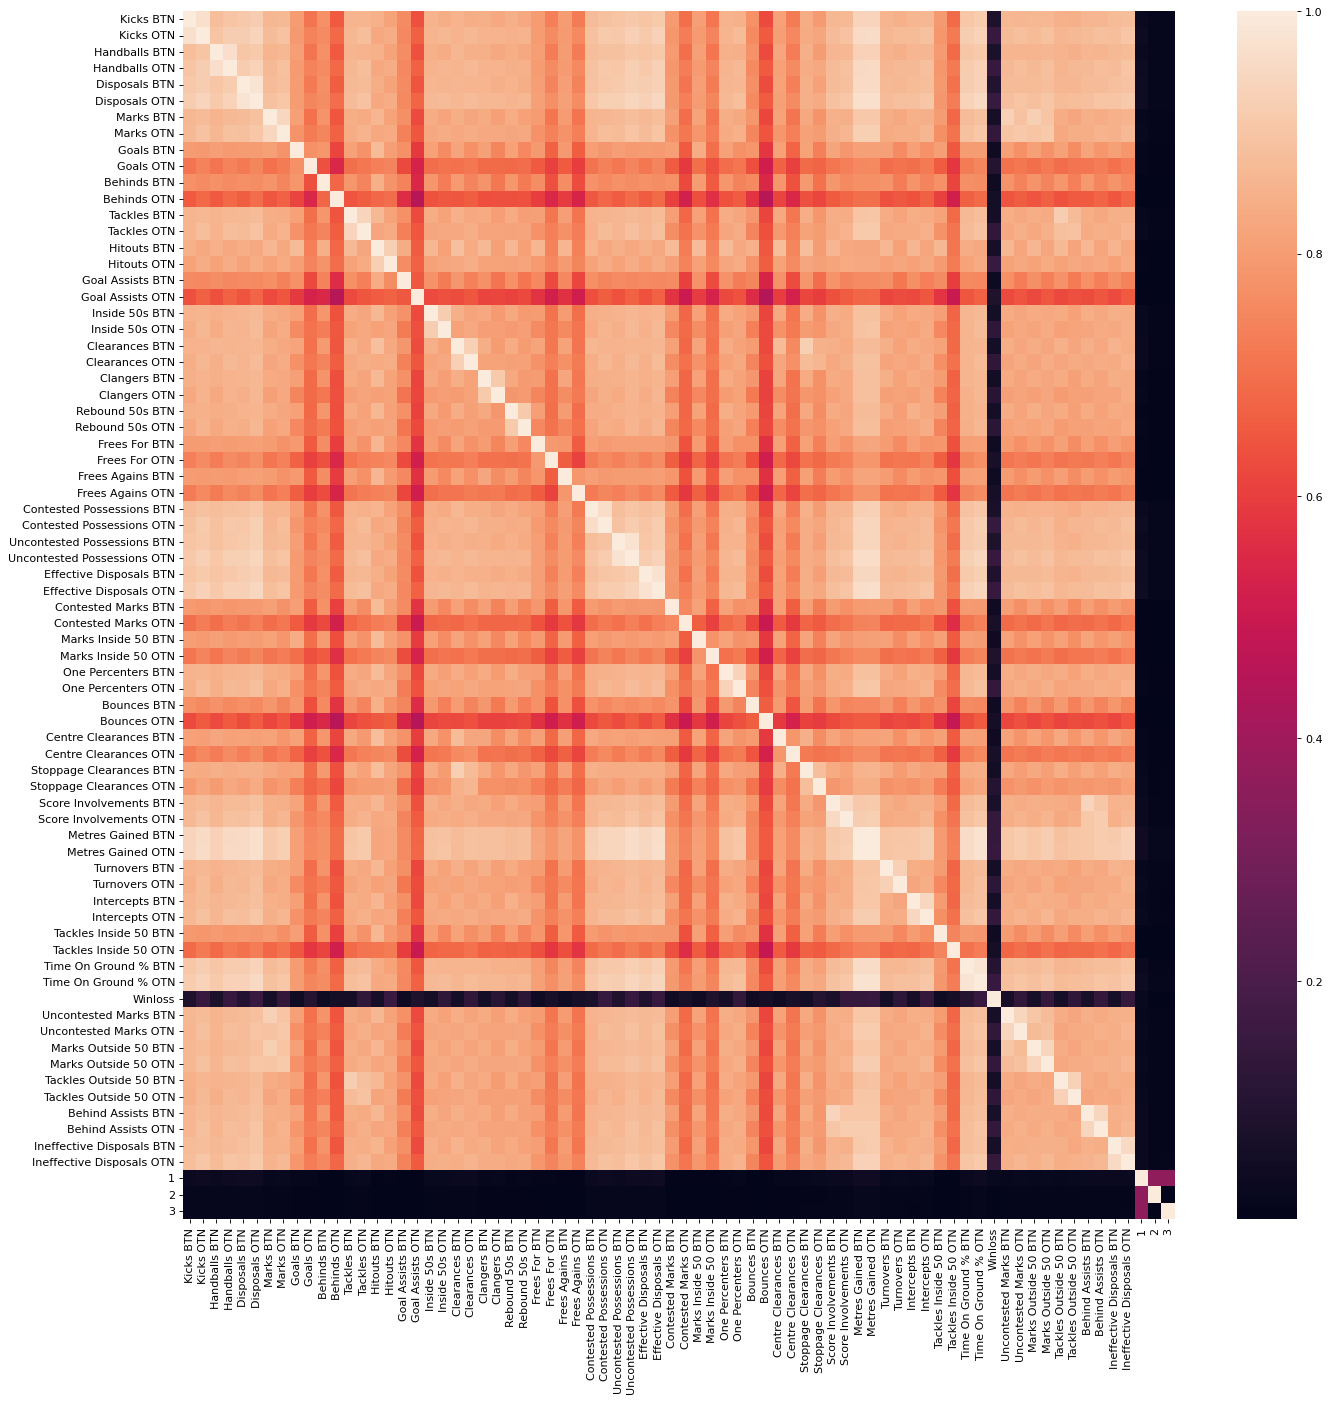

In [30]:
zhongshan.get_nmi_heatmap()

In [31]:
zhongshan.view_top_nmi()

NMI between features and 1


index         1
0                             1  1.000000
1                             3  0.364280
2                             2  0.364280
3             Metres Gained OTN  0.045289
4             Metres Gained BTN  0.044894
5                 Disposals OTN  0.041658
6       Effective Disposals OTN  0.039382
7                 Disposals BTN  0.039247
8   Uncontested Possessions OTN  0.037664
9                     Kicks OTN  0.037616
10                Handballs OTN  0.037349
11    Contested Possessions OTN  0.037175
12      Effective Disposals BTN  0.036229
13         Time On Ground % OTN  0.035651
14                    Kicks BTN  0.033749
15    Contested Possessions BTN  0.033665
16  Uncontested Possessions BTN  0.033444
17                Handballs BTN  0.033276
18    Ineffective Disposals OTN  0.032304
19       Score Involvements OTN  0.031882
20       Score Involvements BTN  0.030590
21           Behind Assists OTN  0.030382
22               Clearances OTN  0.030336
23         Time On Ground % BTN  0.030032
24           Behind Assists BTN  0.029548
25    Ineffective Disposals BTN  0.028296
26               Clearances BTN  0.027941
27                      Winloss  0.026619
28                    Marks OTN  0.026570
29               Inside 50s OTN  0.025837
30                  Tackles OTN  0.025720
31         Marks Outside 50 OTN  0.025082
32        Uncontested Marks OTN  0.024411
33                Turnovers OTN  0.024110
34               Intercepts OTN  0.023796
35       Tackles Outside 50 OTN  0.023590
36               Inside 50s BTN  0.023557
37      Stoppage Clearances OTN  0.022988
38                    Marks BTN  0.022699
39      Stoppage Clearances BTN  0.022532
40                  Tackles BTN  0.021854
41        Uncontested Marks BTN  0.021113
42                Turnovers BTN  0.021021
43         Marks Outside 50 BTN  0.020717
44       Tackles Outside 50 BTN  0.020397
45                 Clangers OTN  0.019477
46               Intercepts BTN  0.019232
47           One Percenters OTN  0.018575
48                 Clangers BTN  0.017515
49        Centre Clearances BTN  0.017261
50              Rebound 50s OTN  0.016943
51        Centre Clearances OTN  0.016324
52                    Goals OTN  0.015673
53                    Goals BTN  0.015510
54              Rebound 50s BTN  0.014104
55           One Percenters BTN  0.014026
56                  Hitouts OTN  0.012268
57                Frees For BTN  0.011468
58                Frees For OTN  0.011397
59          Marks Inside 50 BTN  0.011184

NMI between features and 2


index         2
0                             2  1.000000
1                             1  0.364280
2             Metres Gained OTN  0.019955
3             Metres Gained BTN  0.019854
4                 Disposals OTN  0.018322
5       Effective Disposals OTN  0.017680
6   Uncontested Possessions OTN  0.017183
7                 Disposals BTN  0.017162
8                 Handballs OTN  0.017097
9                     Kicks OTN  0.016947
10    Contested Possessions OTN  0.016715
11         Time On Ground % OTN  0.016666
12      Effective Disposals BTN  0.016513
13  Uncontested Possessions BTN  0.015784
14                Handballs BTN  0.015741
15                    Kicks BTN  0.015599
16    Contested Possessions BTN  0.015312
17    Ineffective Disposals OTN  0.015066
18         Time On Ground % BTN  0.014879
19       Score Involvements OTN  0.014454
20               Clearances OTN  0.014069
21           Behind Assists OTN  0.013994
22       Score Involvements BTN  0.013796
23    Ineffective Disposals BTN  0.013748
24           Behind Assists BTN  0.013525
25                    Marks OTN  0.013511
26         Marks Outside 50 OTN  0.013149
27               Clearances BTN  0.013122
28                  Tackles OTN  0.013090
29        Uncontested Marks OTN  0.012955
30               Intercepts OTN  0.012693
31               Inside 50s OTN  0.012570
32                Turnovers OTN  0.012469
33       Tackles Outside 50 OTN  0.012260
34                    Marks BTN  0.012247
35                  Tackles BTN  0.011928
36               Inside 50s BTN  0.011882
37         Marks Outside 50 BTN  0.011730
38        Uncontested Marks BTN  0.011707
39                Turnovers BTN  0.011420
40       Tackles Outside 50 BTN  0.011346
41               Intercepts BTN  0.011308
42      Stoppage Clearances BTN  0.011031
43      Stoppage Clearances OTN  0.010965
44                 Clangers OTN  0.010676
45           One Percenters OTN  0.010329
46                 Clangers BTN  0.010311
47              Rebound 50s OTN  0.009916
48              Rebound 50s BTN  0.009156
49           One Percenters BTN  0.008895
50        Centre Clearances BTN  0.008559
51                    Goals BTN  0.008033
52                    Goals OTN  0.007572
53        Centre Clearances OTN  0.007478
54                Frees For BTN  0.006937
55          Marks Inside 50 BTN  0.006467
56                      Winloss  0.006430
57                  Hitouts OTN  0.006407
58                Frees For OTN  0.006285
59          Marks Inside 50 OTN  0.005906

NMI between features and 3


index         3
0                             3  1.000000
1                             1  0.364280
2             Metres Gained OTN  0.020027
3             Metres Gained BTN  0.019917
4                 Disposals OTN  0.018743
5       Effective Disposals OTN  0.017990
6                 Disposals BTN  0.017986
7   Uncontested Possessions OTN  0.017439
8                     Kicks OTN  0.017363
9                 Handballs OTN  0.017323
10    Contested Possessions OTN  0.017303
11      Effective Disposals BTN  0.016900
12         Time On Ground % OTN  0.016586
13    Contested Possessions BTN  0.016198
14                    Kicks BTN  0.016069
15  Uncontested Possessions BTN  0.016038
16                Handballs BTN  0.015989
17    Ineffective Disposals OTN  0.015491
18               Clearances OTN  0.015135
19       Score Involvements OTN  0.015100
20         Time On Ground % BTN  0.014828
21           Behind Assists OTN  0.014561
22               Clearances BTN  0.014519
23       Score Involvements BTN  0.014473
24    Ineffective Disposals BTN  0.014110
25           Behind Assists BTN  0.013956
26                    Marks OTN  0.013685
27                  Tackles OTN  0.013518
28               Inside 50s OTN  0.013310
29         Marks Outside 50 OTN  0.013083
30        Uncontested Marks OTN  0.012936
31               Inside 50s BTN  0.012701
32       Tackles Outside 50 OTN  0.012670
33      Stoppage Clearances BTN  0.012632
34               Intercepts OTN  0.012556
35                    Marks BTN  0.012513
36      Stoppage Clearances OTN  0.012454
37                Turnovers OTN  0.012393
38                  Tackles BTN  0.012185
39        Uncontested Marks BTN  0.011864
40         Marks Outside 50 BTN  0.011810
41       Tackles Outside 50 BTN  0.011774
42                Turnovers BTN  0.011474
43               Intercepts BTN  0.011086
44                 Clangers OTN  0.010856
45           One Percenters OTN  0.010447
46                 Clangers BTN  0.010417
47              Rebound 50s OTN  0.009752
48        Centre Clearances BTN  0.009596
49              Rebound 50s BTN  0.009077
50           One Percenters BTN  0.008791
51                    Goals BTN  0.008732
52        Centre Clearances OTN  0.008330
53                    Goals OTN  0.008287
54                Frees For BTN  0.007592
55                  Hitouts OTN  0.006962
56          Marks Inside 50 BTN  0.006818
57                Frees For OTN  0.006703
58          Marks Inside 50 OTN  0.006372
59                      Winloss  0.006313

Feature-Label Data IDE on column 'Kicks BTN'


1    0.336118
2    0.164212
3    0.183376
Name: Kicks BTN, dtype: float64

1    0.033749
2    0.015599
3    0.016069
Name: Kicks BTN, dtype: float64

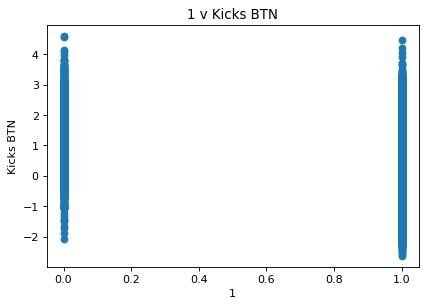

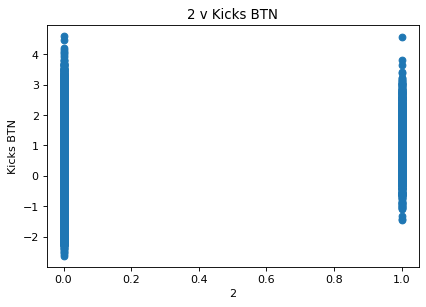

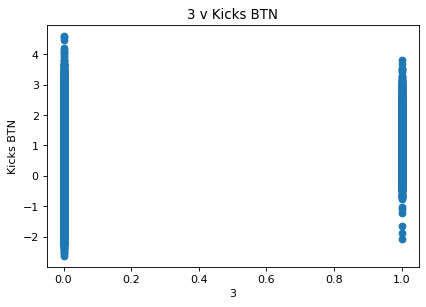

Feature-Label Data IDE on column 'Kicks OTN'


1    0.313099
2    0.153891
3    0.170784
Name: Kicks OTN, dtype: float64

1    0.037616
2    0.016947
3    0.017363
Name: Kicks OTN, dtype: float64

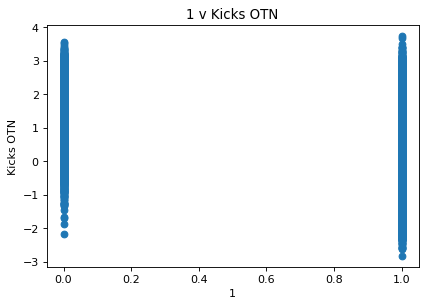

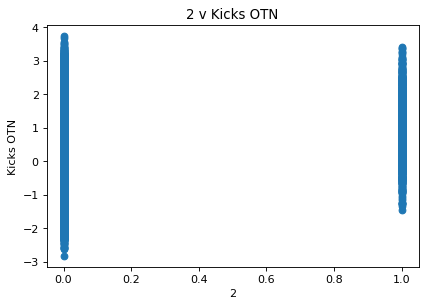

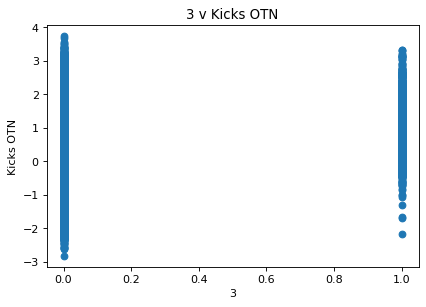

Feature-Label Data IDE on column 'Handballs BTN'


1    0.298583
2    0.133456
3    0.165926
Name: Handballs BTN, dtype: float64

1    0.033276
2    0.015741
3    0.015989
Name: Handballs BTN, dtype: float64

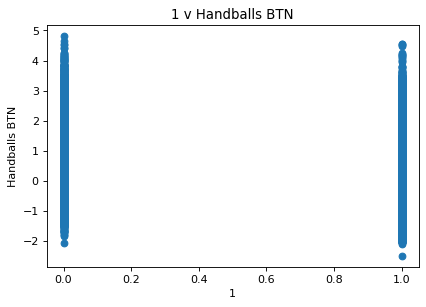

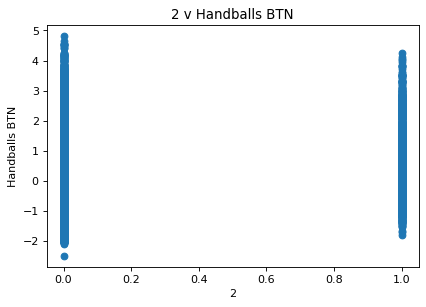

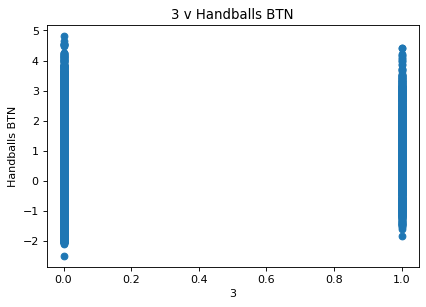

Feature-Label Data IDE on column 'Handballs OTN'


1    0.280126
2    0.125212
3    0.155143
Name: Handballs OTN, dtype: float64

1    0.037349
2    0.017097
3    0.017323
Name: Handballs OTN, dtype: float64

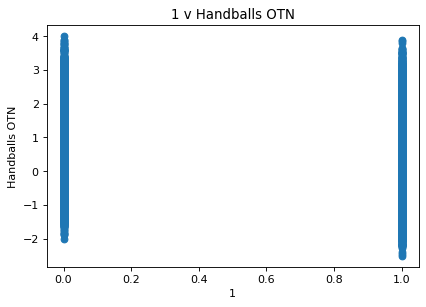

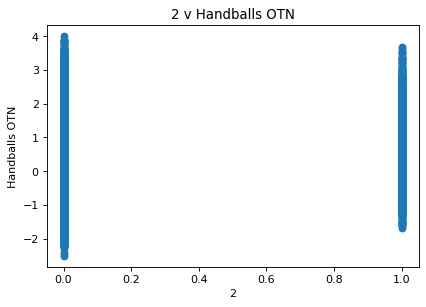

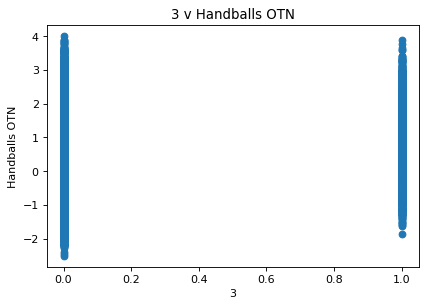

Feature-Label Data IDE on column 'Disposals BTN'


1    0.396278
2    0.185983
3    0.218210
Name: Disposals BTN, dtype: float64

1    0.039247
2    0.017162
3    0.017986
Name: Disposals BTN, dtype: float64

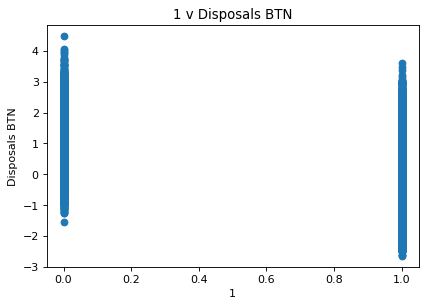

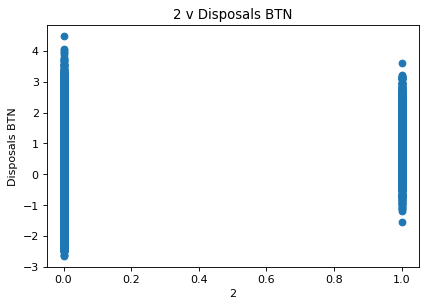

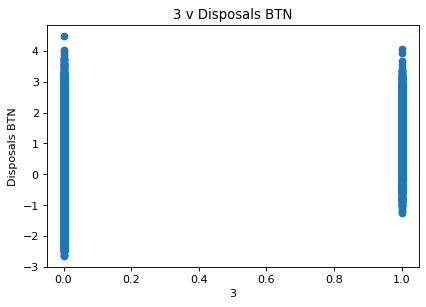

Feature-Label Data IDE on column 'Disposals OTN'


1    0.371130
2    0.174287
3    0.204496
Name: Disposals OTN, dtype: float64

1    0.041658
2    0.018322
3    0.018743
Name: Disposals OTN, dtype: float64

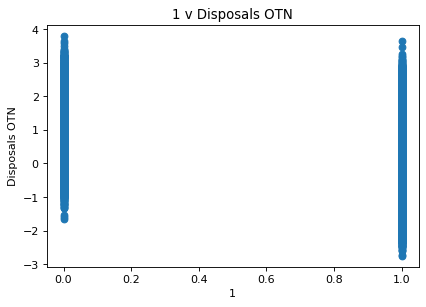

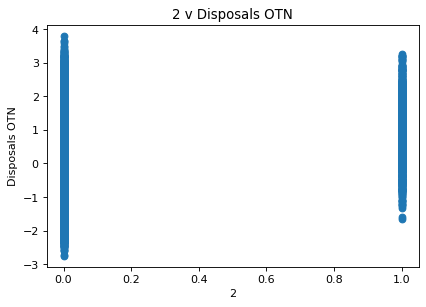

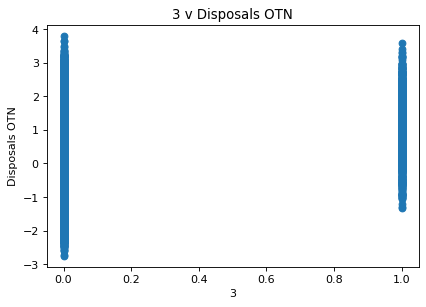

Feature-Label Data IDE on column 'Marks BTN'


1    0.174072
2    0.088506
3    0.096399
Name: Marks BTN, dtype: float64

1    0.022699
2    0.012247
3    0.012513
Name: Marks BTN, dtype: float64

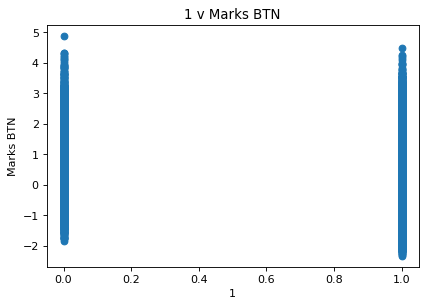

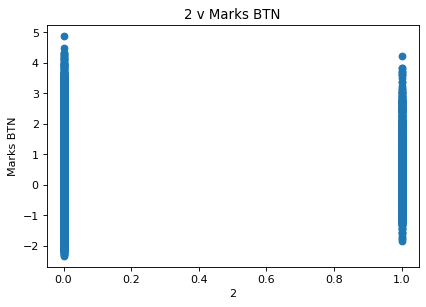

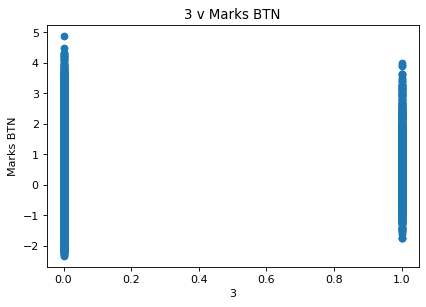

Feature-Label Data IDE on column 'Marks OTN'


1    0.149247
2    0.076678
3    0.083976
Name: Marks OTN, dtype: float64

1    0.026570
2    0.013511
3    0.013685
Name: Marks OTN, dtype: float64

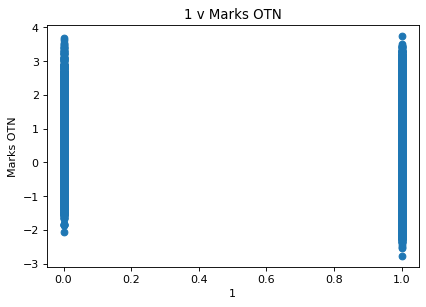

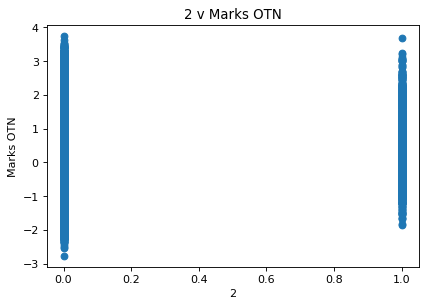

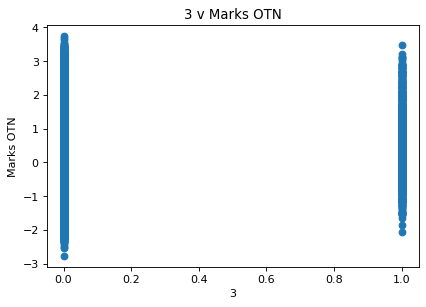

Feature-Label Data IDE on column 'Goals BTN'


1    0.252214
2    0.111594
3    0.135655
Name: Goals BTN, dtype: float64

1    0.015510
2    0.008033
3    0.008732
Name: Goals BTN, dtype: float64

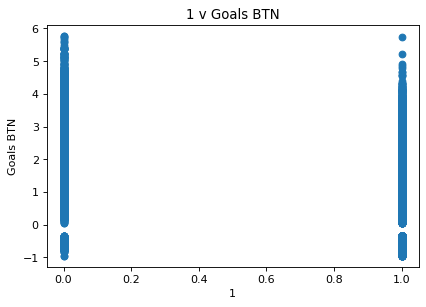

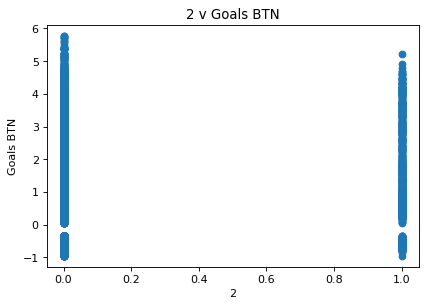

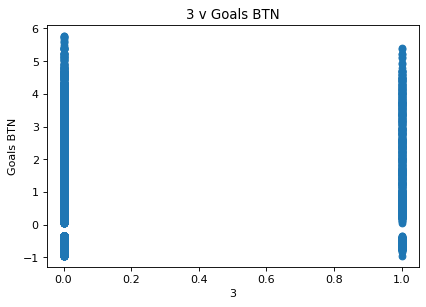

Feature-Label Data IDE on column 'Goals OTN'


1    0.203207
2    0.091782
3    0.108862
Name: Goals OTN, dtype: float64

1    0.015673
2    0.007572
3    0.008287
Name: Goals OTN, dtype: float64

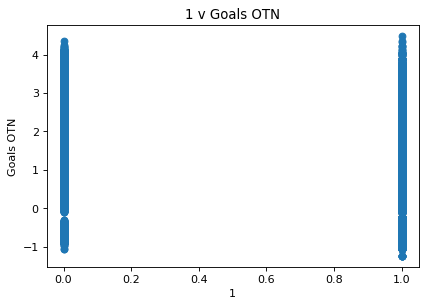

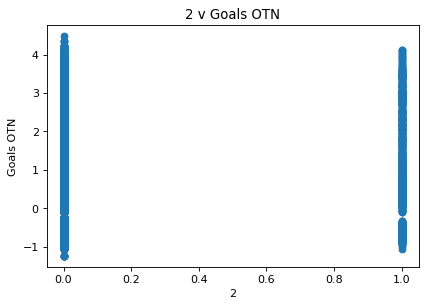

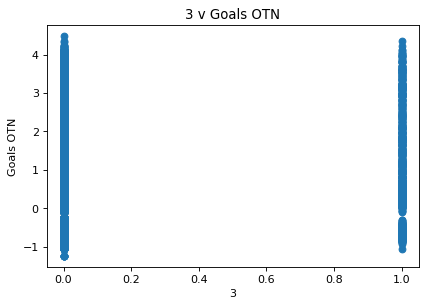

Feature-Label Data IDE on column 'Behinds BTN'


1    0.092490
2    0.040504
3    0.042699
Name: Behinds BTN, dtype: float64

1    0.006522
2    0.004362
3    0.004212
Name: Behinds BTN, dtype: float64

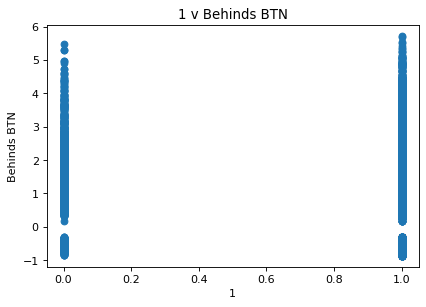

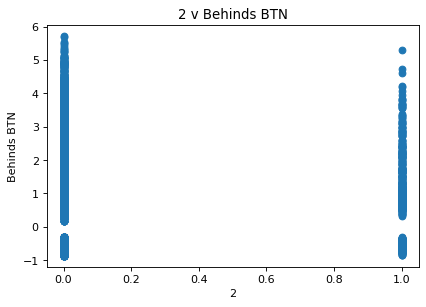

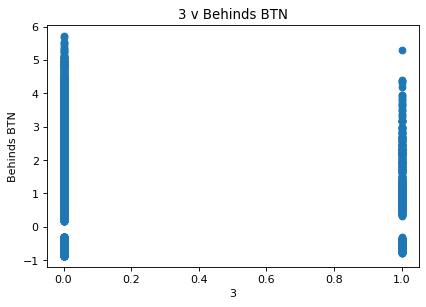

Feature-Label Data IDE on column 'Behinds OTN'


1    0.080089
2    0.033932
3    0.037937
Name: Behinds OTN, dtype: float64

1    0.006268
2    0.003674
3    0.003517
Name: Behinds OTN, dtype: float64

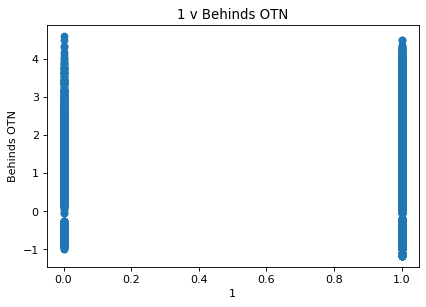

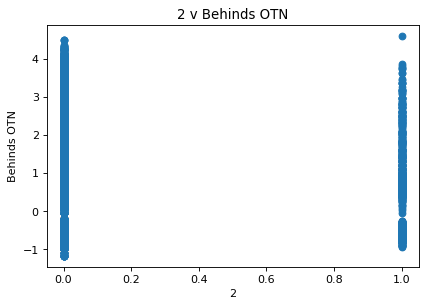

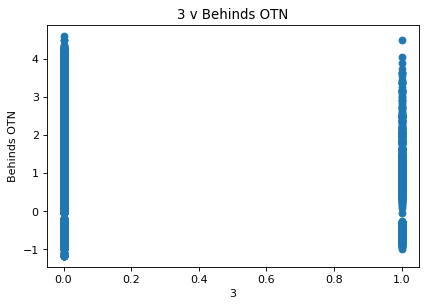

Feature-Label Data IDE on column 'Tackles BTN'


1    0.162299
2    0.080127
3    0.092419
Name: Tackles BTN, dtype: float64

1    0.021854
2    0.011928
3    0.012185
Name: Tackles BTN, dtype: float64

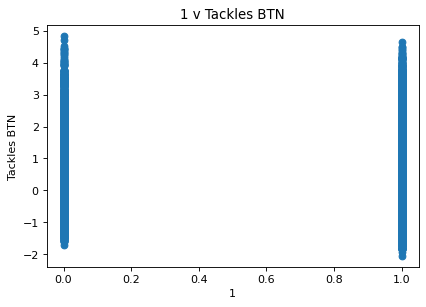

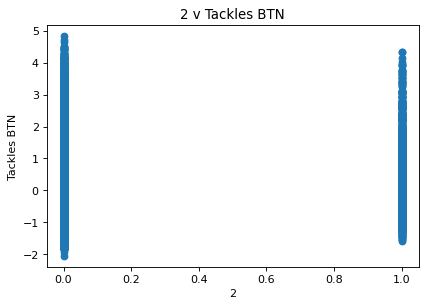

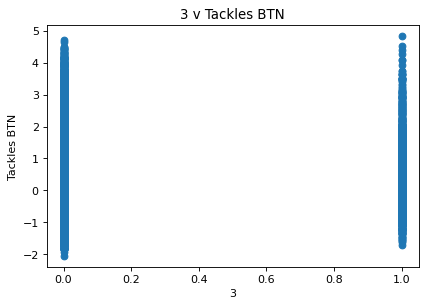

Feature-Label Data IDE on column 'Tackles OTN'


1    0.154734
2    0.075553
3    0.090373
Name: Tackles OTN, dtype: float64

1    0.025720
2    0.013090
3    0.013518
Name: Tackles OTN, dtype: float64

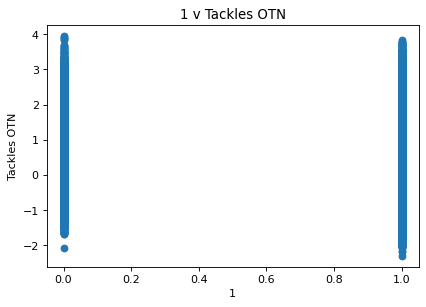

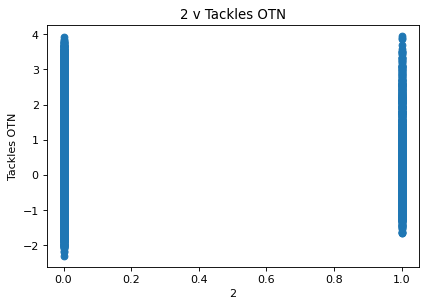

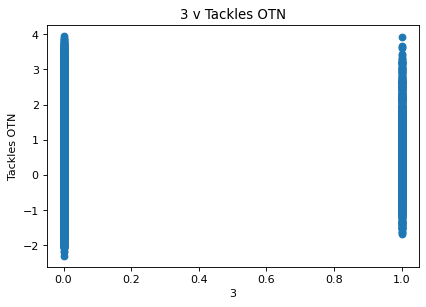

Feature-Label Data IDE on column 'Hitouts BTN'


1    0.023268
2    0.005767
3    0.025567
Name: Hitouts BTN, dtype: float64

1    0.008609
2    0.004209
3    0.004918
Name: Hitouts BTN, dtype: float64

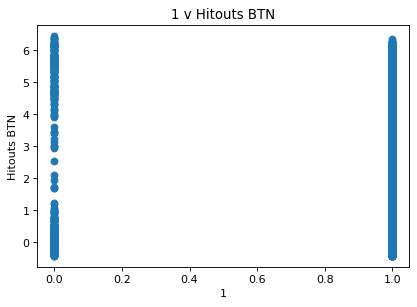

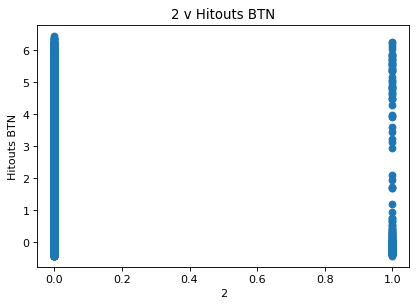

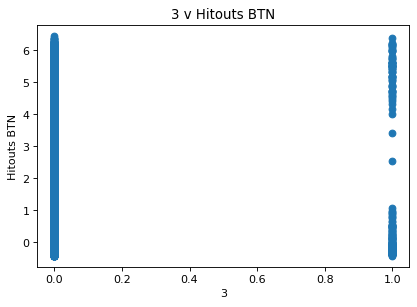

Feature-Label Data IDE on column 'Hitouts OTN'


1    0.009455
2    0.000588
3    0.015347
Name: Hitouts OTN, dtype: float64

1    0.012268
2    0.006407
3    0.006962
Name: Hitouts OTN, dtype: float64

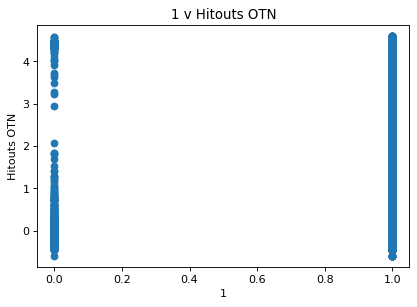

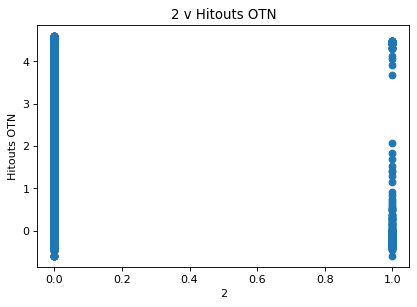

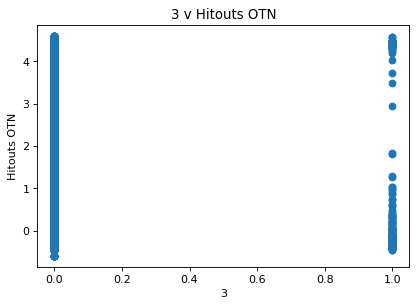

Feature-Label Data IDE on column 'Goal Assists BTN'


1    0.126154
2    0.051486
3    0.065574
Name: Goal Assists BTN, dtype: float64

1    0.006651
2    0.003906
3    0.004433
Name: Goal Assists BTN, dtype: float64

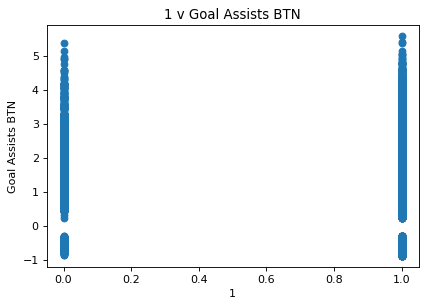

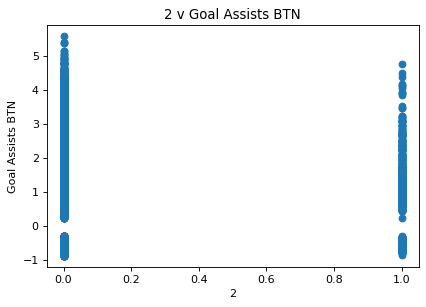

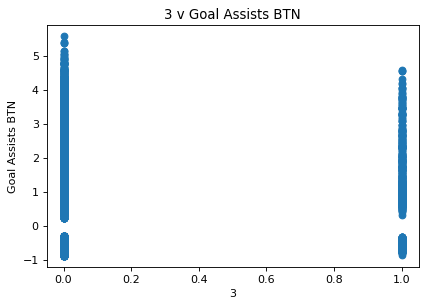

Feature-Label Data IDE on column 'Goal Assists OTN'


1    0.089960
2    0.036658
3    0.044598
Name: Goal Assists OTN, dtype: float64

1    0.007664
2    0.003641
3    0.004016
Name: Goal Assists OTN, dtype: float64

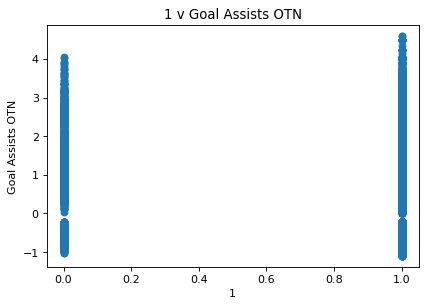

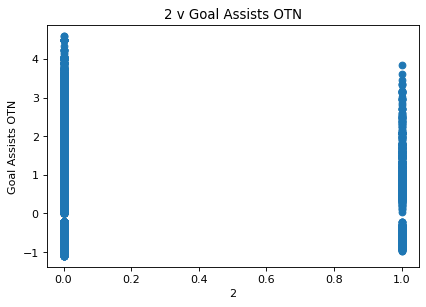

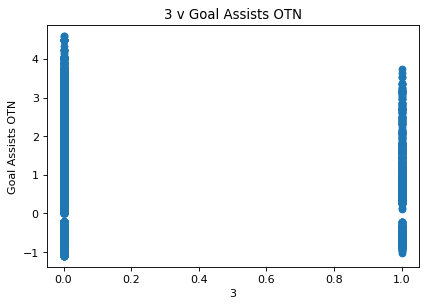

Feature-Label Data IDE on column 'Inside 50s BTN'


1    0.258402
2    0.118234
3    0.143081
Name: Inside 50s BTN, dtype: float64

1    0.023557
2    0.011882
3    0.012701
Name: Inside 50s BTN, dtype: float64

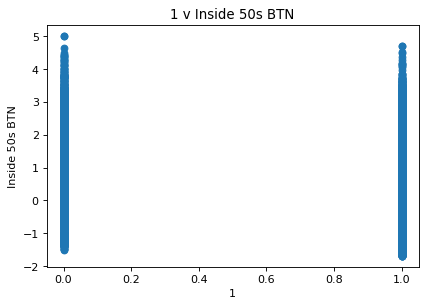

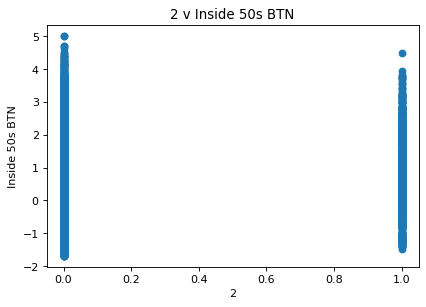

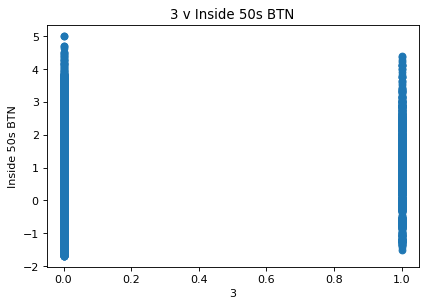

Feature-Label Data IDE on column 'Inside 50s OTN'


1    0.232772
2    0.106669
3    0.130023
Name: Inside 50s OTN, dtype: float64

1    0.025837
2    0.012570
3    0.013310
Name: Inside 50s OTN, dtype: float64

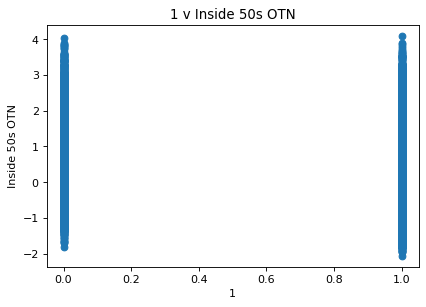

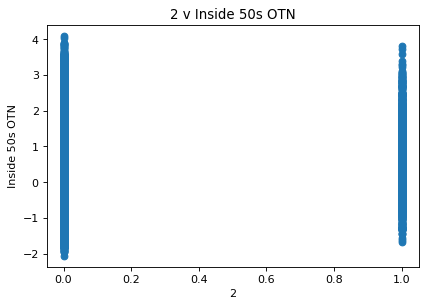

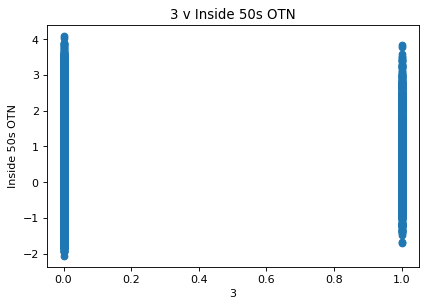

Feature-Label Data IDE on column 'Clearances BTN'


1    0.319443
2    0.137110
3    0.178801
Name: Clearances BTN, dtype: float64

1    0.027941
2    0.013122
3    0.014519
Name: Clearances BTN, dtype: float64

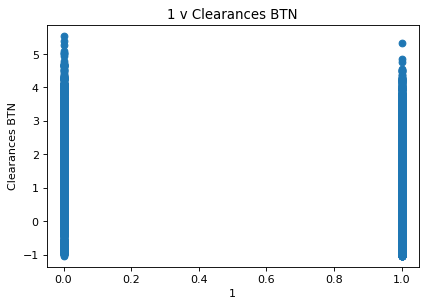

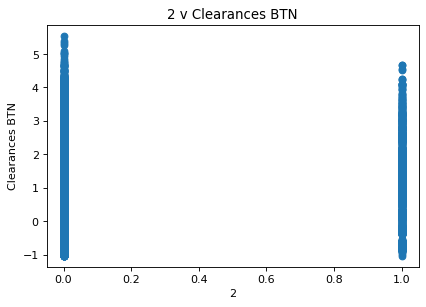

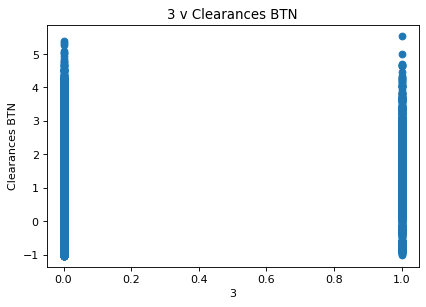

Feature-Label Data IDE on column 'Clearances OTN'


1    0.302409
2    0.130491
3    0.171490
Name: Clearances OTN, dtype: float64

1    0.030336
2    0.014069
3    0.015135
Name: Clearances OTN, dtype: float64

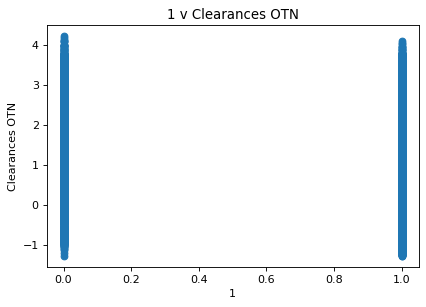

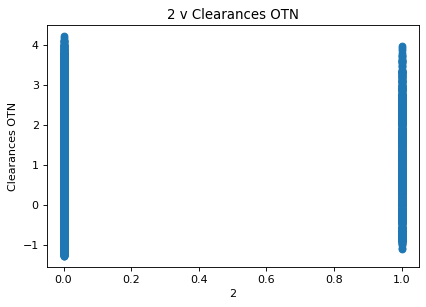

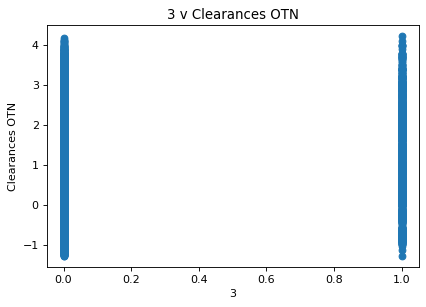

Feature-Label Data IDE on column 'Clangers BTN'


1    0.131087
2    0.066300
3    0.070960
Name: Clangers BTN, dtype: float64

1    0.017515
2    0.010311
3    0.010417
Name: Clangers BTN, dtype: float64

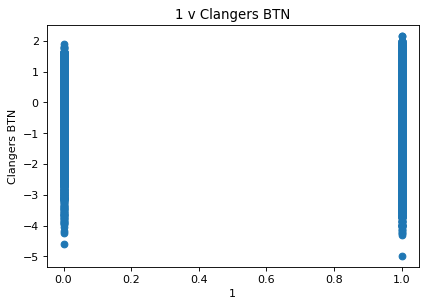

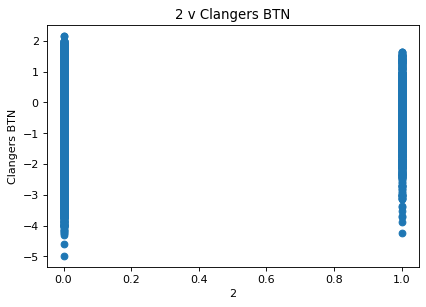

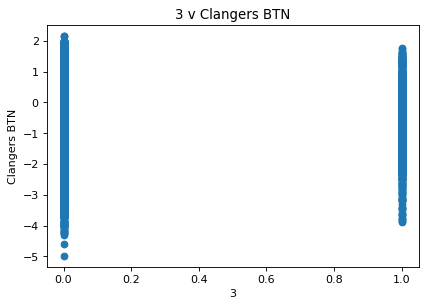

Feature-Label Data IDE on column 'Clangers OTN'


1    0.139020
2    0.070941
3    0.074671
Name: Clangers OTN, dtype: float64

1    0.019477
2    0.010676
3    0.010856
Name: Clangers OTN, dtype: float64

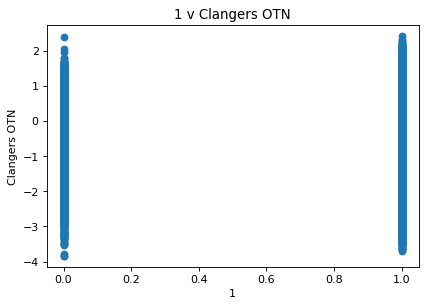

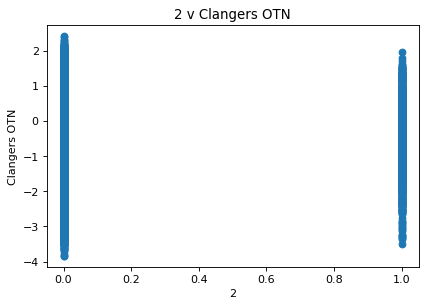

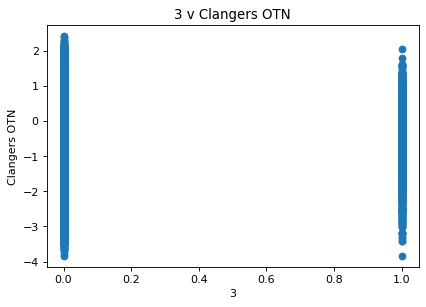

Feature-Label Data IDE on column 'Rebound 50s BTN'


1    0.033622
2    0.024249
3    0.018376
Name: Rebound 50s BTN, dtype: float64

1    0.014104
2    0.009156
3    0.009077
Name: Rebound 50s BTN, dtype: float64

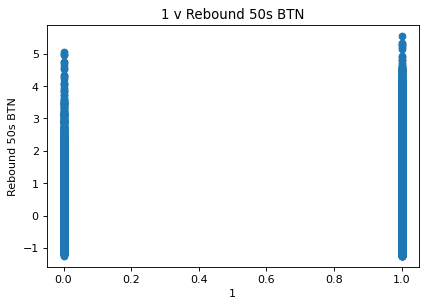

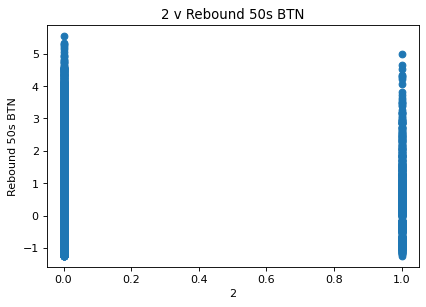

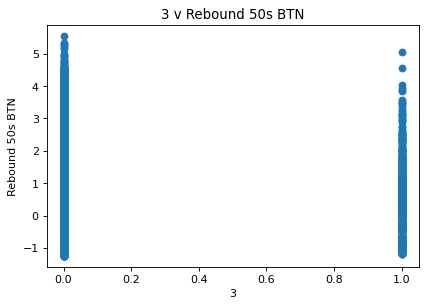

Feature-Label Data IDE on column 'Rebound 50s OTN'


1    0.039484
2    0.027057
3    0.021119
Name: Rebound 50s OTN, dtype: float64

1    0.016943
2    0.009916
3    0.009752
Name: Rebound 50s OTN, dtype: float64

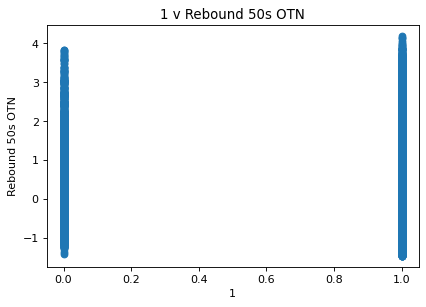

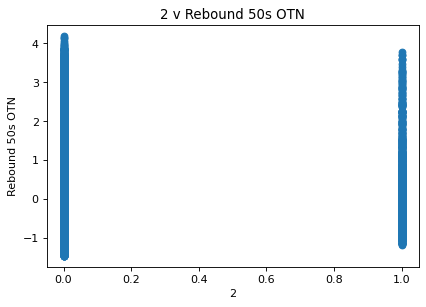

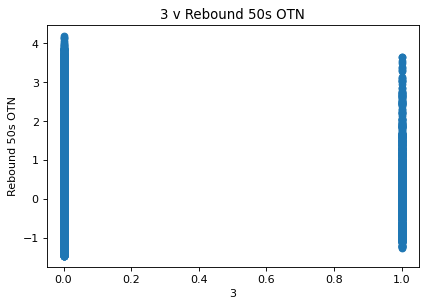

Feature-Label Data IDE on column 'Frees For BTN'


1    0.157334
2    0.068427
3    0.091134
Name: Frees For BTN, dtype: float64

1    0.011468
2    0.006937
3    0.007592
Name: Frees For BTN, dtype: float64

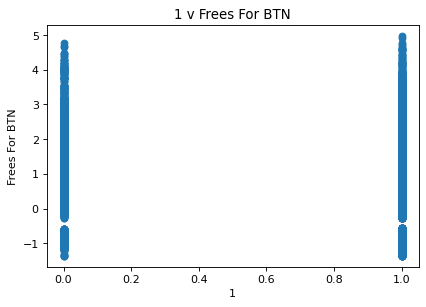

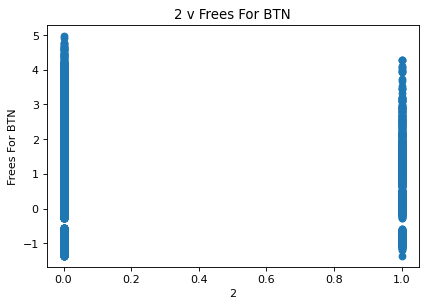

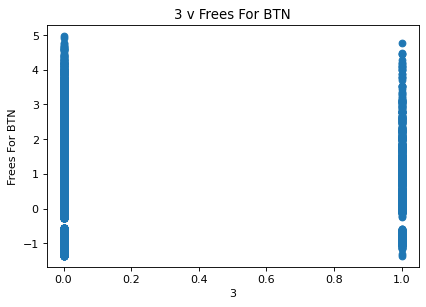

Feature-Label Data IDE on column 'Frees For OTN'


1    0.151322
2    0.065820
3    0.088026
Name: Frees For OTN, dtype: float64

1    0.011397
2    0.006285
3    0.006703
Name: Frees For OTN, dtype: float64

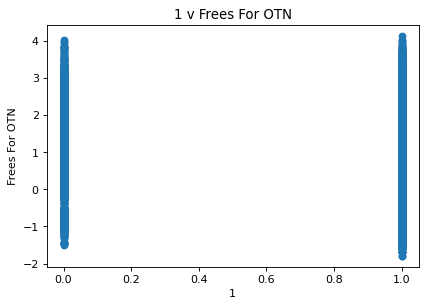

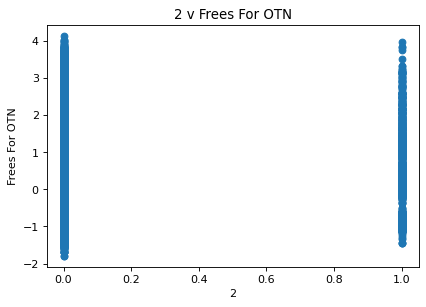

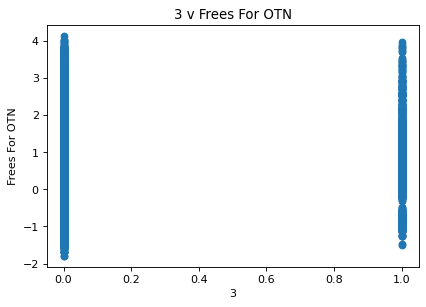

Feature-Label Data IDE on column 'Frees Agains BTN'


1    0.038810
2    0.015589
3    0.026122
Name: Frees Agains BTN, dtype: float64

1    0.007528
2    0.005582
3    0.005900
Name: Frees Agains BTN, dtype: float64

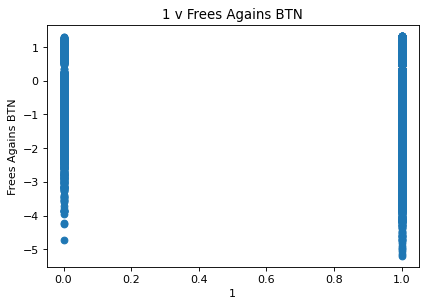

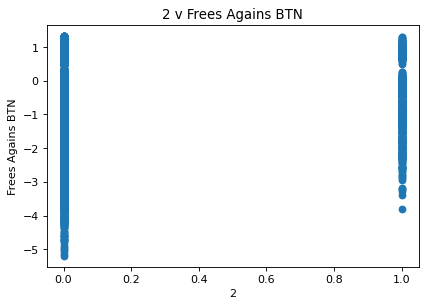

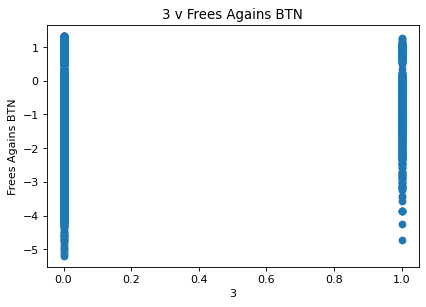

Feature-Label Data IDE on column 'Frees Agains OTN'


1    0.045960
2    0.020527
3    0.029342
Name: Frees Agains OTN, dtype: float64

1    0.007776
2    0.005072
3    0.005388
Name: Frees Agains OTN, dtype: float64

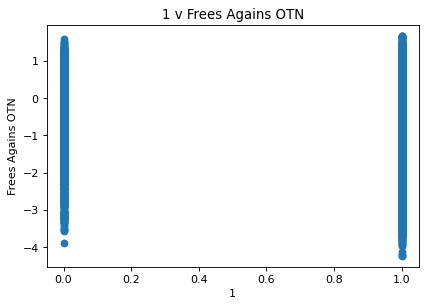

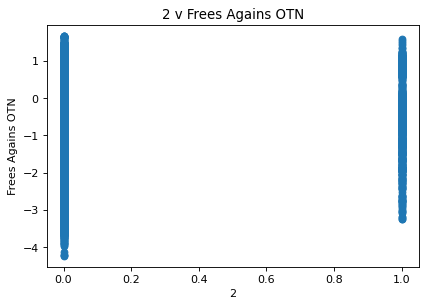

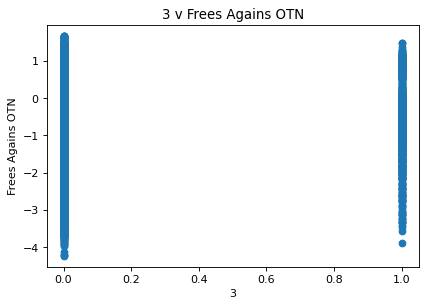

Feature-Label Data IDE on column 'Contested Possessions BTN'


1    0.362935
2    0.160699
3    0.199359
Name: Contested Possessions BTN, dtype: float64

1    0.033665
2    0.015312
3    0.016198
Name: Contested Possessions BTN, dtype: float64

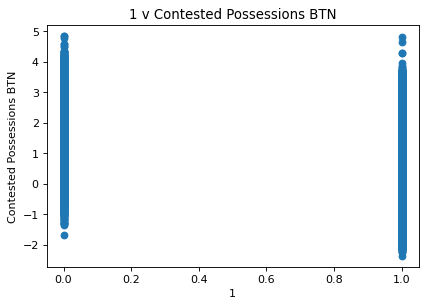

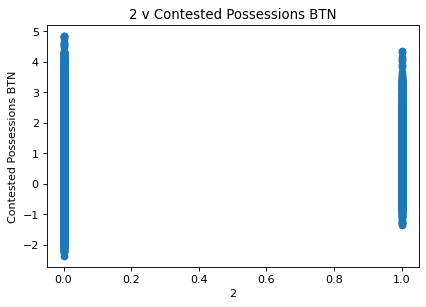

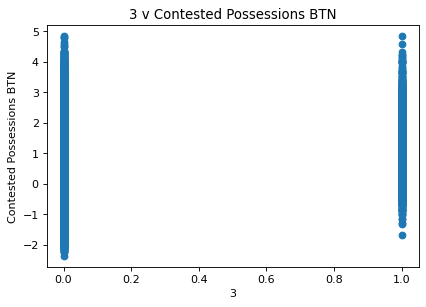

Feature-Label Data IDE on column 'Contested Possessions OTN'


1    0.341696
2    0.152977
3    0.187358
Name: Contested Possessions OTN, dtype: float64

1    0.037175
2    0.016715
3    0.017303
Name: Contested Possessions OTN, dtype: float64

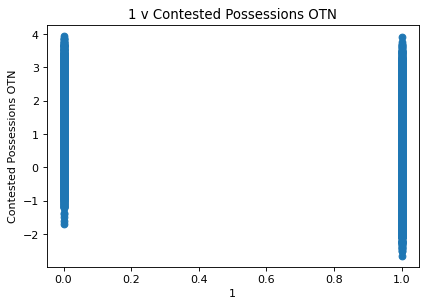

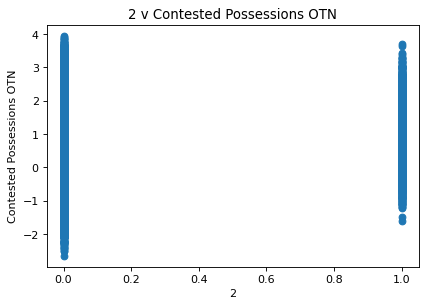

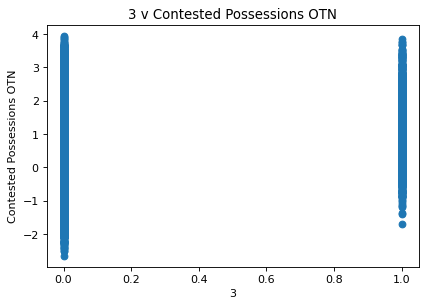

Feature-Label Data IDE on column 'Uncontested Possessions BTN'


1    0.283543
2    0.139648
3    0.155914
Name: Uncontested Possessions BTN, dtype: float64

1    0.033444
2    0.015784
3    0.016038
Name: Uncontested Possessions BTN, dtype: float64

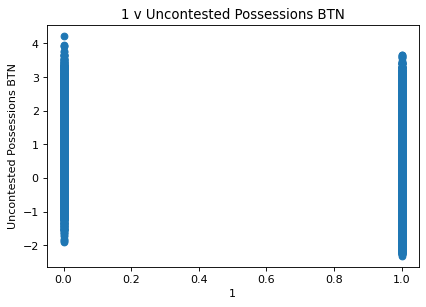

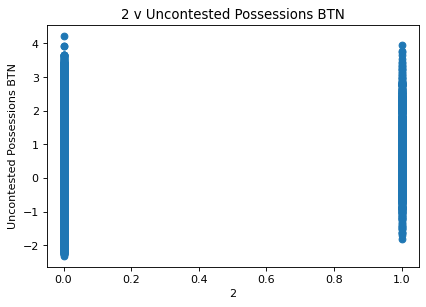

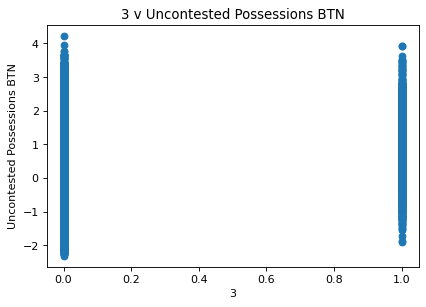

Feature-Label Data IDE on column 'Uncontested Possessions OTN'


1    0.258477
2    0.125834
3    0.143621
Name: Uncontested Possessions OTN, dtype: float64

1    0.037664
2    0.017183
3    0.017439
Name: Uncontested Possessions OTN, dtype: float64

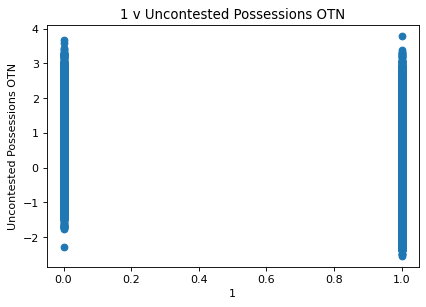

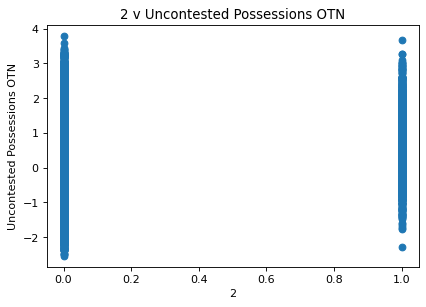

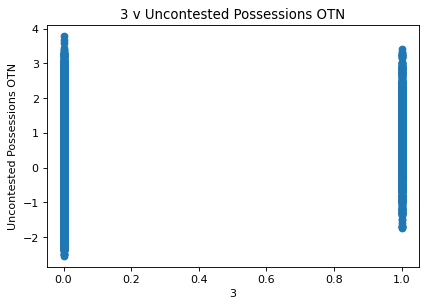

Feature-Label Data IDE on column 'Effective Disposals BTN'


1    0.360013
2    0.169276
3    0.199533
Name: Effective Disposals BTN, dtype: float64

1    0.036229
2    0.016513
3    0.016900
Name: Effective Disposals BTN, dtype: float64

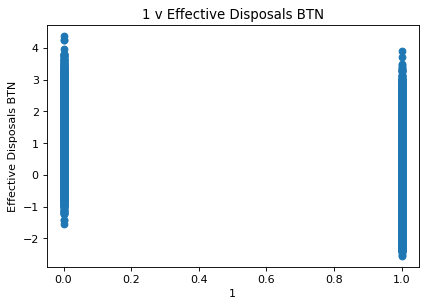

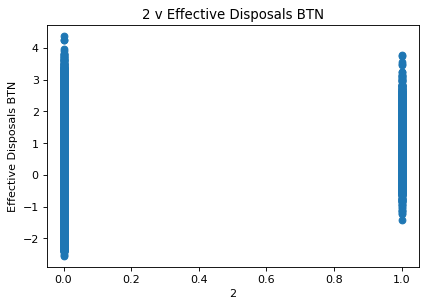

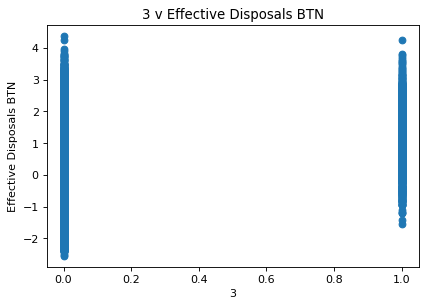

Feature-Label Data IDE on column 'Effective Disposals OTN'


1    0.330845
2    0.154960
3    0.184529
Name: Effective Disposals OTN, dtype: float64

1    0.039382
2    0.017680
3    0.017990
Name: Effective Disposals OTN, dtype: float64

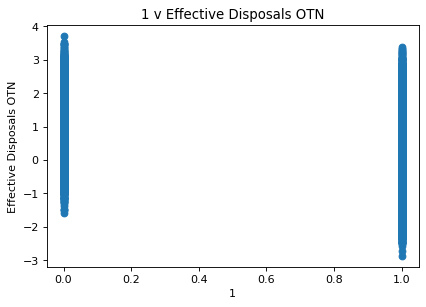

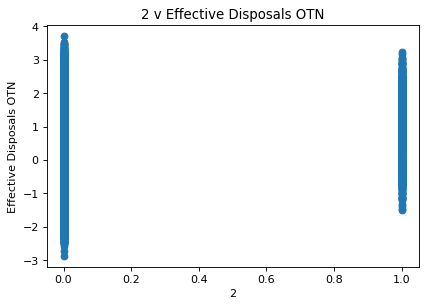

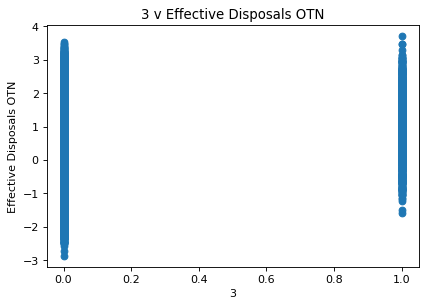

Feature-Label Data IDE on column 'Contested Marks BTN'


1    0.092642
2    0.038051
3    0.052222
Name: Contested Marks BTN, dtype: float64

1    0.008475
2    0.005174
3    0.005891
Name: Contested Marks BTN, dtype: float64

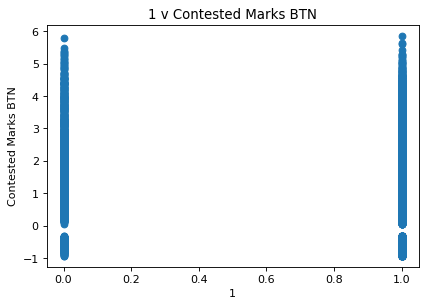

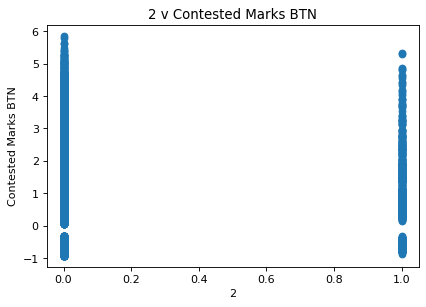

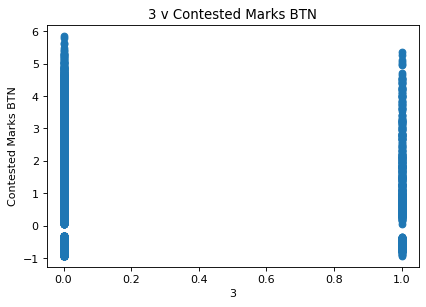

Feature-Label Data IDE on column 'Contested Marks OTN'


1    0.075570
2    0.031991
3    0.039710
Name: Contested Marks OTN, dtype: float64

1    0.008274
2    0.004759
3    0.005093
Name: Contested Marks OTN, dtype: float64

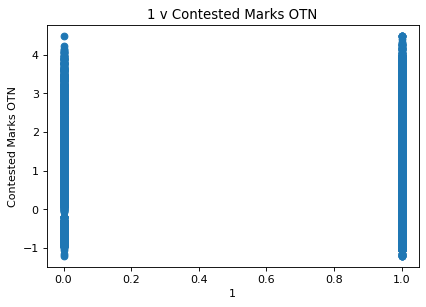

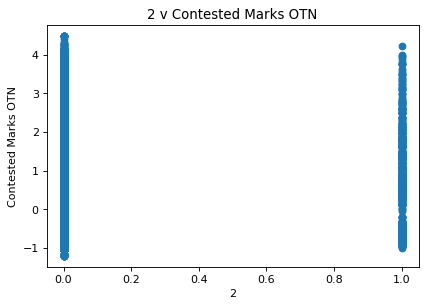

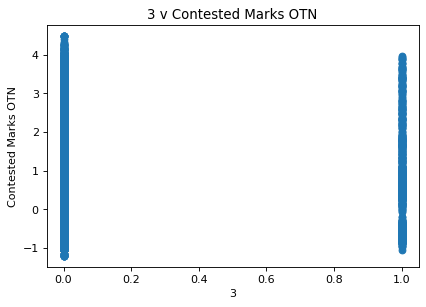

Feature-Label Data IDE on column 'Marks Inside 50 BTN'


1    0.146358
2    0.062296
3    0.076482
Name: Marks Inside 50 BTN, dtype: float64

1    0.011184
2    0.006467
3    0.006818
Name: Marks Inside 50 BTN, dtype: float64

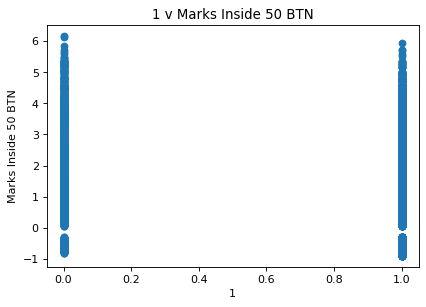

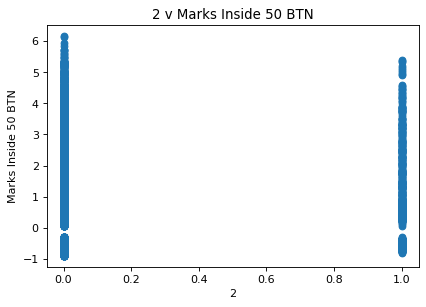

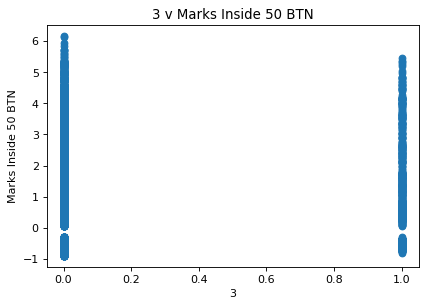

Feature-Label Data IDE on column 'Marks Inside 50 OTN'


1    0.116207
2    0.051110
3    0.060954
Name: Marks Inside 50 OTN, dtype: float64

1    0.011112
2    0.005906
3    0.006372
Name: Marks Inside 50 OTN, dtype: float64

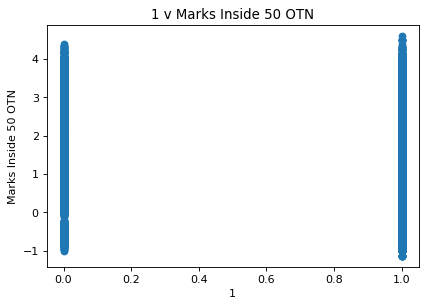

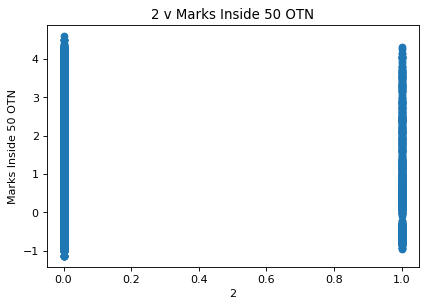

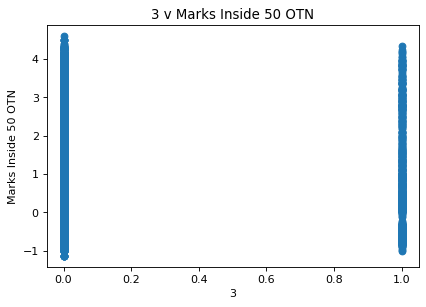

Feature-Label Data IDE on column 'One Percenters BTN'


1    0.052739
2    0.023453
3    0.030498
Name: One Percenters BTN, dtype: float64

1    0.014026
2    0.008895
3    0.008791
Name: One Percenters BTN, dtype: float64

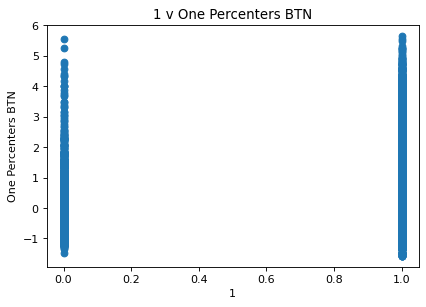

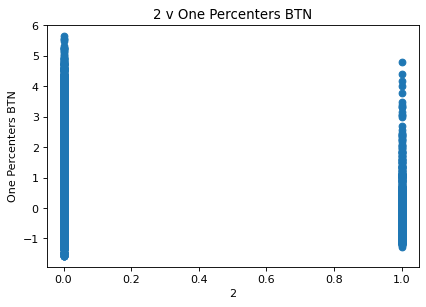

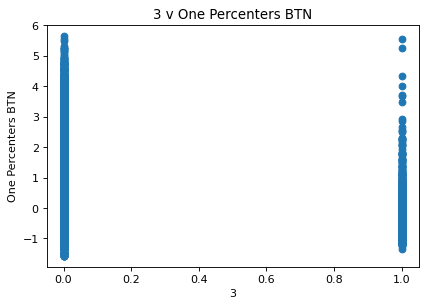

Feature-Label Data IDE on column 'One Percenters OTN'


1    0.055444
2    0.023938
3    0.031822
Name: One Percenters OTN, dtype: float64

1    0.018575
2    0.010329
3    0.010447
Name: One Percenters OTN, dtype: float64

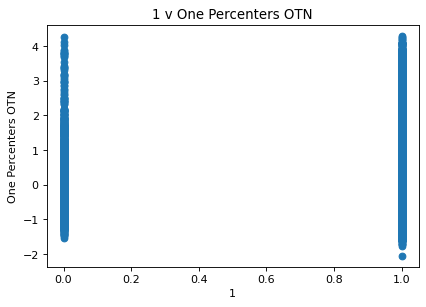

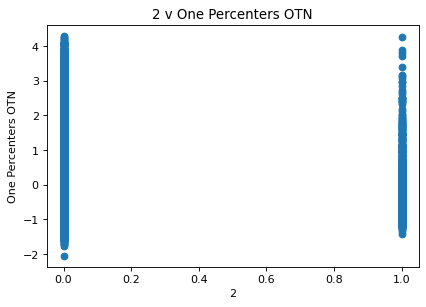

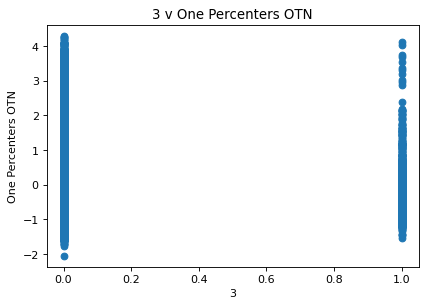

Feature-Label Data IDE on column 'Bounces BTN'


1    0.073540
2    0.038586
3    0.031817
Name: Bounces BTN, dtype: float64

1    0.006759
2    0.004322
3    0.004108
Name: Bounces BTN, dtype: float64

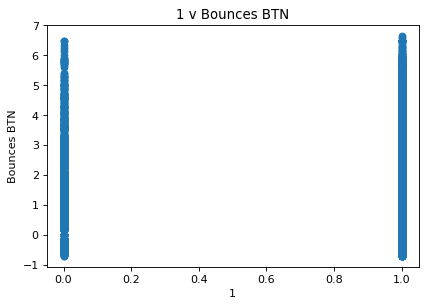

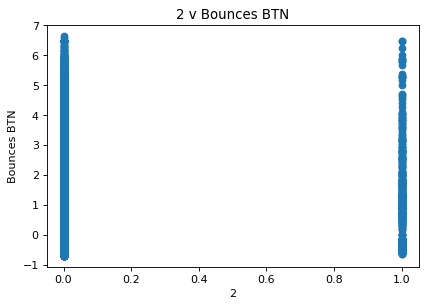

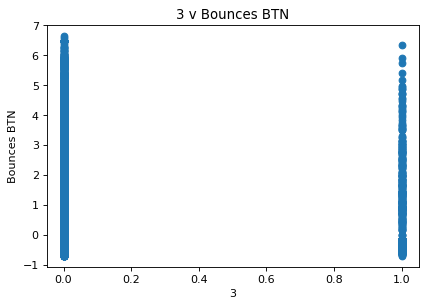

Feature-Label Data IDE on column 'Bounces OTN'


1    0.065788
2    0.035131
3    0.028350
Name: Bounces OTN, dtype: float64

1    0.007418
2    0.004556
3    0.004121
Name: Bounces OTN, dtype: float64

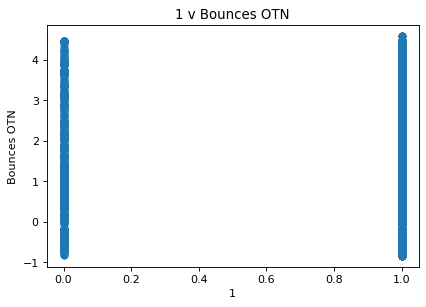

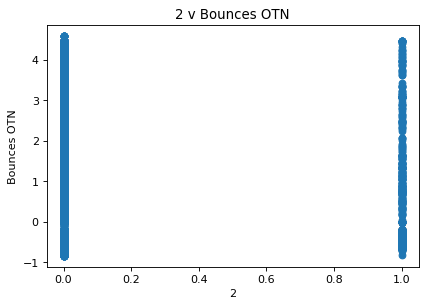

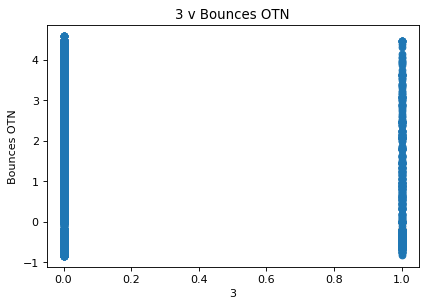

Feature-Label Data IDE on column 'Centre Clearances BTN'


1    0.268289
2    0.117574
3    0.141528
Name: Centre Clearances BTN, dtype: float64

1    0.017261
2    0.008559
3    0.009596
Name: Centre Clearances BTN, dtype: float64

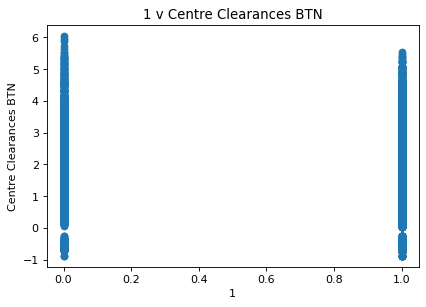

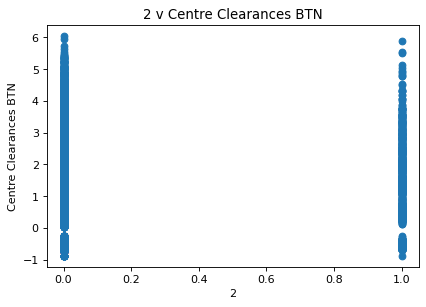

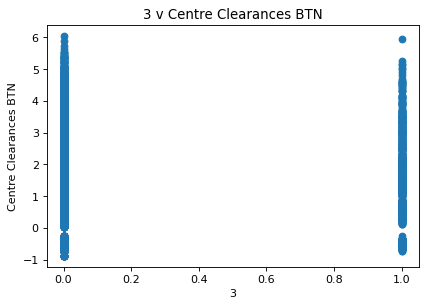

Feature-Label Data IDE on column 'Centre Clearances OTN'


1    0.256951
2    0.113819
3    0.137701
Name: Centre Clearances OTN, dtype: float64

1    0.016324
2    0.007478
3    0.008330
Name: Centre Clearances OTN, dtype: float64

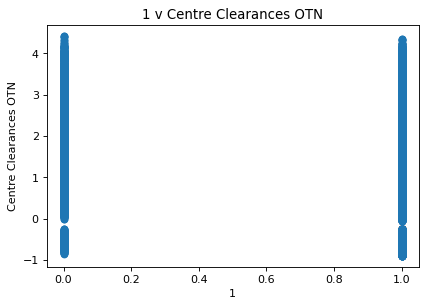

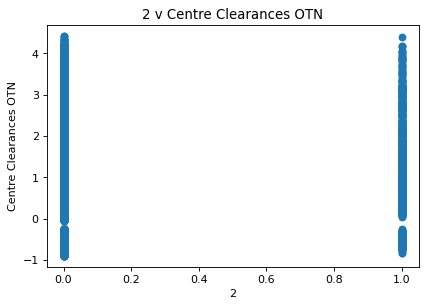

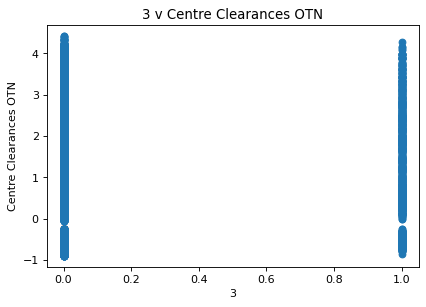

Feature-Label Data IDE on column 'Stoppage Clearances BTN'


1    0.279158
2    0.117109
3    0.162991
Name: Stoppage Clearances BTN, dtype: float64

1    0.022532
2    0.011031
3    0.012632
Name: Stoppage Clearances BTN, dtype: float64

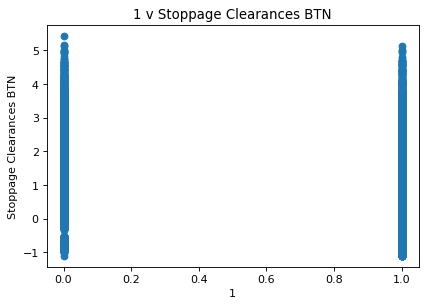

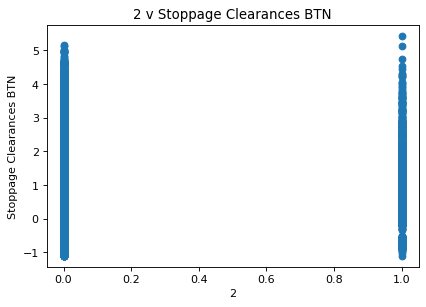

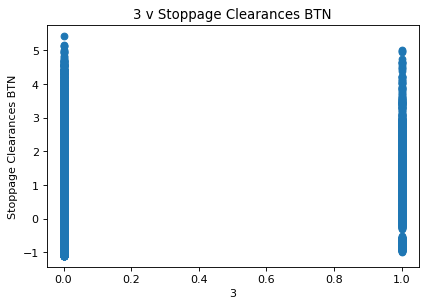

Feature-Label Data IDE on column 'Stoppage Clearances OTN'


1    0.266166
2    0.111972
3    0.157661
Name: Stoppage Clearances OTN, dtype: float64

1    0.022988
2    0.010965
3    0.012454
Name: Stoppage Clearances OTN, dtype: float64

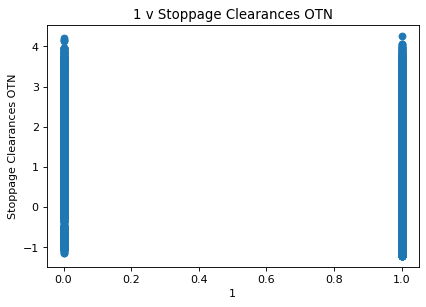

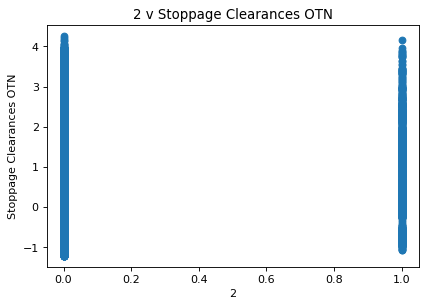

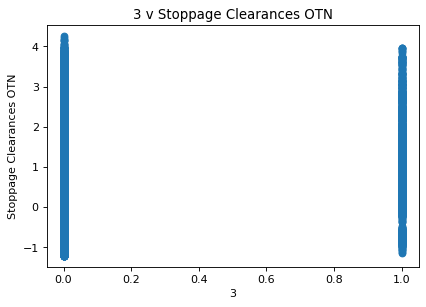

Feature-Label Data IDE on column 'Score Involvements BTN'


1    0.353299
2    0.158034
3    0.189634
Name: Score Involvements BTN, dtype: float64

1    0.030590
2    0.013796
3    0.014473
Name: Score Involvements BTN, dtype: float64

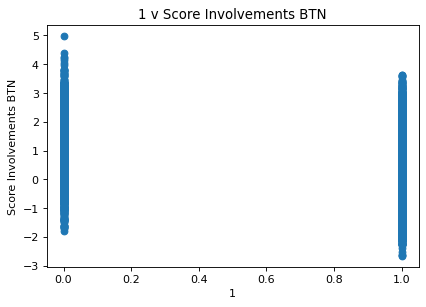

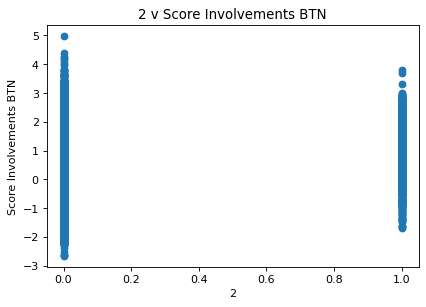

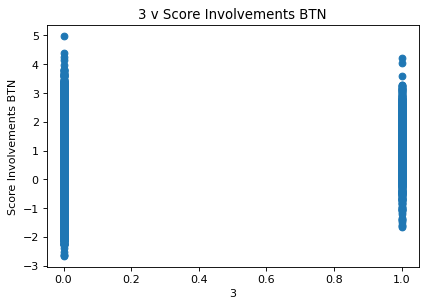

Feature-Label Data IDE on column 'Score Involvements OTN'


1    0.301764
2    0.135357
3    0.163856
Name: Score Involvements OTN, dtype: float64

1    0.031882
2    0.014454
3    0.015100
Name: Score Involvements OTN, dtype: float64

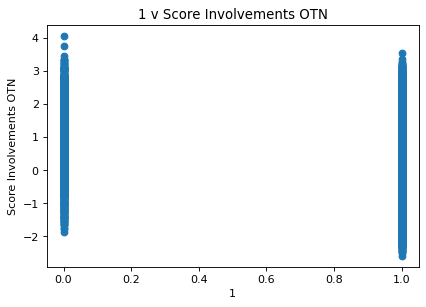

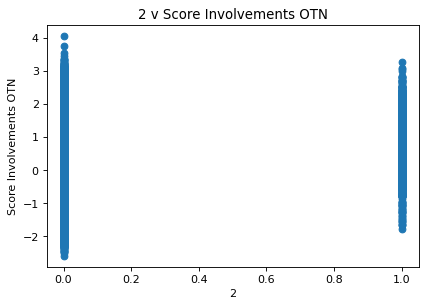

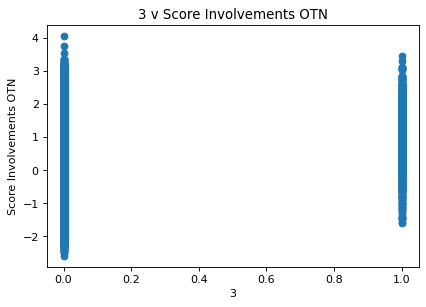

Feature-Label Data IDE on column 'Metres Gained BTN'


1    0.293260
2    0.138617
3    0.163052
Name: Metres Gained BTN, dtype: float64

1    0.044894
2    0.019854
3    0.019917
Name: Metres Gained BTN, dtype: float64

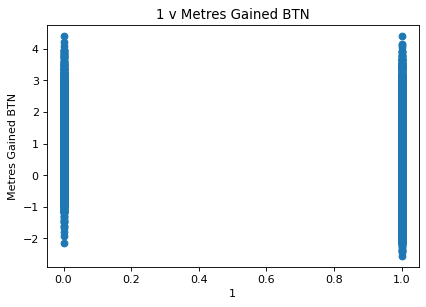

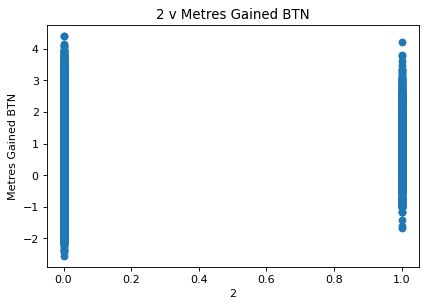

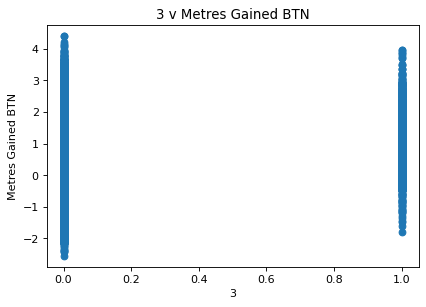

Feature-Label Data IDE on column 'Metres Gained OTN'


1    0.273119
2    0.130037
3    0.151565
Name: Metres Gained OTN, dtype: float64

1    0.045289
2    0.019955
3    0.020027
Name: Metres Gained OTN, dtype: float64

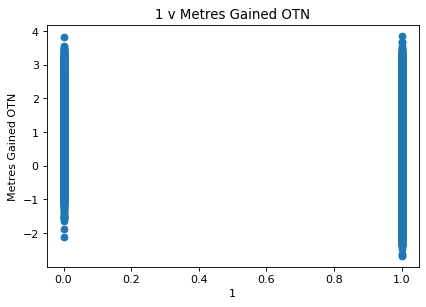

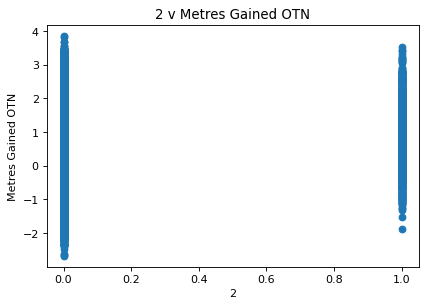

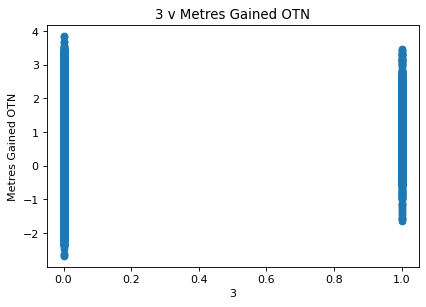

Feature-Label Data IDE on column 'Turnovers BTN'


1    0.180341
2    0.087586
3    0.099998
Name: Turnovers BTN, dtype: float64

1    0.021021
2    0.011420
3    0.011474
Name: Turnovers BTN, dtype: float64

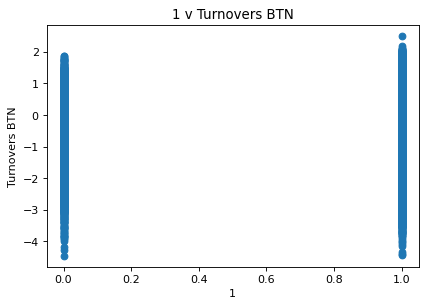

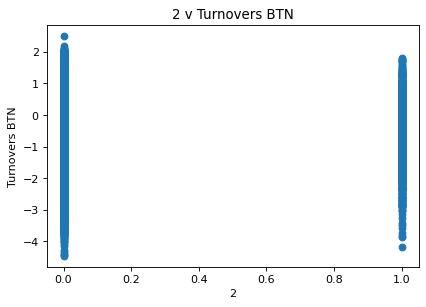

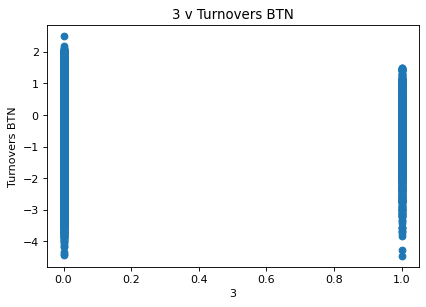

Feature-Label Data IDE on column 'Turnovers OTN'


1    0.189050
2    0.092168
3    0.103165
Name: Turnovers OTN, dtype: float64

1    0.024110
2    0.012469
3    0.012393
Name: Turnovers OTN, dtype: float64

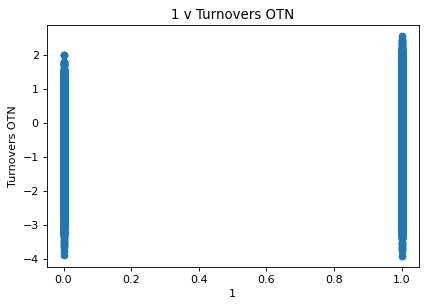

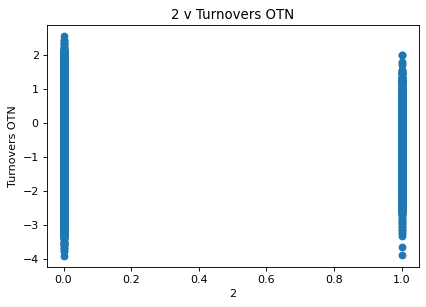

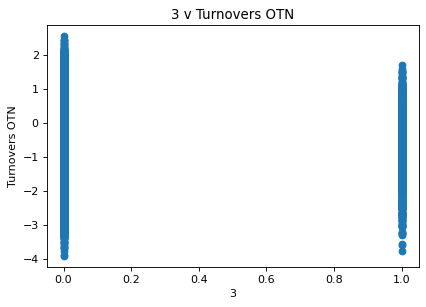

Feature-Label Data IDE on column 'Intercepts BTN'


1    0.052540
2    0.035982
3    0.025973
Name: Intercepts BTN, dtype: float64

1    0.019232
2    0.011308
3    0.011086
Name: Intercepts BTN, dtype: float64

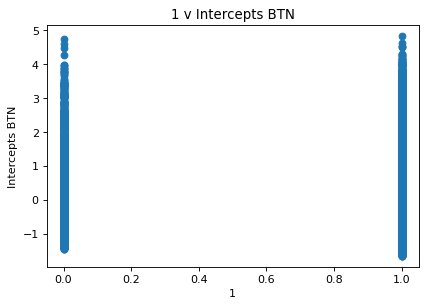

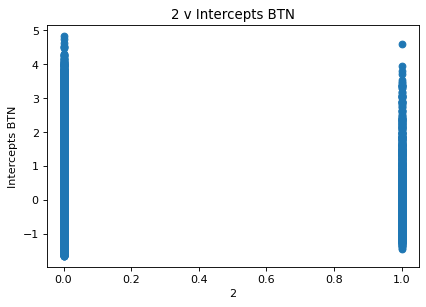

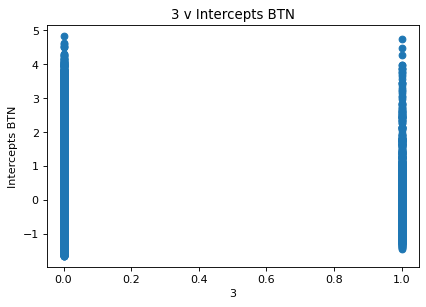

Feature-Label Data IDE on column 'Intercepts OTN'


1    0.045005
2    0.031253
3    0.022235
Name: Intercepts OTN, dtype: float64

1    0.023796
2    0.012693
3    0.012556
Name: Intercepts OTN, dtype: float64

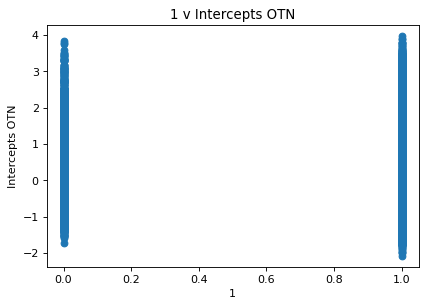

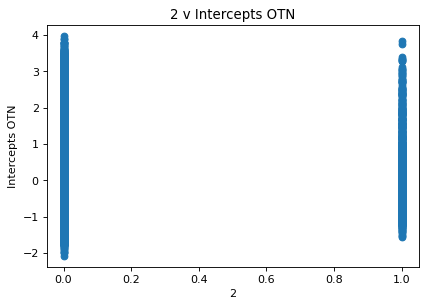

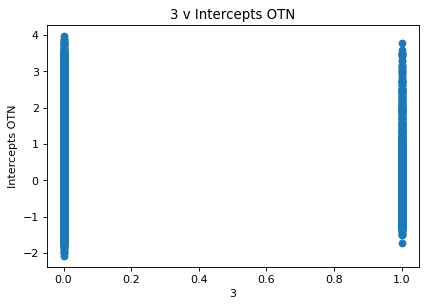

Feature-Label Data IDE on column 'Tackles Inside 50 BTN'


1    0.065264
2    0.033205
3    0.031134
Name: Tackles Inside 50 BTN, dtype: float64

1    0.007075
2    0.005111
3    0.004921
Name: Tackles Inside 50 BTN, dtype: float64

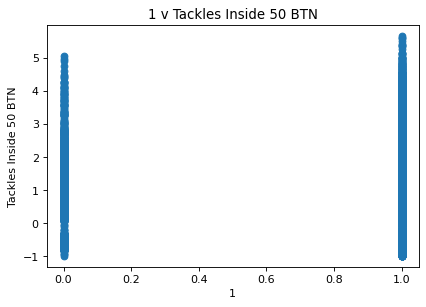

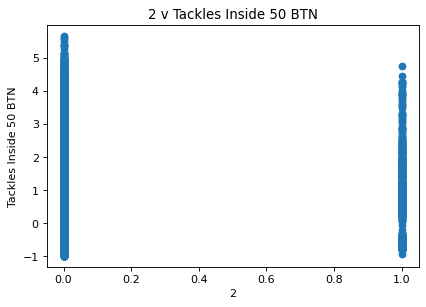

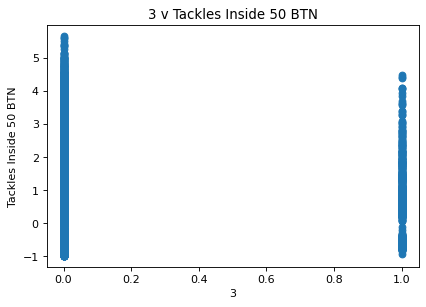

Feature-Label Data IDE on column 'Tackles Inside 50 OTN'


1    0.055249
2    0.026799
3    0.026859
Name: Tackles Inside 50 OTN, dtype: float64

1    0.007079
2    0.004496
3    0.004391
Name: Tackles Inside 50 OTN, dtype: float64

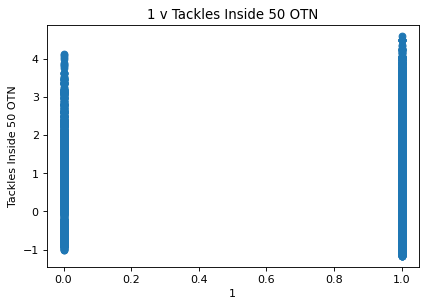

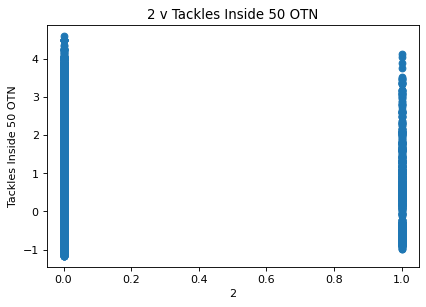

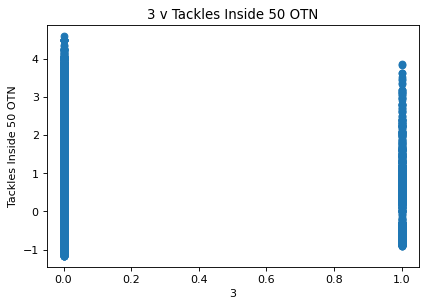

Feature-Label Data IDE on column 'Time On Ground % BTN'


1    0.078563
2    0.040002
3    0.049100
Name: Time On Ground % BTN, dtype: float64

1    0.030032
2    0.014879
3    0.014828
Name: Time On Ground % BTN, dtype: float64

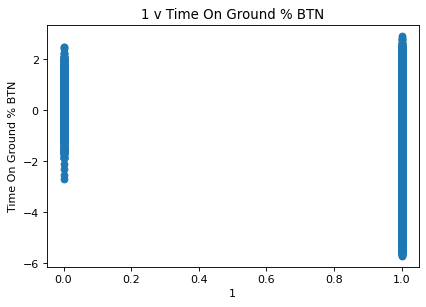

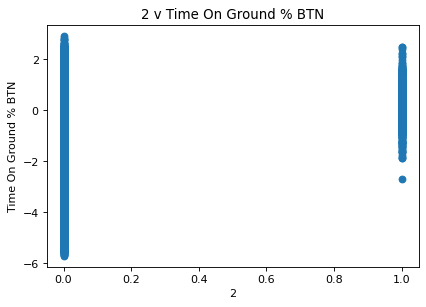

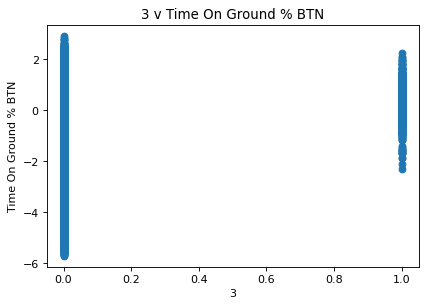

Feature-Label Data IDE on column 'Time On Ground % OTN'


1    0.077630
2    0.038650
3    0.048887
Name: Time On Ground % OTN, dtype: float64

1    0.035651
2    0.016666
3    0.016586
Name: Time On Ground % OTN, dtype: float64

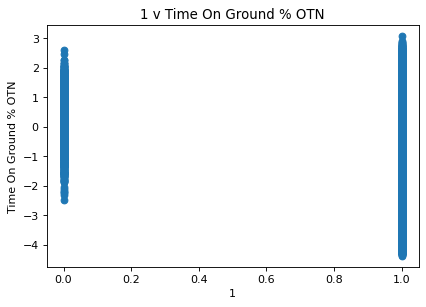

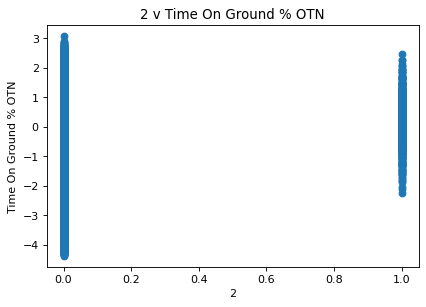

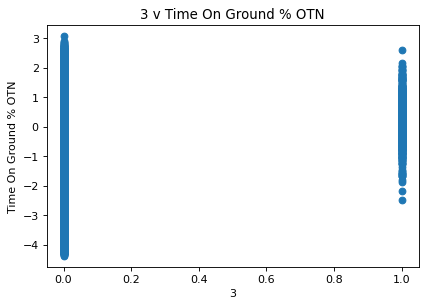

Feature-Label Data IDE on column 'Winloss'


1    0.164893
2    0.076559
3    0.075894
Name: Winloss, dtype: float64

1    0.026619
2    0.006430
3    0.006313
Name: Winloss, dtype: float64

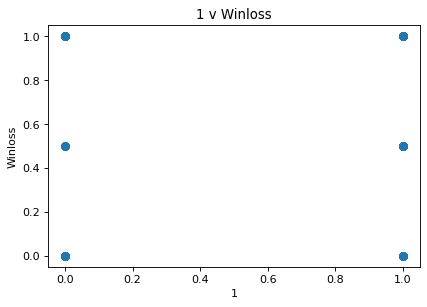

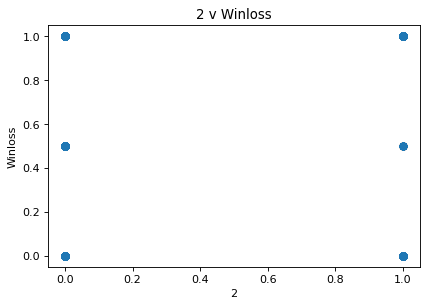

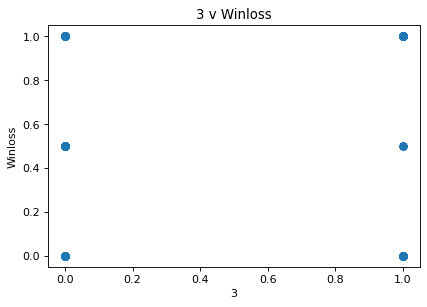

Feature-Label Data IDE on column 'Uncontested Marks BTN'


1    0.149231
2    0.080008
3    0.081818
Name: Uncontested Marks BTN, dtype: float64

1    0.021113
2    0.011707
3    0.011864
Name: Uncontested Marks BTN, dtype: float64

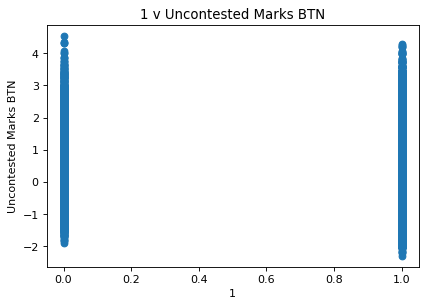

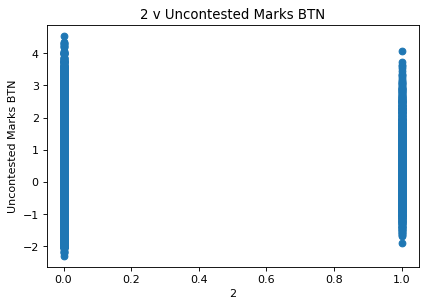

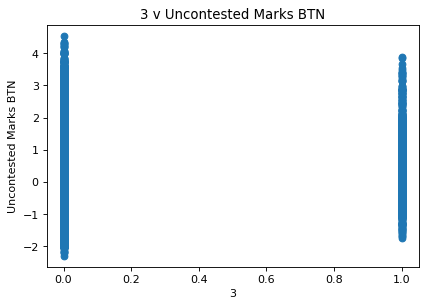

Feature-Label Data IDE on column 'Uncontested Marks OTN'


1    0.127242
2    0.069087
3    0.071820
Name: Uncontested Marks OTN, dtype: float64

1    0.024411
2    0.012955
3    0.012936
Name: Uncontested Marks OTN, dtype: float64

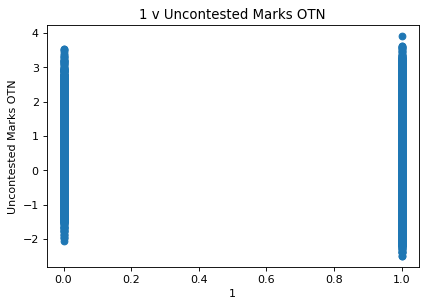

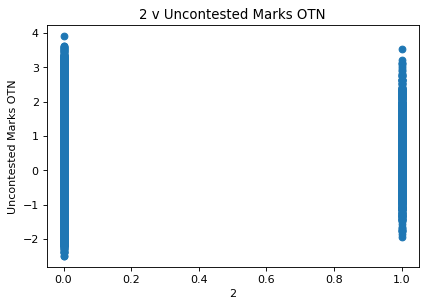

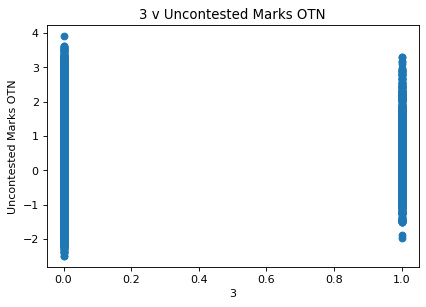

Feature-Label Data IDE on column 'Marks Outside 50 BTN'


1    0.114504
2    0.064232
3    0.065167
Name: Marks Outside 50 BTN, dtype: float64

1    0.020717
2    0.011730
3    0.011810
Name: Marks Outside 50 BTN, dtype: float64

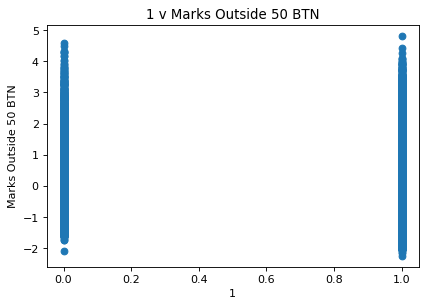

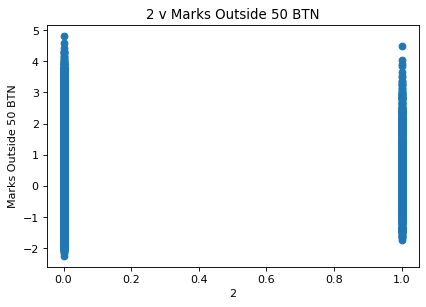

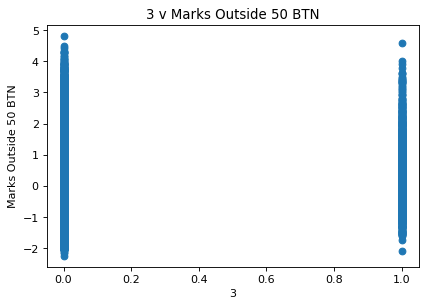

Feature-Label Data IDE on column 'Marks Outside 50 OTN'


1    0.096354
2    0.055540
3    0.055972
Name: Marks Outside 50 OTN, dtype: float64

1    0.025082
2    0.013149
3    0.013083
Name: Marks Outside 50 OTN, dtype: float64

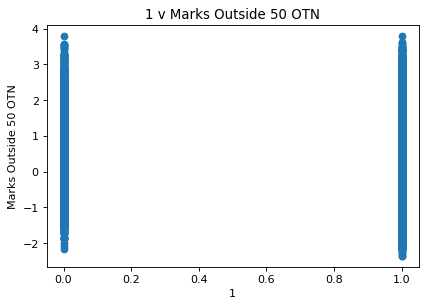

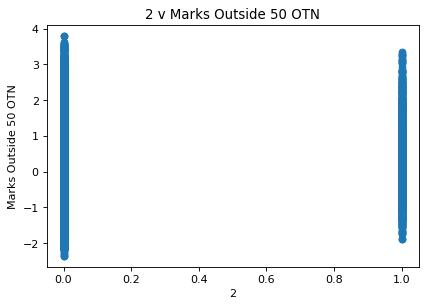

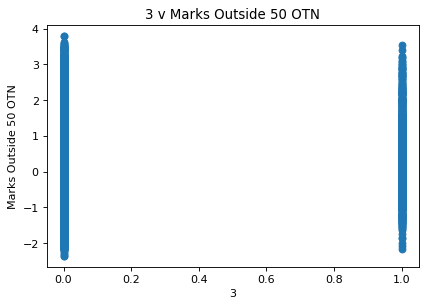

Feature-Label Data IDE on column 'Tackles Outside 50 BTN'


1    0.151912
2    0.074792
3    0.088872
Name: Tackles Outside 50 BTN, dtype: float64

1    0.020397
2    0.011346
3    0.011774
Name: Tackles Outside 50 BTN, dtype: float64

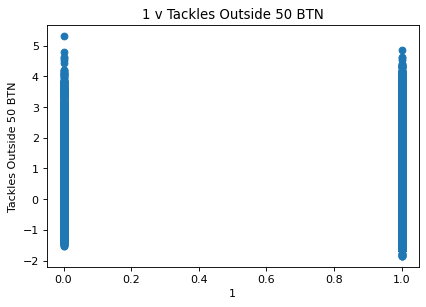

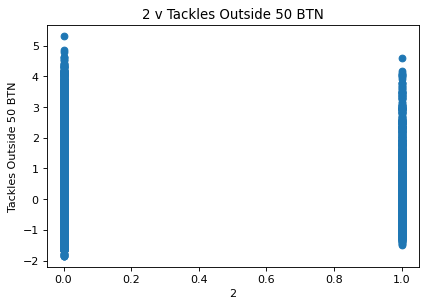

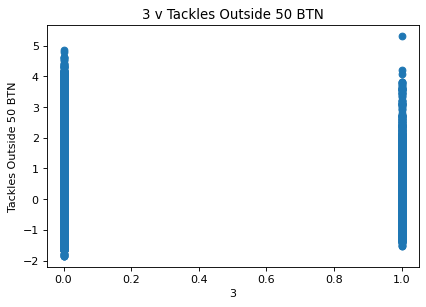

Feature-Label Data IDE on column 'Tackles Outside 50 OTN'


1    0.149387
2    0.072612
3    0.089207
Name: Tackles Outside 50 OTN, dtype: float64

1    0.02359
2    0.01226
3    0.01267
Name: Tackles Outside 50 OTN, dtype: float64

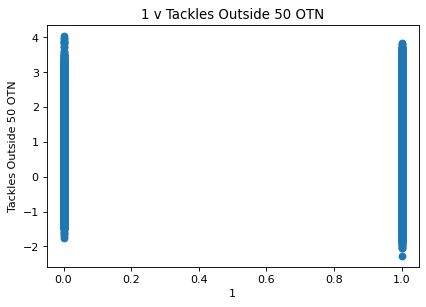

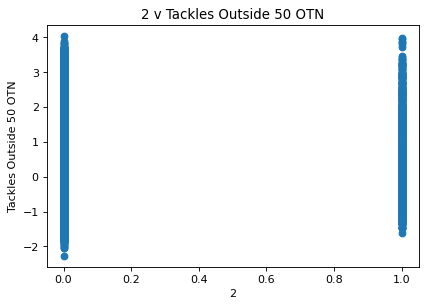

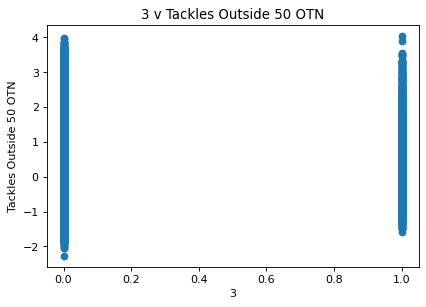

Feature-Label Data IDE on column 'Behind Assists BTN'


1    0.347265
2    0.156812
3    0.186402
Name: Behind Assists BTN, dtype: float64

1    0.029548
2    0.013525
3    0.013956
Name: Behind Assists BTN, dtype: float64

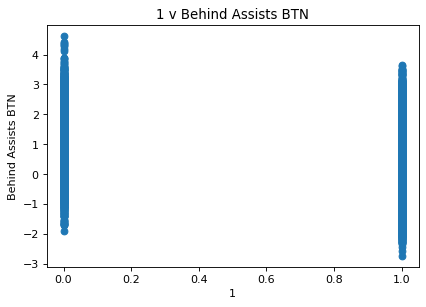

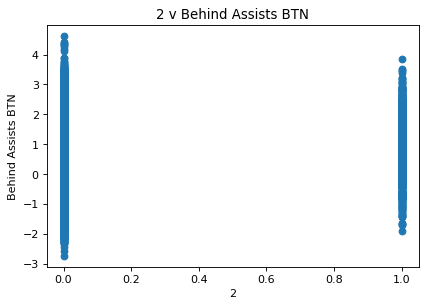

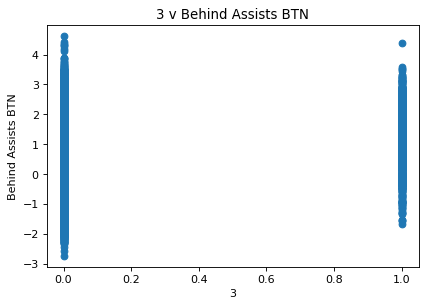

Feature-Label Data IDE on column 'Behind Assists OTN'


1    0.299725
2    0.135500
3    0.163182
Name: Behind Assists OTN, dtype: float64

1    0.030382
2    0.013994
3    0.014561
Name: Behind Assists OTN, dtype: float64

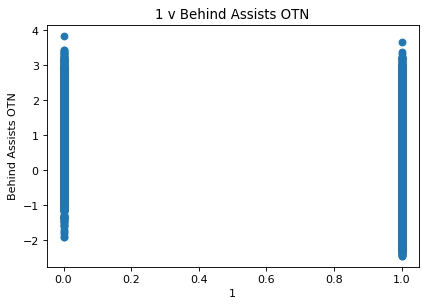

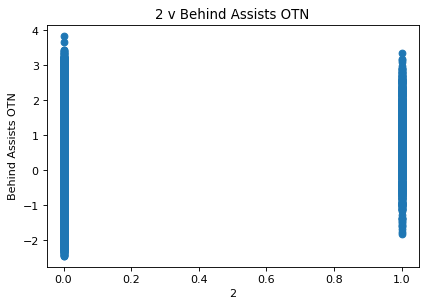

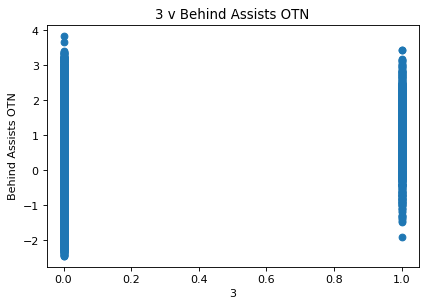

Feature-Label Data IDE on column 'Ineffective Disposals BTN'


1    0.283581
2    0.133625
3    0.155460
Name: Ineffective Disposals BTN, dtype: float64

1    0.028296
2    0.013748
3    0.014110
Name: Ineffective Disposals BTN, dtype: float64

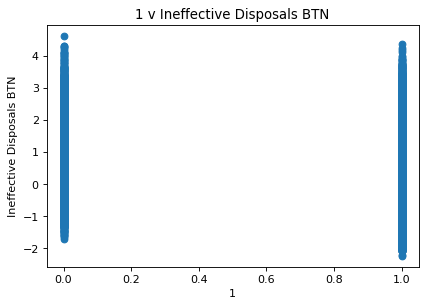

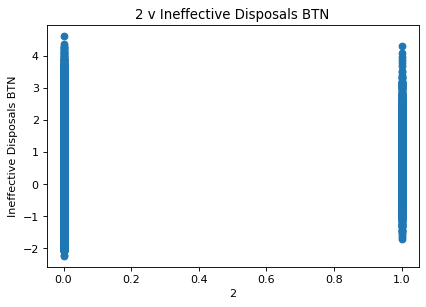

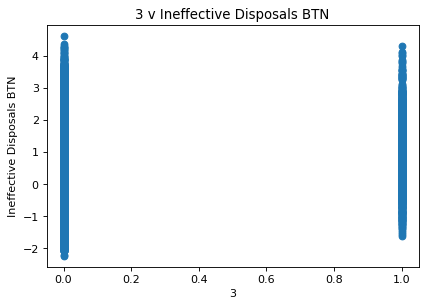

Feature-Label Data IDE on column 'Ineffective Disposals OTN'


1    0.278857
2    0.132735
3    0.151649
Name: Ineffective Disposals OTN, dtype: float64

1    0.032304
2    0.015066
3    0.015491
Name: Ineffective Disposals OTN, dtype: float64

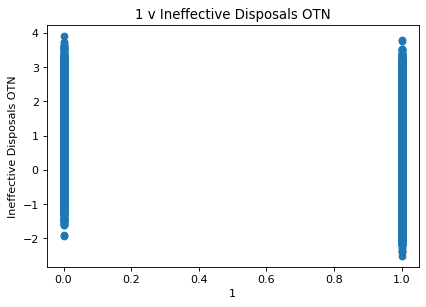

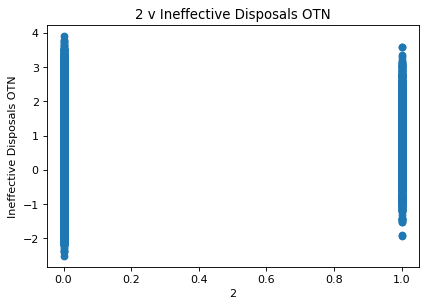

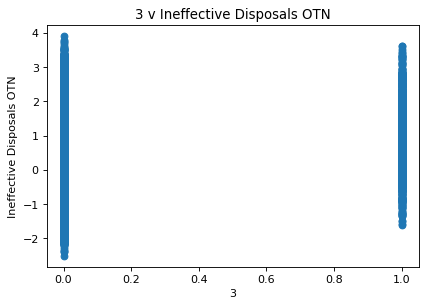

Column not in retained columns
Column not in retained columns


In [32]:
zhongshan.view_all_feature_label_analysis(scatter_type='categorical')

In [33]:
zhongshan.feature_selection(0.1)

Read in feature selection cutoff value at 0.1


In [34]:
zhongshan.get_selected_features()

Successfully got selected features


In [35]:
zhongshan.get_feature_selected_data()

In [39]:
setup_directory(['../data/curated/modelling'])

In [41]:
zhongshan.export_data('Full', '1', '../data/curated/modelling/Full_1.csv')
zhongshan.export_data('Train', '1', '../data/curated/modelling/Train_1.csv')
zhongshan.export_data('Validate', '1', '../data/curated/modelling/Validate_1.csv')
zhongshan.export_data('Test', '1', '../data/curated/modelling/Test_1.csv')
zhongshan.export_data('Full', '2', '../data/curated/modelling/Full_2.csv')
zhongshan.export_data('Train', '2', '../data/curated/modelling/Train_2.csv')
zhongshan.export_data('Validate', '2', '../data/curated/modelling/Validate_2.csv')
zhongshan.export_data('Test', '2', '../data/curated/modelling/Test_2.csv')
zhongshan.export_data('Full', '3', '../data/curated/modelling/Full_3.csv')
zhongshan.export_data('Train', '3', '../data/curated/modelling/Train_3.csv')
zhongshan.export_data('Validate', '3', '../data/curated/modelling/Validate_3.csv')
zhongshan.export_data('Test', '3', '../data/curated/modelling/Test_3.csv')

In [36]:
sanmin = SanMin(zhongshan)

In [37]:
sanmin.export_SanMin('../models/AFL_pipeline')